In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
from mesh_tools import trimesh_utils as tu
from datasci_tools import ipyvolume_utils as ipvu

from neurd import neuron_visualizations as nviz
from pathlib import Path

# Load the appropriate volume data inferface object

In [4]:
from vdi_chen import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [5]:
from neurd import soma_extraction_utils as sm
sm.large_mesh_threshold_global

10000

In [6]:
data_directory = "./Data"

In [7]:
vdi.meshes_directory = data_directory

# Pick the segment Id

In [8]:
segment_id = 75086130432907868
segment_id = 74875092987018534
segment_id = 80433193454844380 # large neuron

# Data Prep: Loading mesh and creating dummy synapse table

In [9]:
mesh = vdi.fetch_segment_id_mesh(
    segment_id,
    #meshes_directory = data_directory,
    plot = True
)
mesh

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(848538, 3), faces.shape=(1664922, 3))>

In [10]:
import numpy as np
import pandas as pd
from datasci_tools import pandas_utils as pu
from pathlib import Path

def mesh_vertices_sampling(
    mesh,
    sampling_rate = 0.05,
    n_samples = None,
    verbose = False):
    """
    Purpsoe
    -------
    perform a random sampling of vertices of a mesh

    Application
    -----------
    Can use those vertices for example synapse coordinates

    Example
    ------
        
    syn_coords = mesh_vertices_sampling(mesh,**kwargs)
    syn_coords
    """
    
    verts = np.array(mesh.vertices)
    vert_num = len(verts)
    if n_samples is None:
        n_samples = int(sampling_rate*vert_num)
    rand_int = np.unique(np.random.randint(0,vert_num,size = (n_samples,)))
    coords = verts[rand_int,:]
    return coords

def synapse_df_dummy(
    mesh,
    segment_id,
    syn_coords = None,
    segment_id_secondary = 12345,
    prepost =None,
    synapse_size = 100,
    **kwargs
    ):
    """
    Purpose
    -------
    To creae a dataframe with the following columns:

    'segment_id',
    'segment_id_secondary',
    'synapse_id',
    'prepost',
    'synapse_x',
    'synapse_y',
    'synapse_z',
    'synapse_size'
    """
        

    if syn_coords is None:
        syn_coords = mesh_vertices_sampling(mesh,**kwargs)

    syn_ids = np.arange(len(syn_coords)).astype('int')

    df = pd.DataFrame()
    df[['synapse_x','synapse_y','synapse_z']] = syn_coords
    df['segment_id'] = segment_id
    df['segment_id_secondary'] = segment_id_secondary
    df['synapse_id'] = syn_ids
    if prepost is None:
        #prepost = np.array(['presyn','postsyn'])[np.random.randint(0,1,(len(syn_ids),))]
        prepost = np.random.choice(['presyn','postsyn'],size = len(syn_ids), replace = True)
    df['prepost'] = prepost
    df['synapse_size'] = synapse_size
    df = df[[
        'segment_id',
        'segment_id_secondary',
        'synapse_id',
        'prepost',
        'synapse_x',
        'synapse_y',
        'synapse_z',
        'synapse_size'
    ]]
    return df
            
syn_df = synapse_df_dummy(mesh,segment_id)    
syn_df

,segment_id,segment_id_secondary,synapse_id,prepost,synapse_x,synapse_y,synapse_z,synapse_size
0,80433193454844380,12345,0,presyn,1346190.125,1082040.000,96824.921875,100
1,80433193454844380,12345,1,postsyn,1346157.625,1081681.250,96674.273438,100
2,80433193454844380,12345,2,presyn,1345972.250,1081898.625,96748.445312,100
3,80433193454844380,12345,3,postsyn,1280438.875,1183152.250,97107.390625,100
4,80433193454844380,12345,4,postsyn,1280819.875,1183229.875,97224.968750,100
...,...,...,...,...,...,...,...,...
41438,80433193454844380,12345,41438,presyn,1506603.000,1228314.000,157499.828125,100
41439,80433193454844380,12345,41439,postsyn,1506263.250,1226933.375,159074.984375,100
41440,80433193454844380,12345,41440,presyn,1506479.625,1226970.000,158925.031250,100
41441,80433193454844380,12345,41441,postsyn,1505909.750,1226700.250,158425.093750,100


In [11]:
synapse_filepath = pu.df_to_csv(syn_df,Path(data_directory) / Path(f"{segment_id}_synapses.csv"))
pu.csv_to_df(synapse_filepath)

,segment_id,segment_id_secondary,synapse_id,prepost,synapse_x,synapse_y,synapse_z,synapse_size
0,80433193454844380,12345,0,presyn,1346190.125,1082040.000,96824.921875,100
1,80433193454844380,12345,1,postsyn,1346157.625,1081681.250,96674.273438,100
2,80433193454844380,12345,2,presyn,1345972.250,1081898.625,96748.445312,100
3,80433193454844380,12345,3,postsyn,1280438.875,1183152.250,97107.390625,100
4,80433193454844380,12345,4,postsyn,1280819.875,1183229.875,97224.968750,100
...,...,...,...,...,...,...,...,...
41438,80433193454844380,12345,41438,presyn,1506603.000,1228314.000,157499.828125,100
41439,80433193454844380,12345,41439,postsyn,1506263.250,1226933.375,159074.984375,100
41440,80433193454844380,12345,41440,presyn,1506479.625,1226970.000,158925.031250,100
41441,80433193454844380,12345,41441,postsyn,1505909.750,1226700.250,158425.093750,100


In [12]:
vdi.set_synapse_filepath(
    synapse_filepath
)

In [13]:
from neurd import synapse_utils as syu
coords = syn_df[['synapse_x','synapse_y','synapse_z']]
coords

,synapse_x,synapse_y,synapse_z
0,1346190.125,1082040.000,96824.921875
1,1346157.625,1081681.250,96674.273438
2,1345972.250,1081898.625,96748.445312
3,1280438.875,1183152.250,97107.390625
4,1280819.875,1183229.875,97224.968750
...,...,...,...
41438,1506603.000,1228314.000,157499.828125
41439,1506263.250,1226933.375,159074.984375
41440,1506479.625,1226970.000,158925.031250
41441,1505909.750,1226700.250,158425.093750


In [ ]:
nviz.plot_objects(mesh,scatters=coords)

In [ ]:
from datasci_tools import pipeline

products = pipeline.PipelineProducts()
products

# Step 1: Decimation

In [ ]:
"""
NOTE: an already decimated mesh is used for the example
in order to speed up time, that's why the mesh_dec
object will be overwritten with original mesh object
"""

In [ ]:
decimation_parameters = dict(
    decimation_ratio = 0.25,
)

In [ ]:
import time

st = time.time()
mesh_decimated = tu.decimate(
    mesh,
    **decimation_parameters
)

print(f"Total time = {time.time() - st}")

In [ ]:
# saving any parameters used or output products for later use
products.set_stage_attrs(
    stage = "decimation",
    attr_dict = dict(
        decimation_parameters = decimation_parameters,
        segment_id = segment_id,
    ),
    
)

print(products)

# Step 2: Soma Identification

In [ ]:
from neurd import soma_extraction_utils as sm

soma_extraction_parameters = dict(
    #max_n_mesh_facer = 100
)

In [ ]:
# could inspect the parameters of a certain category
from neurd import parameter_utils as paru

paru.category_param_from_module(
        module = sm,
        category = "glia",
)

In [ ]:
# overwritting decimated mesh because original was already decimated
mesh_decimated = mesh

In [19]:
from neurd import neuron_visualizations as nviz

verbose = True

soma_products = sm.soma_indentification(
    mesh_decimated,
    verbose=verbose,
    **soma_extraction_parameters
)

Total found significant pieces before Poisson = [<trimesh.Trimesh(vertices.shape=(11588, 3), faces.shape=(21858, 3))>, <trimesh.Trimesh(vertices.shape=(10721, 3), faces.shape=(20313, 3))>, <trimesh.Trimesh(vertices.shape=(6671, 3), faces.shape=(13198, 3))>, <trimesh.Trimesh(vertices.shape=(5407, 3), faces.shape=(10510, 3))>, <trimesh.Trimesh(vertices.shape=(4708, 3), faces.shape=(9252, 3))>, <trimesh.Trimesh(vertices.shape=(4737, 3), faces.shape=(9010, 3))>, <trimesh.Trimesh(vertices.shape=(4270, 3), faces.shape=(8227, 3))>, <trimesh.Trimesh(vertices.shape=(4139, 3), faces.shape=(8094, 3))>, <trimesh.Trimesh(vertices.shape=(3943, 3), faces.shape=(7738, 3))>, <trimesh.Trimesh(vertices.shape=(3515, 3), faces.shape=(6597, 3))>, <trimesh.Trimesh(vertices.shape=(3288, 3), faces.shape=(6247, 3))>, <trimesh.Trimesh(vertices.shape=(3204, 3), faces.shape=(6152, 3))>, <trimesh.Trimesh(vertices.shape=(2939, 3), faces.shape=(5790, 3))>, <trimesh.Trimesh(vertices.shape=(3028, 3), faces.shape=(5476,

  0%|          | 0/5 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.884681, 0.34669]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 4163 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_508533.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_508533_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_255236.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_508533.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_508533_poisson.off
mesh.is_watertight = False
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_255236.mls is being deleted....
Inside sphere validater: ratio_val = 2.3183307208949078
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6888 -s "-screen 0 800x600x2

  0%|          | 0/2 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(196, 3), faces.shape=(382, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(196, 3), faces.shape=(382, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(196, 3), faces.shape=(382, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(196, 3), faces.shape=(382, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on large mesh #1: <trimesh.Trimesh(vertices.shape=(10721, 3), faces.shape=(20313, 3))>
remove_inside_pieces requested 
xvfb-run -n 3059 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_59239.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_59239_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_879469.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_59239.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_59239_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_879469.mls is being deleted....
No significant (1000) interior meshes present
largest is 21
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.off
xvfb-run -n 7394 -s "-screen 0 800x6

  0%|          | 0/8 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.873996]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 5061 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_754334.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_754334_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_372795.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_754334.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_754334_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_372795.mls is being deleted....
Inside sphere validater: ratio_val = 2.7198354681862416
----- working on large mesh #2: <trimesh.Trimesh(vertices.shape=(6671, 3), faces.shape=(13198, 3))>
remove_inside_pieces reques

  0%|          | 0/5 [00:00<?, ?it/s]

      ------ Found 3 viable somas: [0.520485, 0.728601, 0.431567]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 7250 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_860485.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_860485_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_66320.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_860485.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_860485_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_66320.mls is being deleted....
Inside sphere validater: ratio_val = 269.57936406707887
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(2386, 3)

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 2223 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_967284.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_967284_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_767686.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_967284.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_967284_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_767686.mls is being deleted....
Inside sphere validater: ratio_val = 269.57936406707887
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(2386, 3), faces.shape=(4761, 3))>, curr_side_len_ch

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 9511 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_76859.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_76859_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_854073.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_76859.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_76859_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_854073.mls is being deleted....
Inside sphere validater: ratio_val = 16.17718024218988
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(829, 3), faces.shape=(1640, 3))>, curr_side_len_check = 

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 1678 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_417187.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_417187_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_795451.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_417187.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_417187_poisson.off
mesh.is_watertight = False
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_795451.mls is being deleted....
Inside sphere validater: ratio_val = 23.479581407522936
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(319, 3), faces.shape=(629, 3))>, curr_side_len_che

  0%|          | 0/7 [00:00<?, ?it/s]

      ------ Found 3 viable somas: [0.531601, 0.723584, 0.5104435]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6777 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_575941.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_575941_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_451060.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_575941.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_575941_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_451060.mls is being deleted....
Inside sphere validater: ratio_val = 76.69603905443421
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(883, 3

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 3907 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_409045.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_409045_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_348580.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_409045.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_409045_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_348580.mls is being deleted....
Inside sphere validater: ratio_val = 76.69603905443421
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(883, 3), faces.shape=(1757, 3))>, curr_side_len_chec

  0%|          | 0/3 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 2468 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_63506.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_63506_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_640154.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_63506.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_63506_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_640154.mls is being deleted....
Inside sphere validater: ratio_val = 78.540165712718
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(621, 3), faces.shape=(1232, 3))>, curr_side_len_check = Tr

  0%|          | 0/3 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on large mesh #4: <trimesh.Trimesh(vertices.shape=(4708, 3), faces.shape=(9252, 3))>
remove_inside_pieces requested 
xvfb-run -n 408 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_98739.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_98739_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_597734.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_98739.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_98739_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_597734.mls is being deleted....
No significant (1000) interior meshes present
largest is 109
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.of

  0%|          | 0/5 [00:00<?, ?it/s]

      ------ Found 3 viable somas: [0.710316, 0.6855724999999999, 0.4808755]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 2826 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_932164.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_932164_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_272481.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_932164.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_932164_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_272481.mls is being deleted....
Inside sphere validater: ratio_val = 15.839265965303897
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.sh

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 7221 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_211737.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_211737_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_913343.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_211737.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_211737_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_913343.mls is being deleted....
Inside sphere validater: ratio_val = 15.839265965303897
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(1047, 3), faces.shape=(2077, 3))>, curr_side_len_ch

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6603 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_948914.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_948914_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_581004.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_948914.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_948914_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_581004.mls is being deleted....
Inside sphere validater: ratio_val = 9.24204698230997
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(999, 3), faces.shape=(1974, 3))>, curr_side_len_check

  0%|          | 0/2 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 1851 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_365700.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_365700_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_116155.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_365700.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_365700_poisson.off
mesh.is_watertight = False
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_116155.mls is being deleted....
Inside sphere validater: ratio_val = 6.6461957740143
----- working on large mesh #5: <trimesh.Trimesh(vertices.shape=(4737, 3), faces.shape=(9010, 3))>
remove_inside_pieces requested 
xvfb-run -n 3435 -s "-screen 0 800x600x24" m

  0%|          | 0/9 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.661025, 0.492061]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 3304 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_719932.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_719932_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_462487.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_719932.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_719932_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_462487.mls is being deleted....
Inside sphere validater: ratio_val = 559.5910681060802
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(2119, 3), faces.s

  0%|          | 0/3 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 1995 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_931263.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_931263_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_514970.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_931263.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_931263_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_514970.mls is being deleted....
Inside sphere validater: ratio_val = 47.505828730449096
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(625, 3), faces.shape=(1235, 3))>, curr_side_len_che

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 8678 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_314309.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_314309_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_778753.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_314309.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_314309_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_778753.mls is being deleted....
Inside sphere validater: ratio_val = 33.35563368064632
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(328, 3), faces.shape=(645, 3))>, curr_side_len_check

  0%|          | 0/8 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.75348, 0.362318]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6427 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_317431.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_317431_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_367839.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_317431.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_317431_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_367839.mls is being deleted....
Inside sphere validater: ratio_val = 98.68078286016049
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(1590, 3), faces.sh

  0%|          | 0/2 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6693 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_805571.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_805571_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_567842.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_805571.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_805571_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_567842.mls is being deleted....
Inside sphere validater: ratio_val = 69.35957536824215
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(1315, 3), faces.shape=(2608, 3))>, curr_side_len_che

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 2459 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_247010.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_247010_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_667596.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_247010.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_247010_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_667596.mls is being deleted....
Inside sphere validater: ratio_val = 87.3554192714714
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(1087, 3), faces.shape=(2159, 3))>, curr_side_len_chec

  0%|          | 0/4 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.502587, 0.61857]
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_379338.mls is being deleted....
Inside sphere validater: ratio_val = 33.232975184786355
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(483, 3), faces.shape=(959, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0010427528675703858
Going to run cgal segmentation with:
File: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/718_mesh 
clusters:3 
smoothness:0.2

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 538 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_258261.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_258261_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_331664.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_258261.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_258261_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_331664.mls is being deleted....
Inside sphere validater: ratio_val = 13.48912318252733
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(369, 3), faces.shape=(731, 3))>, curr_side_len_check 

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 5171 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_499287.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_499287_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_645971.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_499287.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_499287_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_645971.mls is being deleted....
Inside sphere validater: ratio_val = 32.072086626202285
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(340, 3), faces.shape=(669, 3))>, curr_side_len_chec

  0%|          | 0/2 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(183, 3), faces.shape=(359, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(183, 3), faces.shape=(359, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(183, 3), faces.shape=(359, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(183, 3), faces.shape=(359, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on large mesh #8: <trimesh.Trimesh(vertices.shape=(3943, 3), faces.shape=(7738, 3))>
remove_inside_pieces requested 
xvfb-run -n 9145 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_66547.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_66547_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_104392.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_66547.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_66547_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_104392.mls is being deleted....
No significant (1000) interior meshes present
largest is 90
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.off
xvfb-run -n 6241 -s "-screen 0 800x600

  0%|          | 0/4 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.740683, 0.675624]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 2763 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_304012.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_304012_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_29461.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_304012.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_304012_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_29461.mls is being deleted....
Inside sphere validater: ratio_val = 163.40076771080695
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(1313, 3), faces.sh

  0%|          | 0/2 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 9159 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_118267.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_118267_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_950255.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_118267.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_118267_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_950255.mls is being deleted....
Inside sphere validater: ratio_val = 35.70216157128717
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(672, 3), faces.shape=(1322, 3))>, curr_side_len_chec

  0%|          | 0/3 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 4257 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_211068.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_211068_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_718719.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_211068.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_211068_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_718719.mls is being deleted....
Inside sphere validater: ratio_val = 18.382126142437638
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(548, 3), faces.shape=(1085, 3))>, curr_side_len_che

  0%|          | 0/7 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.467754, 0.365595]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 4776 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_419638.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_419638_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_10640.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_419638.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_419638_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_10640.mls is being deleted....
Inside sphere validater: ratio_val = 32.57703764999788
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(739, 3), faces.shap

  0%|          | 0/5 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 5700 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_167887.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_167887_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_441972.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_167887.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_167887_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_441972.mls is being deleted....
Inside sphere validater: ratio_val = 12.428389274877016
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(445, 3), faces.shape=(884, 3))>, curr_side_len_chec

  0%|          | 0/2 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6854 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_609699.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_609699_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_173867.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_609699.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_609699_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_173867.mls is being deleted....
Inside sphere validater: ratio_val = 15.724413987858483
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(306, 3), faces.shape=(599, 3))>, curr_side_len_chec

  0%|          | 0/7 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.652698, 0.622271]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 7818 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_934003.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_934003_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_983459.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_934003.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_934003_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_983459.mls is being deleted....
Inside sphere validater: ratio_val = 45.18406573705814
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(364, 3), faces.sh

  0%|          | 0/2 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 2978 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_964533.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_964533_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_9752.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_964533.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_964533_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_9752.mls is being deleted....
Inside sphere validater: ratio_val = 38.08665430515296
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(336, 3), faces.shape=(660, 3))>, curr_side_len_check = T

  0%|          | 0/2 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on large mesh #10: <trimesh.Trimesh(vertices.shape=(3288, 3), faces.shape=(6247, 3))>
remove_inside_pieces requested 
xvfb-run -n 2624 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_48859.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_48859_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_802335.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_48859.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_48859_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_802335.mls is being deleted....
No significant (1000) interior meshes present
largest is 32
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.o

  0%|          | 0/5 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.491667, 0.841075]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 5972 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_165427.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_165427_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_653065.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_165427.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_165427_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_653065.mls is being deleted....
Inside sphere validater: ratio_val = 123.56342669012953
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(838, 3), faces.s

  0%|          | 0/2 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 3894 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_946649.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_946649_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_489780.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_946649.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_946649_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_489780.mls is being deleted....
Inside sphere validater: ratio_val = 14.13650902666136
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(698, 3), faces.shape=(1372, 3))>,

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 9051 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_128470.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_128470_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_641761.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_128470.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_128470_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_641761.mls is being deleted....
Inside sphere validater: ratio_val = 14.13650902666136
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(698, 3), faces.shape=(1372, 3))>, curr_side_len_chec

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.5109855000000001]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 8387 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_139081.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_139081_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_568477.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_139081.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_139081_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_568477.mls is being deleted....
Inside sphere validater: ratio_val = 518.9506171482509
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(1679, 3), faces.s

  0%|          | 0/2 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6219 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_974942.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_974942_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_548323.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_974942.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_974942_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_548323.mls is being deleted....
Inside sphere validater: ratio_val = 222.8574570429136
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(974, 3), faces.shape=(1937, 3))>, curr_side_len_chec

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.568665]
xy = 11.072888314384867 ratio was beyong 6 multiplier
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_740222.mls is being deleted....
Inside sphere validater: ratio_val = 121.63412230751726
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(1512, 3), faces.shape=(3015, 3))>, curr_side_len_check = False, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/540_mesh 
clusters:3 
smoothness:0.2

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 9692 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_22158.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_22158_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_851970.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_22158.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_22158_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_851970.mls is being deleted....
Inside sphere validater: ratio_val = 15.463654843720228
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(455, 3), faces.shape=(896, 3))>, curr_side_len_check = 

  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(4048, 3), faces.shape=(7630, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(4048, 3), faces.shape=(7630, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(4048, 3), faces.shape=(7630, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(4048, 3), faces.shape=(7630, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on large mesh #14: <trimesh.Trimesh(vertices.shape=(2759, 3), faces.shape=(5370, 3))>
remove_inside_pieces requested 
xvfb-run -n 442 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_9803.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_9803_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_892653.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_9803.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_9803_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_892653.mls is being deleted....
No significant (1000) interior meshes present
largest is 6
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.off
xvfb-run -n 2859 -s "-screen 0 800x600x24" 

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.598743]
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_690635.mls is being deleted....
Inside sphere validater: ratio_val = 305.83220807592136
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(449, 3), faces.shape=(889, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0022497187851518562
Going to run cgal segmentation with:
File: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/587_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_423529.mls is being deleted....
Inside sphere validater: ratio_val = 305.83220807592136
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(449, 3), faces.shape=(889, 3))>, curr_side_len_check = True, curr_volume_check = False
----- working on mesh after poisson #1: <trimesh.Trimesh(vertices.shape=(1947, 3), faces.shape=(3890, 3))>
xvfb-run -n 9804 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/decimation_meshlab_25922772.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh:

  0%|          | 0/5 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.52498]
xy = 8.406355732167631 ratio was beyong 6 multiplier
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 9027 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_193475.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_193475_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_606218.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_193475.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_193475_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_606218.mls is being deleted....
Inside sphere validater: ratio_val = 37.07719676918653
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh

  0%|          | 0/4 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on large mesh #15: <trimesh.Trimesh(vertices.shape=(2727, 3), faces.shape=(5240, 3))>
remove_inside_pieces requested 
xvfb-run -n 4814 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_10976.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_10976_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_246687.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_10976.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_10976_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_246687.mls is being deleted....
No significant (1000) interior meshes present
largest is 26
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.o

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.5769105]
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_485314.mls is being deleted....
Inside sphere validater: ratio_val = 250.27933111165999
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(1216, 3), faces.shape=(2426, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.00041220115416323167
Going to run cgal segmentation with:
File: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/134_mesh 
clusters:3 
smoothness:0.2

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6969 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_676566.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_676566_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_43412.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_676566.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_676566_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_43412.mls is being deleted....
Inside sphere validater: ratio_val = 33.11139936286958
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(317, 3), faces.shape=(626, 3))>, curr_side_len_check =

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.686793]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 4169 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_857843.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_857843_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_872827.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_857843.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_857843_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_872827.mls is being deleted....
Inside sphere validater: ratio_val = 34.03680154081053
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(343, 3), faces.shape=(670, 

  0%|          | 0/3 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on large mesh #17: <trimesh.Trimesh(vertices.shape=(2231, 3), faces.shape=(4299, 3))>
remove_inside_pieces requested 
xvfb-run -n 3021 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_32146.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_32146_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_711956.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_32146.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_32146_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_711956.mls is being deleted....
No significant (1000) interior meshes present
largest is 20
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.o

  0%|          | 0/5 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.7334535, 0.667763]
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_586462.mls is being deleted....
Inside sphere validater: ratio_val = 63.22974061824458
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(345, 3), faces.shape=(684, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/259_mesh 
clusters:3 
smoothness:0.2

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
yz = 6.158429592711216 ratio was beyong 6 multiplier
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 9651 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_845999.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_845999_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_148790.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_845999.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_845999_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_148790.mls is being deleted....
Inside sphere validater: ratio_val = 8.346985613503707
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trim

  0%|          | 0/3 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on large mesh #18: <trimesh.Trimesh(vertices.shape=(2295, 3), faces.shape=(4292, 3))>
remove_inside_pieces requested 
xvfb-run -n 5242 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_11848.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_11848_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_367652.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_11848.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_11848_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_367652.mls is being deleted....
No significant (1000) interior meshes present
largest is 14
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.o

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.6849145]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 164 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_437616.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_437616_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_96493.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_437616.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_437616_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_96493.mls is being deleted....
Inside sphere validater: ratio_val = 68.18435810341721
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(1497, 3), faces.shape=(2982, 

  0%|          | 0/2 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 5573 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_710030.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_710030_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_284550.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_710030.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_710030_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_284550.mls is being deleted....
Inside sphere validater: ratio_val = 68.22169472399918
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(1493, 3), faces.shape=(2972, 3))>, curr_side_len_che

  0%|          | 0/7 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(273, 3), faces.shape=(537, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(273, 3), faces.shape=(537, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(385, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(385, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on large mesh #20: <trimesh.Trimesh(vertices.shape=(2164, 3), faces.shape=(4088, 3))>
remove_inside_pieces requested 
xvfb-run -n 7315 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_62670.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_62670_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_418477.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_62670.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_62670_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_418477.mls is being deleted....
No significant (1000) interior meshes present
largest is 35
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.off
xvfb-run -n 6328 -s "-screen 0 800x60

  0%|          | 0/5 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.523381, 0.381731]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6812 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_844251.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_844251_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_580589.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_844251.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_844251_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_580589.mls is being deleted....
Inside sphere validater: ratio_val = 45.13193840243715
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(555, 3), faces.sh

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 1422 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_80390.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_80390_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_553286.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_80390.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_80390_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_553286.mls is being deleted....
Inside sphere validater: ratio_val = 45.13193840243715
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(555, 3), faces.shape=(1097, 3))>, curr_side_len_check = 

  0%|          | 0/2 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 4019 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_528971.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_528971_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_282325.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_528971.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_528971_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_282325.mls is being deleted....
Inside sphere validater: ratio_val = 52.40163200400268
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(466, 3), faces.shape=(919, 3))>, curr_side_len_check

  0%|          | 0/4 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.490675]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 7039 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_339779.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_339779_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_254094.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_339779.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_339779_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_254094.mls is being deleted....
Inside sphere validater: ratio_val = 80.74702040628995
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(438, 3), faces.shape=(865, 

  0%|          | 0/5 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on large mesh #22: <trimesh.Trimesh(vertices.shape=(1932, 3), faces.shape=(3792, 3))>
remove_inside_pieces requested 
xvfb-run -n 4735 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_16648.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_16648_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_523978.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_16648.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_16648_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_523978.mls is being deleted....
No significant (1000) interior meshes present
largest is 4
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.of

  0%|          | 0/5 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.68964]
xy = 6.784841549146801 ratio was beyong 6 multiplier
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_826278.mls is being deleted....
Inside sphere validater: ratio_val = 84.03873841377364
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(720, 3), faces.shape=(1429, 3))>, curr_side_len_check = False, curr_volume_check = False
perc_0_faces = 0.0013995801259622112
Going to run cgal segmentation with:
File: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/21_mesh 
clusters:3 
smoothness:0.2

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 9544 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_907758.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_907758_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_267272.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_907758.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_907758_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_267272.mls is being deleted....
Inside sphere validater: ratio_val = 44.67102578113391
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(502, 3), faces.shape=(995, 3))>, curr_side_len_check

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.508519]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 4365 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_85373.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_85373_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_87582.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_85373.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_85373_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_87582.mls is being deleted....
Inside sphere validater: ratio_val = 26.368814730180382
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(334, 3), faces.shape=(659, 3))>,

  0%|          | 0/4 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on mesh after poisson #1: <trimesh.Trimesh(vertices.shape=(1317, 3), faces.shape=(2630, 3))>
xvfb-run -n 647 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/decimation_meshlab_25922772.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(330, 3), faces.shape=(656, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(330, 3), faces.shape=(656, 3))>
soma_size_threshold = 562.5
soma_size_thres

  0%|          | 0/1 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.6538155]
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_800751.mls is being deleted....
Inside sphere validater: ratio_val = 58.275182954602826
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(330, 3), faces.shape=(656, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/290_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_355572.mls is being deleted....
Inside sphere validater: ratio_val = 58.275182954602826
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(330, 3), faces.shape=(656, 3))>, curr_side_len_check = True, curr_volume_check = False
----- working on large mesh #24: <trimesh.Trimesh(vertices.shape=(1871, 3), faces.shape=(3674, 3))>
remove_inside_pieces requested 
xvfb-run -n 4134 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_23197.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_23197_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_244014.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_23197.off
removed temporary output file: /neurd_packages/neu

  0%|          | 0/5 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.5309215]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 7436 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_604237.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_604237_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_37457.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_604237.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_604237_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_37457.mls is being deleted....
Inside sphere validater: ratio_val = 129.82615763302556
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(375, 3), faces.shape=(742, 

  0%|          | 0/3 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on large mesh #25: <trimesh.Trimesh(vertices.shape=(1901, 3), faces.shape=(3623, 3))>
remove_inside_pieces requested 
xvfb-run -n 208 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_57474.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_57474_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_400312.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_57474.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_57474_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_400312.mls is being deleted....
No significant (1000) interior meshes present
largest is 21
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.of

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.5031155, 0.671528]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 9576 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_591522.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_591522_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_669680.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_591522.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_591522_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_669680.mls is being deleted....
Inside sphere validater: ratio_val = 60.7476657020746
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(372, 3), faces.sh

  0%|          | 0/2 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 9558 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_91125.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_91125_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_840055.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_91125.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_91125_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_840055.mls is being deleted....
Inside sphere validater: ratio_val = 62.32367189087339
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(357, 3), faces.shape=(701, 3))>, curr_side_len_check = T

  0%|          | 0/2 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on large mesh #26: <trimesh.Trimesh(vertices.shape=(1911, 3), faces.shape=(3621, 3))>
remove_inside_pieces requested 
xvfb-run -n 7352 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_32034.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_32034_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_912202.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_32034.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_32034_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_912202.mls is being deleted....
No significant (1000) interior meshes present
largest is 13
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.o

  0%|          | 0/8 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.519314]
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_205891.mls is being deleted....
Inside sphere validater: ratio_val = 72.77451576401336
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(346, 3), faces.shape=(684, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/625_mesh 
clusters:3 
smoothness:0.2

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on large mesh #27: <trimesh.Trimesh(vertices.shape=(2135, 3), faces.shape=(3614, 3))>
remove_inside_pieces requested 
xvfb-run -n 3303 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_26123.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_26123_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_759756.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_26123.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_26123_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_759756.mls is being deleted....
No significant (1000) interior meshes present
largest is 11
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.o

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.649614]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 4084 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_942424.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_942424_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_12188.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_942424.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_942424_poisson.off
mesh.is_watertight = False
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_12188.mls is being deleted....
Inside sphere validater: ratio_val = 2.0030193052177534
----- working on large mesh #28: <trimesh.Trimesh(vertices.shape=(1822, 3), faces.shape=(3608, 3))>
remove_inside_pieces request

  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(262, 3), faces.shape=(515, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(262, 3), faces.shape=(515, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(207, 3), faces.shape=(402, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(207, 3), faces.shape=(402, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #1: <trimesh.Trimesh(vertices.shape=(1342, 3), faces.shape=(2680, 3))>
xvfb-run -n 3129 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/decimation_meshlab_25922772.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(336, 3), faces.shape=(668, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(336, 3), faces.shape=(668, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold

  0%|          | 0/2 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(175, 3), faces.shape=(344, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(175, 3), faces.shape=(344, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(84, 3), faces.shape=(162, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(84, 3), faces.shape=(162, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on large mesh #29: <trimesh.Trimesh(vertices.shape=(1809, 3), faces.shape=(3536, 3))>
remove_inside_pieces requested 
xvfb-run -n 9835 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_74482.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_74482_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_202715.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_74482.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_74482_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_202715.mls is being deleted....
No significant (1000) interior meshes present
largest is 39
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.off
xvfb-run -n 7519 -s "-screen 0 800x60

  0%|          | 0/4 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.529544]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 8694 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_105011.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_105011_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_776207.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_105011.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_105011_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_776207.mls is being deleted....
Inside sphere validater: ratio_val = 202.11724256835936
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(617, 3), faces.shape=(1226

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 10000 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_200537.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_200537_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_650866.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_200537.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_200537_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_650866.mls is being deleted....
Inside sphere validater: ratio_val = 202.11724256835936
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(617, 3), faces.shape=(1226, 3))>, curr_side_len_ch

  0%|          | 0/5 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.484947, 0.692631]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6376 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_637028.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_637028_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_699812.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_637028.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_637028_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_699812.mls is being deleted....
Inside sphere validater: ratio_val = 66.28963031367427
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(408, 3), faces.sh

  0%|          | 0/2 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 2602 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_288893.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_288893_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_851020.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_288893.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_288893_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_851020.mls is being deleted....
Inside sphere validater: ratio_val = 7.4316546927416125
----- working on large mesh #31: <trimesh.Trimesh(vertices.shape=(1725, 3), faces.shape=(3301, 3))>
remove_inside_pieces requested 
x

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.676368]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 391 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_294567.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_294567_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_604276.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_294567.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_294567_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_604276.mls is being deleted....
Inside sphere validater: ratio_val = 62.256686958264744
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(1185, 3), faces.shape=(2353

  0%|          | 0/2 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 9566 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_900309.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_900309_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_532628.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_900309.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_900309_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_532628.mls is being deleted....
Inside sphere validater: ratio_val = 8.355195394429307
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(362, 3), faces.shape=(701, 3))>, curr_side_len_check

  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(3277, 3), faces.shape=(6192, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(3277, 3), faces.shape=(6192, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(3277, 3), faces.shape=(6192, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(3277, 3), faces.shape=(6192, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on large mesh #34: <trimesh.Trimesh(vertices.shape=(1707, 3), faces.shape=(3244, 3))>
remove_inside_pieces requested 
xvfb-run -n 7709 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_65772.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_65772_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_768996.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_65772.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_65772_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_768996.mls is being deleted....
No significant (1000) interior meshes present
largest is 24
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.off
xvfb-run -n 5471 -s "-screen 0 800x60

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.704008, 0.567107]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6316 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_640604.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_640604_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_904189.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_640604.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_640604_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_904189.mls is being deleted....
Inside sphere validater: ratio_val = 34.60283084870348
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(444, 3), faces.sh

  0%|          | 0/2 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 686 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_775461.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_775461_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_95486.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_775461.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_775461_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_95486.mls is being deleted....
Inside sphere validater: ratio_val = 32.49762030482015
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(433, 3), faces.shape=(846, 3))>, curr_side_len_check = 

  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_952949.mls is being deleted....
Inside sphere validater: ratio_val = 43.27890382409376
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(311, 3), faces.shape=(615, 3))>, curr_side_len_check = True, curr_volume_check = False
----- working on large mesh #35: <trimesh.Trimesh(vertices.shape=(1722, 3), faces.shape=(3231, 3))>
remove_inside_pieces requested 
xvfb-run -n 4419 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_18140.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_18140_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_994906.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_18140.off
removed temporary output file: /neurd_packages/neur

  0%|          | 0/5 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.67493, 0.482351]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 5016 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_24399.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_24399_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_189738.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_24399.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_24399_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_189738.mls is being deleted....
Inside sphere validater: ratio_val = 57.576584439382245
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(890, 3), faces.shape=

  0%|          | 0/2 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 2891 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_359027.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_359027_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_95284.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_359027.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_359027_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_95284.mls is being deleted....
Inside sphere validater: ratio_val = 9.855509700755887
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(385, 3), faces.shape=(751, 3))>, curr_side_len_check =

  0%|          | 0/2 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on large mesh #36: <trimesh.Trimesh(vertices.shape=(1705, 3), faces.shape=(3213, 3))>
remove_inside_pieces requested 
xvfb-run -n 1223 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_49906.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_49906_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_998390.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_49906.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_49906_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_998390.mls is being deleted....
No significant (1000) interior meshes present
largest is 10
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.o

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 2 viable somas: [0.708119, 0.558936]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 7434 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_310179.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_310179_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_682240.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_310179.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_310179_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_682240.mls is being deleted....
Inside sphere validater: ratio_val = 25.567322770361848
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(543, 3), faces.s

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 7968 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_57118.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_57118_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_384651.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_57118.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_57118_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_384651.mls is being deleted....
Inside sphere validater: ratio_val = 25.567322770361848
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(543, 3), faces.shape=(1069, 3))>, curr_side_len_check =

  0%|          | 0/2 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on large mesh #37: <trimesh.Trimesh(vertices.shape=(1620, 3), faces.shape=(3046, 3))>
remove_inside_pieces requested 
xvfb-run -n 2386 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_73835.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_73835_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_74031.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_73835.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_73835_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_74031.mls is being deleted....
No significant (1000) interior meshes present
largest is 21
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.off

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.691662]
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_261331.mls is being deleted....
Inside sphere validater: ratio_val = 208.43607074361014
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(985, 3), faces.shape=(1963, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/918_mesh 
clusters:3 
smoothness:0.2

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 3390 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_251457.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_251457_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_874039.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_251457.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_251457_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_874039.mls is being deleted....
Inside sphere validater: ratio_val = 34.93727432278739
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(473, 3), faces.shape=(934, 3))>, curr_side_len_check

  0%|          | 0/5 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(279, 3), faces.shape=(546, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(279, 3), faces.shape=(546, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(279, 3), faces.shape=(546, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(279, 3), faces.shape=(546, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #1: <trimesh.Trimesh(vertices.shape=(1368, 3), faces.shape=(2732, 3))>
xvfb-run -n 6628 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/decimation_meshlab_25922772.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(342, 3), faces.shape=(680, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(342, 3), faces.shape=(680, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold

  0%|          | 0/2 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.673113]
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_215507.mls is being deleted....
Inside sphere validater: ratio_val = 23.577821935934427
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(318, 3), faces.shape=(631, 3))>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.001584786053882726
Going to run cgal segmentation with:
File: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/74_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_224941.mls is being deleted....
Inside sphere validater: ratio_val = 23.577821935934427
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(318, 3), faces.shape=(631, 3))>, curr_side_len_check = True, curr_volume_check = False
----- working on large mesh #39: <trimesh.Trimesh(vertices.shape=(1455, 3), faces.shape=(2861, 3))>
remove_inside_pieces requested 
xvfb-run -n 9608 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_33142.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_33142_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_384541.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_33142.off
removed temporary output file: /neurd_packages/neu

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.592876]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 2935 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_13165.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_13165_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_697466.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_13165.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_13165_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_697466.mls is being deleted....
Inside sphere validater: ratio_val = 39.84371262457421
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(324, 3), faces.shape=(639, 3))>

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 5786 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_399065.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_399065_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_9799.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_399065.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_399065_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_9799.mls is being deleted....
Inside sphere validater: ratio_val = 39.84371262457421
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(324, 3), faces.shape=(639, 3))>, curr_side_len_check = T

  0%|          | 0/5 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.686005]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 7973 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_676987.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_676987_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_430457.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_676987.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_676987_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_430457.mls is being deleted....
Inside sphere validater: ratio_val = 95.85171661141362
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(610, 3), faces.shape=(1210,

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 3476 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_834304.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_834304_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_646834.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_834304.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_834304_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_646834.mls is being deleted....
Inside sphere validater: ratio_val = 95.85171661141362
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(610, 3), faces.shape=(1210, 3))>, curr_side_len_chec

  0%|          | 0/1 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.793069]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 320 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_999334.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_999334_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_639170.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_999334.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_999334_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_639170.mls is being deleted....
Inside sphere validater: ratio_val = 28.690723226321147
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(628, 3), faces.shape=(1240,

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 5680 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_173604.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_173604_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_576019.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_173604.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_173604_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_576019.mls is being deleted....
Inside sphere validater: ratio_val = 28.690723226321147
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(628, 3), faces.shape=(1240, 3))>, curr_side_len_che

  0%|          | 0/8 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(186, 3), faces.shape=(364, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(186, 3), faces.shape=(364, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(186, 3), faces.shape=(364, 3))>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(186, 3), faces.shape=(364, 3))>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on large mesh #43: <trimesh.Trimesh(vertices.shape=(1456, 3), faces.shape=(2735, 3))>
remove_inside_pieces requested 
xvfb-run -n 3639 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_24356.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_24356_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_878723.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_24356.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_24356_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_878723.mls is being deleted....
No significant (1000) interior meshes present
largest is 82
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.off
xvfb-run -n 5419 -s "-screen 0 800x60

  0%|          | 0/7 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.724685]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 9677 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_920419.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_920419_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_416730.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_920419.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_920419_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_416730.mls is being deleted....
Inside sphere validater: ratio_val = 12.588753898969692
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(546, 3), faces.shape=(1077

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 954 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_950998.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_950998_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_62170.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_950998.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_950998_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_62170.mls is being deleted....
Inside sphere validater: ratio_val = 12.588753898969692
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(546, 3), faces.shape=(1077, 3))>, curr_side_len_check 

  0%|          | 0/7 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.6982900000000001]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 9154 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_70203.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_70203_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_31233.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_70203.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_70203_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_31233.mls is being deleted....
Inside sphere validater: ratio_val = 91.74143813579302
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(402, 3), faces.shape=(7

  0%|          | 0/1 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 2551 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_702968.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_702968_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_771092.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_702968.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_702968_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_771092.mls is being deleted....
Inside sphere validater: ratio_val = 91.74143813579302
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(402, 3), faces.shape=(792, 3))>, curr_side_len_check

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.568561]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 4357 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_505736.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_505736_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_286566.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_505736.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_505736_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_286566.mls is being deleted....
Inside sphere validater: ratio_val = 217.55876636862956
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(732, 3), faces.shape=(1457

  0%|          | 0/6 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on large mesh #46: <trimesh.Trimesh(vertices.shape=(1373, 3), faces.shape=(2538, 3))>
remove_inside_pieces requested 
xvfb-run -n 4793 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_16610.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_16610_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_680615.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_16610.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_16610_remove_interior.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_680615.mls is being deleted....
No significant (1000) interior meshes present
largest is 1
pre_largest_mesh_path = /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/12345/neuron_12345_decimated_largest_piece.of

  0%|          | 0/2 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.5399075]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 158 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_458710.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_458710_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_876426.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_458710.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_458710_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_876426.mls is being deleted....
Inside sphere validater: ratio_val = 210.98902608117046
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(875, 3), faces.shape=(1742

  0%|          | 0/7 [00:00<?, ?it/s]

Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 6581 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_833275.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_833275_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_103886.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_833275.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_833275_poisson.off
mesh.is_watertight = True
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_103886.mls is being deleted....
Inside sphere validater: ratio_val = 20.11257963406097
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(368, 3), faces.shape=(723, 3))>, curr_side_len_check

  0%|          | 0/33 [00:00<?, ?it/s]

--->This soma mesh was not added because it did not pass the sphere validation EVEN AFTER SEGMENTATION:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(4627, 3), faces.shape=(9131, 3))>, curr_side_len_check = True, curr_volume_check = False

---Performing Soma Mesh Backtracking to original mesh for poisson soma 4
backtrack_soma_size_threshold = 8000
xvfb-run -n 9257 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_60345.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_60345_fill_holes.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_540811.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_60345.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_60345_fill_holes.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_540811.mls is being deleted....
xvfb-run -n 8477 -s "-

  0%|          | 0/6 [00:00<?, ?it/s]

Largest hole before segmentation = 251011.332099813, after = 268094.4459571036,

ratio = 1.0680571419401004, difference = 17083.11385729062
Skipping the segmentatio filter at end
removing mesh interior before segmentation
xvfb-run -n 5978 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_46521.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_46521_fill_holes.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_214215.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_46521.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_46521_fill_holes.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_214215.mls is being deleted....
xvfb-run -n 8433 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_55582.off -o /neurd_pa

  0%|          | 0/4 [00:00<?, ?it/s]

No split meshes were above the width threshold (0.32) and size threshold (2000) so continuing
So just going with old somas
Skipping the segmentatio filter at end
removing mesh interior before segmentation
xvfb-run -n 6453 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_67676.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_67676_fill_holes.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_923454.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_67676.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_67676_fill_holes.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_923454.mls is being deleted....
xvfb-run -n 3636 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_48457.off -o /neurd_packages/neuron_mes

  0%|          | 0/4 [00:00<?, ?it/s]

Largest hole before segmentation = 2149569.1556187244, after = 691740.8726849693,

ratio = 0.32180442805333287, difference = -1457828.282933755
Skipping the segmentatio filter at end
removing mesh interior before segmentation
xvfb-run -n 1539 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_22070.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_22070_fill_holes.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_746938.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_22070.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_22070_fill_holes.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_746938.mls is being deleted....
xvfb-run -n 3931 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_63828.off -o /neur

  0%|          | 0/3 [00:00<?, ?it/s]

No split meshes were above the width threshold (0.32) and size threshold (2000) so continuing
So just going with old somas
Skipping the segmentatio filter at end
removing mesh interior before segmentation
xvfb-run -n 3996 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_48981.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_48981_fill_holes.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_993933.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_48981.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_48981_fill_holes.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_993933.mls is being deleted....
xvfb-run -n 9042 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_56576.off -o /neurd_packages/neuron_mes

  0%|          | 0/9 [00:00<?, ?it/s]

Largest hole before segmentation = 1379212.1877269207, after = 109836.84920448178,

ratio = 0.07963738297984727, difference = -1269375.338522439
Skipping the segmentatio filter at end
removing mesh interior before segmentation
xvfb-run -n 1723 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_95551.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_95551_fill_holes.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_745504.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_95551.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_95551_fill_holes.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_745504.mls is being deleted....
xvfb-run -n 1285 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_73752.off -o /neu

  0%|          | 0/5 [00:00<?, ?it/s]

Largest hole before segmentation = 180510.93951903936, after = 248598.4103351151,

ratio = 1.3771930443522744, difference = 68087.47081607574
Skipping the segmentatio filter at end
removing mesh interior before segmentation
xvfb-run -n 7271 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_52000.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_52000_fill_holes.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_927918.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_52000.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_52000_fill_holes.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_927918.mls is being deleted....
xvfb-run -n 243 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_99150.off -o /neurd_p

  0%|          | 0/4 [00:00<?, ?it/s]

No split meshes were above the width threshold (0.32) and size threshold (2000) so continuing
So just going with old somas
Skipping the segmentatio filter at end
removing mesh interior before segmentation
xvfb-run -n 9678 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_39950.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_39950_fill_holes.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_307666.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_39950.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_39950_fill_holes.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_307666.mls is being deleted....
xvfb-run -n 3019 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_14617.off -o /neurd_packages/neuron_mes

  0%|          | 0/4 [00:00<?, ?it/s]

No split meshes were above the width threshold (0.32) and size threshold (2000) so continuing
So just going with old somas
Skipping the segmentatio filter at end
removing mesh interior before segmentation
xvfb-run -n 1069 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_37793.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_37793_fill_holes.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_573246.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_37793.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_37793_fill_holes.off
/neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/fill_holes_573246.mls is being deleted....
xvfb-run -n 6521 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_57585.off -o /neurd_packages/neuron_mes

  0%|          | 0/1 [00:00<?, ?it/s]

Largest hole before segmentation = 42532.49902998448, after = 42532.49902998448,

ratio = 1.0, difference = 0.0
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(9924, 3), faces.shape=(33488, 3))>
 <trimesh.Trimesh(vertices.shape=(8658, 3), faces.shape=(30228, 3))>
 <trimesh.Trimesh(vertices.shape=(17290, 3), faces.shape=(48910, 3))>
 <trimesh.Trimesh(vertices.shape=(4773, 3), faces.shape=(16867, 3))>
 <trimesh.Trimesh(vertices.shape=(4427, 3), faces.shape=(8303, 3))>]
Continuing because both meshes not in viable mesh list
Continuing because both meshes not in viable mesh list
Continuing because both meshes not in viable mesh list
Continuing because both meshes not in viable mesh list
Not need to do a second pass because already found a soma


In [20]:
soma_products.glia_meshes

[]

In [21]:
from datasci_tools import ipyvolume_utils as ipvu 
ipvu.plot_objects(
    meshes = soma_products.soma_meshes,# + soma_products.nuclei_meshes,
    meshes_colors="random",
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [22]:
sm.plot_soma_products(
    mesh_decimated,
    soma_products = soma_products,
    verbose = True
)

# of somas = 3
# of glia = 0
# of nuclei = 8


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [23]:
soma_products.soma_extraction_parameters = soma_extraction_parameters
soma_products

In [24]:
products.set_stage_attrs(
    stage = "soma_identification",
    attr_dict = soma_products,
)

print(products)

{
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(39, 3), faces.shape=(13, 3))>, <trimesh.Trimesh(vertices.shape=(21, 3), faces.shape=(7, 3))>, <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(3, 3))>, <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>, <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>, <trimesh.Trimesh(vertices.shape=(6, 3), faces.shape=(2, 3))>, <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>, <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(3, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(9924, 3), faces.shape=(33488, 3))>, <trimesh.Trimesh(vertices.shape=(17290, 3), faces.shape=(48910, 3))>, <trimesh.Trimesh(vertices.shape=(4427, 3), faces.shape=(8303, 3))>],
    'soma_run_time':1214.660863161087,
    'soma_sdfs':array([0.8793385, 0.8793385, 0.649614 ]),
  },
}



# Step 2b: Saving off pipeline products

In [ ]:
from datasci_tools import system_utils as su
su.save_object(
    products,"products_up_to_soma_stage"
)

# Step 3: Decomposition

In [25]:
decimated_mesh = mesh

In [26]:
from neurd import neuron

neuron_obj = neuron.Neuron(
    mesh = decimated_mesh,
    segment_id = segment_id, # don't need this explicitely if segment_id is already in products
    pipeline_products = products,
    suppress_preprocessing_print=False,
    suppress_output=False,
)

neuron_obj

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(9924, 3), faces.shape=(33488, 3))>, <trimesh.Trimesh(vertices.shape=(17290, 3), faces.shape=(48910, 3))>, <trimesh.Trimesh(vertices.shape=(4427, 3), faces.shape=(8303, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(9924, 3), faces.shape=(33488, 3))>, <trimesh.Trimesh(vertices.shape=(17290, 3), faces.shape=(48910, 3))>, <trimesh.Trimesh(vertices.shape=(4427, 3), faces.shape=(8303, 3))>]
soma_mesh_list_centers = [array([1371247.01265871, 1153986.01660117,  153858.13659594]), array([1369399.08802776, 1146908.9469491 ,  152576.84388736]), array([1369508.46594759, 1148664.18799413,  159046.9883139 ])]
Getting Glia and Nuclei Pieces Subtracted Away 0.4634068012237549
 Splitting mesh after soma cancellation 2.

  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/24586 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.67it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.37761712074279785
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 972
After combining close endpoints max(kept_branches_idx) = 6, len(kept_branches_idx) = 7
empty_indices % = 0.0
 conflict_indices % = 0.011492362410312288


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Decomposing first pass: 2.2672553062438965
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [5055, 2974, 7169, 3574, 4346, 7110, 18413]
mesh_large_connectivity: 0.050505876541137695
Finding MAP candidates connected components: 0.0001246929168701172
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.011516332626342773
Grouping MP Sublimbs by Graph: 2.86102294921875e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.002834320068359375
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 2299 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/None.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/None_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/t

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.03589463233947754
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 37.204649448394775
Checking connected components after removing cycles
Total time for mesh KDTree = 0.341533899307251
sbv[0].reshape(-1,3) = [[1369656.625    1157574.125     154518.546875]]
closest_sk_pt_coord BEFORE = [1368180. 1157730.  154172.]
current_skeleton.shape = (1015, 2, 3)
node_for_stitch = 767: [1368180. 1157730.  154172.]
node_for_stitch AFTER = 767: [1368180. 1157730.  154172.]
possible_node_loc = [   0   48   57   80   89   96  102  123  145  166  179  217  241  263
  269  281  287  306  387  392  394  402  432  444  446  521  533  549
  576  597  692  757  767  790  835  879  880  897  913  931  938  948
  975 1008 1015]
possible_node_loc AFTER = [   0   48   57   80   89   96  102  123  145  166  179  217  241  263
  269  281  287  306  387  392 

  0%|          | 0/43 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (709, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 39.695247173309326
Working on limb correspondence for #0 MAP piece
xvfb-run -n 6676 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_68612.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_68612_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_79177.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_68612.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_68612_remove_interior.off
/neurd_packages/ne

0it [00:00, ?it/s]

Total time for decomposition = 5.344728469848633
mesh_correspondence_first_pass: 5.34476637840271
Limb decomposed into 11 branches
divided_skeleton_graph_recovered = (709, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (709, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (10, 11)
empty_indices % = 0.11276495137846673
 conflict_indices % = 0.09269957443309143


  0%|          | 0/77 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 48.263495445251465
correspondence_1_to_1: 3.220612049102783
Total time for MAP sublimb processing 48.2635600566864
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 50.99641823768616
Number of matching vertices = 89
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/11 [00:00<?, ?it/s]

48640 48641
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1362569.875    1145279.75      152674.921875]
Time for preparing soma vertices and root: 0.0002803802490234375
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/14529 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.11it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.25075697898864746
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 525
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.968531608581543
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [28871]
mesh_large_connectivity: 0.00018644332885742188
Finding MAP candidates connected components: 8.511543273925781e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.00984048843383789
Grouping MP Sublimbs by Graph: 3.266334533691406e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.009945869445800781
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 3321 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/None.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/None_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/poisson_352517.mls
removed temp

Not closed mesh


min_edge_length = 75
MAX ITERATIONS initially 500
AREA VARIATION initially 0.0001
medial centered initially 1
medially_centered_speed_tradeoff initially 0.2
quality_speed_tradeoff initially 0.1
max_triangle_angle initially 1.91986
min_edge_length initially 104.263
setting the edge length by absolute length
min_edge_length AFTER = 75
max_triangle_angle AFTER = 1.91986
quality_speed_tradeoff AFTER = 0.2
set_medially_centered_speed_tradeoff AFTER = 0.2
medial centered AFTER 1
AREA VARIATION AFTER 0.0001
MAX ITERATIONS AFTER 500
medial centered END 1
set_medially_centered_speed_tradeoff END = 0.2
quality_speed_tradeoff END = 0.2
Max iterations END = 500
AREA VARIATION END 0.0001
Number of vertices of the skeleton: 1025
Number of edges of the skeleton: 1025
file /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/None_0_skeleton.cgal not found so skipping
No skeletons to stack so returning empty list
No recorded skeleton so skipping to meshparty skeletonization
invalidation_d = 1200
sm

  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/14529 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.24it/s]


branches_touching_root = [3]
inside filter nodes 


  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/141 [00:00<?, ?it/s]

empty_indices % = 0.0
 conflict_indices % = 0.14818867482121223


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.011591434478759766
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 23.177428007125854
Checking connected components after removing cycles
Total time for mesh KDTree = 0.1766207218170166
sbv[0].reshape(-1,3) = [[1362569.875    1145279.75      152674.921875]]
On iteration 0 the filter points were empty with close_nodes len = 2296, len(all_skeleton_points) = 2, len(sk_points_closest_nodes) = 2
On iteration 1 the filter points were empty with close_nodes len = 10083, len(all_skeleton_points) = 2, len(sk_points_closest_nodes) = 2
closest_sk_pt_coord BEFORE = [1334810.83683038 1114625.58175808  150915.29469151]
current_skeleton.shape = (1, 2, 3)
node_for_stitch = 1: [1334810.83683038 1114625.58175808  150915.29469151]
node_for_stitch AFTER = 1: [1334810.83683038 1114625.58175808  150915.29469151]
possible_node_loc = [0 1]
possible_nod

  0%|          | 0/1 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
No connected skeleton after cleaning so just going with older skeleton
after DISTANCE cleaning limb size of skeleton = (1, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 23.705153703689575
Working on limb correspondence for #0 MAP piece
xvfb-run -n 2818 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_93805.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_93805_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_575021.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_93805.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONN

0it [00:00, ?it/s]

Total time for decomposition = 1.7294261455535889
mesh_correspondence_first_pass: 1.7294518947601318
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (1, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.9984413425236396
 conflict_indices % = 0.0


  0%|          | 0/1 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 27.594669818878174
correspondence_1_to_1: 2.1501309871673584
Total time for MAP sublimb processing 27.59472966194153
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 28.825501441955566
Number of matching vertices = 43
Only one endpoint after filtering away the endpoints that are not on the skeleton


  0%|          | 0/1 [00:00<?, ?it/s]

Removed 1 skeletal branches
There were no branches after cleaning limb correspondence
Successful Limb Decomposition


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1378829.75     1152420.        154975.078125]
Time for preparing soma vertices and root: 0.0002639293670654297
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9625 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.72it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1872255802154541
connecting at the root
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 441
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.6829671859741211
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [18932]
mesh_large_connectivity: 0.0001499652862548828
Finding MAP candidates connected components: 6.651878356933594e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.004919767379760742
Grouping MP Sublimbs by Graph: 2.4318695068359375e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.014721870422363281
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8129 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/None.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/None_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/poisson_52209.mls
removed temp

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.027962684631347656
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 16.029752731323242
Checking connected components after removing cycles
Total time for mesh KDTree = 0.13007664680480957
sbv[0].reshape(-1,3) = [[1378829.75     1152420.        154975.078125]]
closest_sk_pt_coord BEFORE = [1378390. 1153650.  154952.]
current_skeleton.shape = (357, 2, 3)
node_for_stitch = 5: [1378390. 1153650.  154952.]
node_for_stitch AFTER = 5: [1378390. 1153650.  154952.]
possible_node_loc = [ 89 111 256 271 281 357]
possible_node_loc AFTER = [ 89 111 256 271 281 357]
curr_shortest_path = [5, 3.0, 0.0, 1.0, 2.0, 4.0, 6.0, 8.0, 9.0, 11.0, 13.0, 14.0, 16.0, 17.0, 19.0, 20.0, 22.0, 24.0, 25.0, 26.0, 28.0, 30.0, 32.0, 33.0, 35.0, 37.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 51.0, 52.0, 54.0, 56.0, 57.0, 58.0, 60.0, 61.0, 63.0, 64.0, 66.0, 67.0, 69.0, 7

  0%|          | 0/5 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (326, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 16.711541175842285
Working on limb correspondence for #0 MAP piece
xvfb-run -n 2294 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_94476.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_94476_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_714693.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_94476.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_94476_remove_interior.off
/neurd_packages/n

0it [00:00, ?it/s]

Total time for decomposition = 3.006798505783081
mesh_correspondence_first_pass: 3.0068273544311523
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (326, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (326, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.07426579336572998
 conflict_indices % = 0.02435030635960279


  0%|          | 0/12 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 20.785706520080566
correspondence_1_to_1: 1.0526480674743652
Total time for MAP sublimb processing 20.78583288192749
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 21.676032543182373
Number of matching vertices = 77
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

18931 18932
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1371300.      1141350.25     153074.96875]
Time for preparing soma vertices and root: 0.0003447532653808594
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5283 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.96it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.14292597770690918
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 272


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.3919486999511719
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [10404]
mesh_large_connectivity: 0.00015616416931152344
Finding MAP candidates connected components: 6.079673767089844e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.003096342086791992
Grouping MP Sublimbs by Graph: 2.2172927856445312e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.027025699615478516
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 3679 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/None.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/None_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/poisson_286938.mls
removed te

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.04000663757324219
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 12.619446039199829
Checking connected components after removing cycles
Total time for mesh KDTree = 0.07851529121398926
sbv[0].reshape(-1,3) = [[1371300.      1141350.25     153074.96875]]
closest_sk_pt_coord BEFORE = [1371270. 1140560.  153389.]
current_skeleton.shape = (272, 2, 3)
node_for_stitch = 0: [1371270. 1140560.  153389.]
node_for_stitch AFTER = 0: [1371270. 1140560.  153389.]
possible_node_loc = [  0  56  68  77  95 143 148 170 188 202 203 217 240 272]
possible_node_loc AFTER = [  0  56  68  77  95 143 148 170 188 202 203 217 240 272]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1371270. 1140560.  153389.]
skipping soma 1 because closest skeleto

  0%|          | 0/13 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (192, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 13.0901038646698
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4427 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_56066.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_56066_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_819905.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_56066.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_56066_remove_interior.off
/neurd_packages/neu

0it [00:00, ?it/s]

Total time for decomposition = 1.6977849006652832
mesh_correspondence_first_pass: 1.6978144645690918
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (192, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (192, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.14273356401384082
 conflict_indices % = 0.0


  0%|          | 0/19 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 15.39408278465271
correspondence_1_to_1: 0.5791201591491699
Total time for MAP sublimb processing 15.394164085388184
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 15.939369201660156
Number of matching vertices = 16
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

10403 10404
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1367159.625   1141234.25     155454.59375]
Time for preparing soma vertices and root: 0.000286102294921875
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4098 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.13it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.15065431594848633
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 700


length of Graph = 358
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.3364596366882324
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.14984130859375e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.002716064453125e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.07464027404785156
sbv[0].reshape(-1,3) = [[1367159.625   1141234.25     155454.59375]]
closest_sk_pt_coord BEFORE = [1367146.3141946  1141757.74410018  155939.93890833]
current_skeleton.shape = (357, 2, 3)
node_for_stitch = 354: [1367146.3141946  1141757.74410018  155939.93890833]
node_for_stitch AFTER = 354: [1367146.3141946  1141757.74410018  155939.93890833]
possible_node_loc = [  0 357]
possible_node_loc AFTER = [  0 357]
curr_shortest_path = [354, 355.0, 356.0, 357]
Current stitch

  0%|          | 0/1 [00:00<?, ?it/s]

8149 8150
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [1370032.5      1149013.5       162081.546875]
Time for preparing soma vertices and root: 0.000186920166015625
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2302 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55.09it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11194920539855957
connecting at the root
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 115
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.18011832237243652
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [4397]
mesh_large_connectivity: 0.000125885009765625
Finding MAP candidates connected components: 5.054473876953125e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0020360946655273438
Grouping MP Sublimbs by Graph: 2.4318695068359375e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.02249741554260254
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 2363 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/None.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/None_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/poisson_773422.mls
removed tempo

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.017703771591186523
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.087404727935791
Checking connected components after removing cycles
Total time for mesh KDTree = 0.03213858604431152
sbv[0].reshape(-1,3) = [[1370032.5      1149013.5       162081.546875]]
closest_sk_pt_coord BEFORE = [1369190. 1149130.  162208.]
current_skeleton.shape = (74, 2, 3)
node_for_stitch = 1: [1369190. 1149130.  162208.]
node_for_stitch AFTER = 1: [1369190. 1149130.  162208.]
possible_node_loc = [ 1 58]
possible_node_loc AFTER = [ 1 58]
curr_shortest_path = [1]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [1369190. 1149130.  162208.]
skipping soma 2 because closest skeleton node was already end node
endpoints_must_keep = {2: array([[1369190., 1149130.,  162208.]])}
   

0it [00:00, ?it/s]

Total time for decomposition = 1.012983798980713
mesh_correspondence_first_pass: 1.0130205154418945
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (74, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (74, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.08574027746190585
 conflict_indices % = 0.0


  0%|          | 0/3 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 10.767463207244873
correspondence_1_to_1: 0.4006364345550537
Total time for MAP sublimb processing 10.767553806304932
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 11.066698789596558
Number of matching vertices = 52
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

4396 4397
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 133.93577694892883


 ----- Working on Stitching ----------
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(27837, 3), faces.shape=(55530, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.4373016357421875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/27836 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.75it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.3587920665740967
branches_touching_root = [1]
combining close nodes
combine_threshold = 700
length of Graph = 1200
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.0027912839906356923


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

widths = [715.82867162 279.57664015 825.09535309]
width_median= 663.3161157744663
segment_widths_median = [715.82867162 279.57664015 825.09535309]
Decomposing first pass: 1.9390113353729248
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [5700, 37756]
mesh_large_connectivity: 0.007418632507324219
Finding MAP candidates connected components: 8.082389831542969e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.02088618278503418
Grouping MP Sublimbs by Graph: 0.0058536529541015625
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.6689300537109375e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8283 -s "-screen 0 800

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.04724717140197754
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 27.34148144721985
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.02854013442993164
filter_end_node_length = 4000


  0%|          | 0/38 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (579, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 29.085577726364136
Working on limb correspondence for #0 MAP piece
xvfb-run -n 2368 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_21505.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_21505_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_428968.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_21505.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 4.475994110107422
mesh_correspondence_first_pass: 4.476032257080078
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (579, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (579, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.12407952871870398
 conflict_indices % = 0.0


  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 35.204874753952026
correspondence_1_to_1: 1.6432850360870361
Total time for MAP sublimb processing 35.20496201515198
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 1.71661376953125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1331650.76909047 1240070.47237872  149017.62391279]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.10297772459499263
 conflict_indices % = 0.004648379970544919


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.24997298757428418
 conflict_indices % = 0.004015847289753287


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 47.75590205192566
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

55529 55530
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 50.050567865371704
Floating 1: <trimesh.Trimesh(vertices.shape=(22072, 3), faces.shape=(43839, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/22071 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.48it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.3777189254760742
branches_touching_root = [1]
combining close nodes
combine_threshold = 700
length of Graph = 931
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.002965396108487876


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

widths = [687.71364785 708.91573731 933.30194523]
width_median= 763.1696328538313
segment_widths_median = [687.71364785 708.91573731 933.30194523]
Decomposing first pass: 1.5298192501068115
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [9217, 18984, 15638]
mesh_large_connectivity: 0.015494585037231445
Finding MAP candidates connected components: 9.72747802734375e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.008873939514160156
Grouping MP Sublimbs by Graph: 2.4318695068359375e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.52587890625e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 4582 -s "-screen 0 8

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/3 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.08532071113586426
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 26.89481210708618
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.03282284736633301
filter_end_node_length = 4000


  0%|          | 0/40 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (643, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 28.030437469482422
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5404 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_54554.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_54554_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_137767.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_54554.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 5.114391803741455
mesh_correspondence_first_pass: 5.114542007446289
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (643, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (643, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.29594653162709006
 conflict_indices % = 0.00739067953192363


  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 36.545021772384644
correspondence_1_to_1: 3.400054931640625
Total time for MAP sublimb processing 36.54508638381958
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 38.499558448791504
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

43838 43839
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 40.28903889656067
Floating 2: <trimesh.Trimesh(vertices.shape=(19266, 3), faces.shape=(38067, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/19265 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.61it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.35492944717407227
branches_touching_root = [1]
combining close nodes
combine_threshold = 700
length of Graph = 826
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.003204875614048914


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

widths = [492.78468569 639.71093679 714.50397464]
width_median= 634.2491095656163
segment_widths_median = [492.78468569 639.71093679 714.50397464]
Decomposing first pass: 1.274012804031372
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [16835, 14709]
mesh_large_connectivity: 0.006554126739501953
Finding MAP candidates connected components: 0.00010561943054199219
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.014358758926391602
Grouping MP Sublimbs by Graph: 0.003252267837524414
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.5735626220703125e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7813 -s "-screen 0 800

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.024743318557739258
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 22.609073400497437
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.023691177368164062
filter_end_node_length = 4000


  0%|          | 0/35 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (467, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 23.93058156967163
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7495 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_13964.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_13964_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_668554.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_13964.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 3.4266414642333984
mesh_correspondence_first_pass: 3.426668643951416
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (467, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (467, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.15346817144306366
 conflict_indices % = 0.0


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 28.232834577560425
correspondence_1_to_1: 0.875579833984375
Total time for MAP sublimb processing 28.232900619506836
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 2.3603439331054688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1393362.30273357 1206550.36212579  150914.24065368]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.14617676895764647
 conflict_indices % = 0.002662946994674106


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.14563795413350145
 conflict_indices % = 0.021304541991751386


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 35.98041248321533
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

38066 38067
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 37.68750190734863
Floating 3: <trimesh.Trimesh(vertices.shape=(19227, 3), faces.shape=(38290, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/19226 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.73it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.23991966247558594
branches_touching_root = [1]
combining close nodes
combine_threshold = 700
length of Graph = 589
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.005406111256202664


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

widths = [1184.20744867  980.68204943  659.9192398 ]
width_median= 964.3152143327553
segment_widths_median = [1184.20744867  980.68204943  659.9192398 ]
Decomposing first pass: 1.2185087203979492
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [13565, 17702, 7023]
mesh_large_connectivity: 0.012175559997558594
Finding MAP candidates connected components: 7.462501525878906e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.009030580520629883
Grouping MP Sublimbs by Graph: 2.3126602172851562e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.430511474609375e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7226 -s "

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/5 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.11194014549255371
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 30.002519845962524
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.026534557342529297
filter_end_node_length = 4000


  0%|          | 0/53 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (386, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
node_degrees = [2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3]
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 30.873010635375977
Working on limb correspondence for #0 MAP piece
xvfb-run -n 1220 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_94926.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_94926_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_686700.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_94926.off
removed temporary

0it [00:00, ?it/s]

Total time for decomposition = 5.18861198425293
mesh_correspondence_first_pass: 5.18864107131958
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (374, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (374, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.13591015931052494
 conflict_indices % = 0.045155393053016454


  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 37.27553582191467
correspondence_1_to_1: 1.2138986587524414
Total time for MAP sublimb processing 37.2755982875824
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 38.76814532279968
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

38289 38290
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 40.49635362625122
Floating 4: <trimesh.Trimesh(vertices.shape=(17876, 3), faces.shape=(35572, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/17875 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.31it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.32521915435791016
branches_touching_root = [1]
combining close nodes
combine_threshold = 700
length of Graph = 836
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.003710783762509839


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

widths = [335.9438503  635.14419431 340.17306402]
width_median= 455.40268363592065
segment_widths_median = [335.9438503  635.14419431 340.17306402]
Decomposing first pass: 1.2599973678588867
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [17009]
mesh_large_connectivity: 0.00012731552124023438
Finding MAP candidates connected components: 7.05718994140625e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.020801544189453125
Grouping MP Sublimbs by Graph: 0.008270740509033203
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.5735626220703125e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 2268 -s "-screen 0 800x600

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.026368379592895508
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 13.125975608825684
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.011953592300415039
filter_end_node_length = 4000


  0%|          | 0/14 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (288, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 1 valid paths to replace
valid_paths = [array([195., 198., 200., 199.])]
valid_path_lengths = [606.6284204232078]
length of Graph = 288
Working on path [195. 198. 200. 199.]
path_degrees = [3, 2, 2, 4]
node_degrees = [2 2 2 2 5]
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 13.526852130889893
Working on limb correspondence for #0 MAP piece
xvfb-run -n 6651 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_19875.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_19875_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_292309.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools

0it [00:00, ?it/s]

Total time for decomposition = 2.957010507583618
mesh_correspondence_first_pass: 2.957038402557373
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (280, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (280, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.16832265271326943
 conflict_indices % = 0.0408019283908519


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 17.08646297454834
correspondence_1_to_1: 0.6025972366333008
Total time for MAP sublimb processing 17.08655023574829
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 3.4332275390625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1320056.02016221 1137452.09735665  167074.72142934]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2798368892448846
 conflict_indices % = 0.023447171047840967


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 21.747562170028687
Removed 0 skeletal branches


  0%|          | 0/5 [00:00<?, ?it/s]

35571 35572
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 23.625142335891724
Floating 5: <trimesh.Trimesh(vertices.shape=(17412, 3), faces.shape=(34511, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/17411 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.24it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.22406983375549316
branches_touching_root = [1]
combining close nodes
combine_threshold = 700
length of Graph = 628
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.002810698038306627


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

widths = [ 248.44163678  573.76033094 1024.5068928 ]
width_median= 717.3142777649036
segment_widths_median = [ 248.44163678  573.76033094 1024.5068928 ]
Decomposing first pass: 1.200984239578247
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [11309, 21523]
mesh_large_connectivity: 0.005698204040527344
Finding MAP candidates connected components: 7.104873657226562e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.011414766311645508
Grouping MP Sublimbs by Graph: 0.0017018318176269531
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.5735626220703125e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 9669 -s "-scree

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/3 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.05734729766845703
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 29.472930431365967
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.028545141220092773
filter_end_node_length = 4000


  0%|          | 0/41 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (417, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
node_degrees = [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2]
node_degrees = [3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2]
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 30.28621792793274
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7263 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_23803.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_23803_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_635764.mls
removed temporary input file: /

0it [00:00, ?it/s]

Total time for decomposition = 4.539653301239014
mesh_correspondence_first_pass: 4.5396833419799805
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (376, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (376, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.14836135477582846
 conflict_indices % = 0.05037768031189084


  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 36.014962911605835
correspondence_1_to_1: 1.1890785694122314
Total time for MAP sublimb processing 36.015037536621094
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 2.6226043701171875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1401288.32026746 1173693.79152207  167861.26102289]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.18551315538000893
 conflict_indices % = 0.001401541695865452


  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.20154235727440148
 conflict_indices % = 0.011164825046040515


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 40.2983763217926
Removed 0 skeletal branches


  0%|          | 0/5 [00:00<?, ?it/s]

34510 34511
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 42.091949701309204
Floating 6: <trimesh.Trimesh(vertices.shape=(16745, 3), faces.shape=(33344, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/16744 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.89it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.27965545654296875
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 549
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [800.2309826]
width_median= 800.2309825964605
segment_widths_median = [800.2309826]
Decomposing first pass: 1.10896897315979
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [33344]
mesh_large_connectivity: 0.0001125335693359375
Finding MAP candidates connected components: 6.699562072753906e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.007091045379638672
Grouping MP Sublimbs by Graph: 2.5272369384765625e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.5974044799804688e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8619 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_to

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/6 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.13596367835998535
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 30.15988564491272
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.02837204933166504
filter_end_node_length = 4000


  0%|          | 0/49 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (441, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 31.100996732711792
Working on limb correspondence for #0 MAP piece
xvfb-run -n 2508 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_67767.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_67767_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_10890.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_67767.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 4.595056056976318
mesh_correspondence_first_pass: 4.5950939655303955
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (441, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (441, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.15097168905950095
 conflict_indices % = 0.012595969289827254


  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 36.69280171394348
correspondence_1_to_1: 0.9967358112335205
Total time for MAP sublimb processing 36.69288492202759
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 38.10865831375122
Removed 0 skeletal branches


  0%|          | 0/5 [00:00<?, ?it/s]

33343 33344
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 39.25859570503235
Floating 7: <trimesh.Trimesh(vertices.shape=(13700, 3), faces.shape=(26967, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/13699 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.84it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.257763147354126
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 348
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [449.07635032]
width_median= 449.0763503165231
segment_widths_median = [449.07635032]
Decomposing first pass: 1.6548089981079102
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.291534423828125e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.956390380859375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 1.9264931678771973
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

26966 26967
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 2.7125632762908936
Floating 8: <trimesh.Trimesh(vertices.shape=(12860, 3), faces.shape=(25466, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.9141387939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/12859 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.94it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.23827147483825684
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 563
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [531.37820677]
width_median= 531.3782067749685
segment_widths_median = [531.37820677]
Decomposing first pass: 0.9153196811676025
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [25466]
mesh_large_connectivity: 0.00014090538024902344
Finding MAP candidates connected components: 0.00010085105895996094
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.005728244781494141
Grouping MP Sublimbs by Graph: 2.5033950805664062e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.5020370483398438e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8376 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_m

Not closed mesh


min_edge_length = 75
Manifold status before skeletonization = True
Watertight status before skeletonization = True
min_edge_length = 75
Manifold status before skeletonization = True
Watertight status before skeletonization = True
min_edge_length = 75
file /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/None_0_skeleton.cgal not found so skipping
Before mesh subtraction number of skeleton edges = 92


0it [00:00, ?it/s]

len(leftover_meshes_sig) = [<trimesh.Trimesh(vertices.shape=(3939, 3), faces.shape=(7828, 3))>, <trimesh.Trimesh(vertices.shape=(1387, 3), faces.shape=(2561, 3))>]


  0%|          | 0/2 [00:00<?, ?it/s]

invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10



  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3938 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.10it/s]

Time for sk_meshparty_obj = 0.10928559303283691
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 177
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [529.31748934]
width_median= 529.3174893390761
Time for correspondence = 0.3249375820159912
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10



  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1386 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 44.61it/s]

Time for sk_meshparty_obj = 0.0571749210357666
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 73
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [428.96063513]
width_median= 428.96063512715546
Time for correspondence = 0.128281831741333
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/7 [00:00<?, ?it/s]

**** The distance exceeded max stitch distance of 5000 and still had 6 left
   Actual distance was 5719.631207045609 
**** The distance exceeded max stitch distance of 5000 and still had 5 left
   Actual distance was 5581.795567108255 
**** The distance exceeded max stitch distance of 5000 and still had 4 left
   Actual distance was 5321.881716085017 
**** The distance exceeded max stitch distance of 5000 and still had 3 left
   Actual distance was 8593.251771011948 
all graph is one component!
Total time for skeleton stitching = 0.1618177890777588
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 20.159400939941406
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.01155710220336914
filter_end_node_length = 4000


  0%|          | 0/7 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (307, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 20.52006483078003
Working on limb correspondence for #0 MAP piece
xvfb-run -n 508 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_25891.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_25891_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_785828.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_25891.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECT

0it [00:00, ?it/s]

Total time for decomposition = 2.605422019958496
mesh_correspondence_first_pass: 2.6054491996765137
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (307, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (307, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.7495876855415063
 conflict_indices % = 0.0


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 24.001519680023193
correspondence_1_to_1: 0.8760175704956055
Total time for MAP sublimb processing 24.00159215927124
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 25.172492027282715
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

25465 25466
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 25.930097341537476
Floating 9: <trimesh.Trimesh(vertices.shape=(12366, 3), faces.shape=(24404, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/12365 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.98it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.17615032196044922
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 346
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [608.76032698]
width_median= 608.7603269792015
segment_widths_median = [608.76032698]
Decomposing first pass: 1.7319464683532715
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [24404]
mesh_large_connectivity: 0.00014710426330566406
Finding MAP candidates connected components: 8.487701416015625e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.00582432746887207
Grouping MP Sublimbs by Graph: 2.7418136596679688e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.288818359375e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 4074 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_to

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.030594587326049805
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 19.16793704032898
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.02057790756225586
filter_end_node_length = 4000


  0%|          | 0/33 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (343, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 19.78488302230835
Working on limb correspondence for #0 MAP piece
xvfb-run -n 2487 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_63481.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_63481_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_508872.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_63481.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 2.8432183265686035
mesh_correspondence_first_pass: 2.843247652053833
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (343, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (343, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.18107687264382888
 conflict_indices % = 0.06933289624651696


  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 24.529949426651
correspondence_1_to_1: 1.9018211364746094
Total time for MAP sublimb processing 24.530007123947144
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 26.457261323928833
Removed 0 skeletal branches


  0%|          | 0/5 [00:00<?, ?it/s]

24403 24404
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 27.337606191635132
Floating 10: <trimesh.Trimesh(vertices.shape=(12253, 3), faces.shape=(24418, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.152557373046875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/12252 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.36it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.17368173599243164
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 489
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [581.93596092]
width_median= 581.9359609241217
segment_widths_median = [581.93596092]
Decomposing first pass: 0.8335304260253906
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [24418]
mesh_large_connectivity: 0.0001766681671142578
Finding MAP candidates connected components: 7.915496826171875e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.005617618560791016
Grouping MP Sublimbs by Graph: 2.4318695068359375e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.09808349609375e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 2399 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/5 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.11700320243835449
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 19.778850317001343
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.022823810577392578
filter_end_node_length = 4000


  0%|          | 0/31 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (403, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
node_degrees = [2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2]
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 21.26276421546936
Working on limb correspondence for #0 MAP piece
xvfb-run -n 808 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_64546.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_64546_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_562335.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_64546.off
removed tempora

0it [00:00, ?it/s]

Total time for decomposition = 2.8971049785614014
mesh_correspondence_first_pass: 2.8971664905548096
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (389, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (389, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2023097714800557
 conflict_indices % = 0.004832500614300925


  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 24.945128917694092
correspondence_1_to_1: 0.7852144241333008
Total time for MAP sublimb processing 24.94520926475525
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 25.977576732635498
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

24417 24418
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 26.81861686706543
Floating 11: <trimesh.Trimesh(vertices.shape=(11347, 3), faces.shape=(22546, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11346 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.19it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1534276008605957
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 529
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [403.74106202]
width_median= 403.7410620186415
segment_widths_median = [403.74106202]
Decomposing first pass: 0.8155665397644043
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.7418136596679688e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.09808349609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.9914906024932861
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

22545 22546
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 2.502702474594116
Floating 12: <trimesh.Trimesh(vertices.shape=(10969, 3), faces.shape=(21725, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/10968 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.49it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.14774608612060547
branches_touching_root = [2]


combining close nodes
combine_threshold = 700
length of Graph = 946
After combining close endpoints max(kept_branches_idx) = 6, len(kept_branches_idx) = 6
empty_indices % = 0.0
 conflict_indices % = 0.009804372842347525


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

widths = [507.15290469 313.71986452 548.66093916 598.34258586 224.3690057
 254.1435349 ]
width_median= 369.5319691892612
segment_widths_median = [507.15290469 313.71986452 548.66093916 598.34258586 224.3690057
 254.1435349 ]
Decomposing first pass: 0.9466323852539062
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [8298, 4941, 745]
mesh_large_connectivity: 0.005223274230957031
Finding MAP candidates connected components: 7.367134094238281e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.023982524871826172
Grouping MP Sublimbs by Graph: 0.0057680606842041016
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.52587890625e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
ke

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.022991180419921875
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 12.773393869400024
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.013154745101928711
filter_end_node_length = 4000


  0%|          | 0/22 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (243, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 13.15841817855835
Working on limb correspondence for #0 MAP piece
xvfb-run -n 197 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_53976.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_53976_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_748645.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_53976.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECT

0it [00:00, ?it/s]

Total time for decomposition = 2.0773673057556152
mesh_correspondence_first_pass: 2.0773983001708984
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (243, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (243, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.18435354691075514
 conflict_indices % = 0.0


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 15.689314842224121
correspondence_1_to_1: 0.4535248279571533
Total time for MAP sublimb processing 15.689404249191284
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 3.790855407714844e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
MP filtering soma verts: 0.0002448558807373047
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1317280.24676818 1142834.92624482  118653.83437017]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.12585812356979406
 conflict_indices % = 0.008152173913043478


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.13696295182232918
 conflict_indices % = 0.015892114102371284


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1315944.45622277 1143195.80032783  117739.65428187]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.16153846153846155
 conflict_indices % = 0.006643356643356644


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1467057882101894
 conflict_indices % = 0.024673246198986396


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 22.56908130645752
Removed 0 skeletal branches


  0%|          | 0/6 [00:00<?, ?it/s]

21724 21725
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 23.743093013763428
Floating 13: <trimesh.Trimesh(vertices.shape=(9473, 3), faces.shape=(18807, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/9472 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.04it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1922895908355713
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 370
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [490.24311106]
width_median= 490.2431110578875
segment_widths_median = [490.24311106]
Decomposing first pass: 0.6809380054473877
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.888938903808594e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.482269287109375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.8891620635986328
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

18806 18807
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 2.405874490737915
Floating 14: <trimesh.Trimesh(vertices.shape=(8838, 3), faces.shape=(17640, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8837 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.87it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.18892717361450195
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 381
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [462.51101038]
width_median= 462.5110103817367
segment_widths_median = [462.51101038]
Decomposing first pass: 0.6519794464111328
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.9802322387695312e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.47955322265625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.854290246963501
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

17639 17640
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 1.456209421157837
Floating 15: <trimesh.Trimesh(vertices.shape=(8735, 3), faces.shape=(17230, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.4373016357421875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8734 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.11it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.17244315147399902
branches_touching_root = [1]


combining close nodes
combine_threshold = 700
length of Graph = 396
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.00975043528728961


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

widths = [630.08818803 778.68719921 589.75240979]
width_median= 670.4125794893481
segment_widths_median = [630.08818803 778.68719921 589.75240979]
Decomposing first pass: 0.6790754795074463
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [5520, 7344, 4366]
mesh_large_connectivity: 0.008768320083618164
Finding MAP candidates connected components: 0.00010228157043457031
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.005320549011230469
Grouping MP Sublimbs by Graph: 2.86102294921875e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.0742416381835938e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 1494 -s "-screen

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.0319676399230957
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 17.059109449386597
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.014296531677246094
filter_end_node_length = 4000


  0%|          | 0/22 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (260, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 17.49255108833313
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4135 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_62309.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_62309_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_362050.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_62309.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 2.3294901847839355
mesh_correspondence_first_pass: 2.3295257091522217
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (260, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (260, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.15490423679628554
 conflict_indices % = 0.07968659315147998


  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 20.641706466674805
correspondence_1_to_1: 0.8196573257446289
Total time for MAP sublimb processing 20.641822576522827
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 21.51967978477478
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

17229 17230
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 22.17274832725525
Floating 16: <trimesh.Trimesh(vertices.shape=(8628, 3), faces.shape=(17093, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8627 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.41it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.16217708587646484
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 405
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [440.54537161]
width_median= 440.5453716082469
segment_widths_median = [440.54537161]
Decomposing first pass: 0.6512980461120605
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.9577484130859375e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.8371810913085938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.8357410430908203
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

17092 17093
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 2.5082969665527344
Floating 17: <trimesh.Trimesh(vertices.shape=(8427, 3), faces.shape=(16680, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.9141387939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8426 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.43it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11772871017456055
branches_touching_root = [0]
combining close nodes
combine_threshold = 700


length of Graph = 492
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [622.26869903]
width_median= 622.268699034564
segment_widths_median = [622.26869903]
Decomposing first pass: 0.6544985771179199
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [16680]
mesh_large_connectivity: 0.00014162063598632812
Finding MAP candidates connected components: 8.106231689453125e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0044515132904052734
Grouping MP Sublimbs by Graph: 2.3603439331054688e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.4781951904296875e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 9541 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_m

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.025292158126831055
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 13.204896450042725
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.01439213752746582
filter_end_node_length = 4000


  0%|          | 0/5 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (401, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 13.687338829040527
Working on limb correspondence for #0 MAP piece
xvfb-run -n 1895 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_2264.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_2264_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_82995.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_2264.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/

0it [00:00, ?it/s]

Total time for decomposition = 2.2064030170440674
mesh_correspondence_first_pass: 2.2064292430877686
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (401, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (401, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.1091127098321343
 conflict_indices % = 0.029016786570743407


  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 16.448896884918213
correspondence_1_to_1: 0.555140495300293
Total time for MAP sublimb processing 16.44896364212036
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 17.23969316482544
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

16679 16680
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 18.64985966682434
Floating 18: <trimesh.Trimesh(vertices.shape=(8406, 3), faces.shape=(16514, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.67572021484375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8405 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.20it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.12229728698730469
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 292


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [924.71894036]
width_median= 924.7189403631627
segment_widths_median = [924.71894036]
Decomposing first pass: 0.5714812278747559
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [16514]
mesh_large_connectivity: 0.00012421607971191406
Finding MAP candidates connected components: 6.008148193359375e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0037102699279785156
Grouping MP Sublimbs by Graph: 2.3603439331054688e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.4543533325195312e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 3343 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.02633500099182129
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 15.638545513153076
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.01516270637512207
filter_end_node_length = 4000


  0%|          | 0/22 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (200, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 16.011237144470215
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5161 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_61860.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_61860_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_542552.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_61860.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 2.1722147464752197
mesh_correspondence_first_pass: 2.172240972518921
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (200, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (200, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.1709458641152961
 conflict_indices % = 0.0


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 19.56358766555786
correspondence_1_to_1: 1.3801288604736328
Total time for MAP sublimb processing 19.5636625289917
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 20.27240753173828
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

16513 16514
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 20.776390075683594
Floating 19: <trimesh.Trimesh(vertices.shape=(8188, 3), faces.shape=(16269, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8187 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.95it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11546945571899414
branches_touching_root = [0]
combining close nodes
combine_threshold = 700


length of Graph = 510
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [381.74550374]
width_median= 381.74550374293415
segment_widths_median = [381.74550374]
Decomposing first pass: 0.6322519779205322
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.7894973754882812e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.09808349609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.7694082260131836
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

16268 16269
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 1.3722379207611084
Floating 20: <trimesh.Trimesh(vertices.shape=(7889, 3), faces.shape=(15696, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.344650268554688e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7888 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.02it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.12906932830810547
branches_touching_root = [0]
combining close nodes
combine_threshold = 700


length of Graph = 358
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [522.1522171]
width_median= 522.1522170990155
segment_widths_median = [522.1522171]
Decomposing first pass: 0.6871118545532227
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [15696]
mesh_large_connectivity: 0.0001609325408935547
Finding MAP candidates connected components: 8.058547973632812e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.005537748336791992
Grouping MP Sublimbs by Graph: 2.2172927856445312e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.5020370483398438e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7134 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/5 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.10215353965759277
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 16.304636240005493
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.01495981216430664
filter_end_node_length = 4000


  0%|          | 0/29 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (271, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 16.790541648864746
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5050 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_75977.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_75977_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_66156.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_75977.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 2.0139403343200684
mesh_correspondence_first_pass: 2.0139710903167725
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (271, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (271, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.17335626911314986
 conflict_indices % = 0.00891946992864424


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 19.3248131275177
correspondence_1_to_1: 0.5203230381011963
Total time for MAP sublimb processing 19.32490634918213
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 20.161031007766724
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

15695 15696
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 20.792179346084595
Floating 21: <trimesh.Trimesh(vertices.shape=(7856, 3), faces.shape=(15587, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7855 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.52it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11174392700195312
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 385


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [535.05447215]
width_median= 535.0544721453705
segment_widths_median = [535.05447215]
Decomposing first pass: 0.5743224620819092
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [15587]
mesh_large_connectivity: 0.00011610984802246094
Finding MAP candidates connected components: 5.936622619628906e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.004526853561401367
Grouping MP Sublimbs by Graph: 2.3603439331054688e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.5020370483398438e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8349 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mes

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.035727500915527344
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 14.846774578094482
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.011547327041625977
filter_end_node_length = 4000


  0%|          | 0/19 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (242, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 15.96384310722351
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8660 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_55163.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_55163_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_930998.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_55163.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 2.078277349472046
mesh_correspondence_first_pass: 2.0783071517944336
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (242, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (242, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.19830628087508823
 conflict_indices % = 0.0


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 18.532199144363403
correspondence_1_to_1: 0.49005579948425293
Total time for MAP sublimb processing 18.532323122024536
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 19.231865167617798
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

15586 15587
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 19.741059064865112
Floating 22: <trimesh.Trimesh(vertices.shape=(7666, 3), faces.shape=(15262, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7665 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.04it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.13413548469543457
branches_touching_root = [0]
combining close nodes
combine_threshold = 700


length of Graph = 374
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [502.15691004]
width_median= 502.15691004142735
segment_widths_median = [502.15691004]
Decomposing first pass: 0.5578505992889404
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [15262]
mesh_large_connectivity: 0.0001380443572998047
Finding MAP candidates connected components: 6.985664367675781e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0039010047912597656
Grouping MP Sublimbs by Graph: 2.3126602172851562e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.52587890625e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8989 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.023370027542114258
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 13.279137134552002
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.012754440307617188
filter_end_node_length = 4000


  0%|          | 0/21 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (254, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 13.669120073318481
Working on limb correspondence for #0 MAP piece
xvfb-run -n 194 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_48578.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_48578_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_160481.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_48578.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 2.003603219985962
mesh_correspondence_first_pass: 2.0036308765411377
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (254, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (254, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.12934084654697942
 conflict_indices % = 0.0


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 16.14346218109131
correspondence_1_to_1: 0.47078919410705566
Total time for MAP sublimb processing 16.143613576889038
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 16.85419464111328
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

15261 15262
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 18.208088397979736
Floating 23: <trimesh.Trimesh(vertices.shape=(7662, 3), faces.shape=(15252, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7661 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 24.22it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.13861632347106934
branches_touching_root = [1]


combining close nodes
combine_threshold = 700
length of Graph = 614
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.0022292158405455022


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

widths = [174.28551998 504.37400775 200.79635491]
width_median= 366.7099423374333
segment_widths_median = [174.28551998 504.37400775 200.79635491]
Decomposing first pass: 0.6263546943664551
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [12776]
mesh_large_connectivity: 0.0001609325408935547
Finding MAP candidates connected components: 7.271766662597656e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.01366567611694336
Grouping MP Sublimbs by Graph: 0.002593994140625
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.7642974853515625e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 2676 -s "-screen 0 800x600x24" 

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.03688311576843262
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 12.127505540847778
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.01178431510925293
filter_end_node_length = 4000


  0%|          | 0/17 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (262, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 12.493751287460327
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8093 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_53831.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_53831_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_418819.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_53831.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 2.006312370300293
mesh_correspondence_first_pass: 2.0063416957855225
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (262, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (262, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.3148872886662492
 conflict_indices % = 0.0


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 14.948479890823364
correspondence_1_to_1: 0.4483957290649414
Total time for MAP sublimb processing 14.948549747467041
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 2.8848648071289062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1306685.43562721 1174048.43930553  116958.59580523]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.28435615001311304
 conflict_indices % = 0.002819302386572253


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 17.59228014945984
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

15251 15252
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 18.338906288146973
Floating 24: <trimesh.Trimesh(vertices.shape=(7376, 3), faces.shape=(14551, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7375 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.70it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1253492832183838
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 381
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [551.43404286]
width_median= 551.4340428622113
segment_widths_median = [551.43404286]
Decomposing first pass: 0.6194179058074951
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [14551]
mesh_large_connectivity: 0.0001544952392578125
Finding MAP candidates connected components: 7.224082946777344e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.004622936248779297
Grouping MP Sublimbs by Graph: 2.09808349609375e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.2649765014648438e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7459 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.03907012939453125
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 13.438027143478394
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.012144088745117188
filter_end_node_length = 4000


  0%|          | 0/11 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (257, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 13.785123348236084
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4212 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_51764.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_51764_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_675449.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_51764.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 2.664842128753662
mesh_correspondence_first_pass: 2.6648731231689453
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (257, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (257, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.2019105216136348
 conflict_indices % = 0.0


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 16.922009706497192
correspondence_1_to_1: 0.4720127582550049
Total time for MAP sublimb processing 16.922069787979126
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 17.681219577789307
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

14550 14551
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 18.23748254776001
Floating 25: <trimesh.Trimesh(vertices.shape=(7318, 3), faces.shape=(14458, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7317 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.22it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.10447406768798828
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 294
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [504.68486785]
width_median= 504.68486784931315
segment_widths_median = [504.68486785]
Decomposing first pass: 0.5277769565582275
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [14458]
mesh_large_connectivity: 0.00012087821960449219
Finding MAP candidates connected components: 9.393692016601562e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0045735836029052734
Grouping MP Sublimbs by Graph: 2.3603439331054688e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.430511474609375e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 556 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_m

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.029740095138549805
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 14.443984508514404
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.014796257019042969
filter_end_node_length = 4000


  0%|          | 0/27 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (239, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 14.894569158554077
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5978 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_7696.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_7696_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_371427.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_7696.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS

0it [00:00, ?it/s]

Total time for decomposition = 2.076664686203003
mesh_correspondence_first_pass: 2.0766937732696533
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (239, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (239, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.21275418453451375
 conflict_indices % = 0.050145248305436436


  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 17.558554649353027
correspondence_1_to_1: 0.5873146057128906
Total time for MAP sublimb processing 17.558656215667725
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 18.208648920059204
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

14457 14458
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 18.865433931350708
Floating 26: <trimesh.Trimesh(vertices.shape=(7201, 3), faces.shape=(14177, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7200 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.49it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.136338472366333
branches_touching_root = [0]
combining close nodes
combine_threshold = 700


length of Graph = 262
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [584.2099779]
width_median= 584.2099779010707
segment_widths_median = [584.2099779]
Decomposing first pass: 0.5162675380706787
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [14177]
mesh_large_connectivity: 0.00012159347534179688
Finding MAP candidates connected components: 5.8650970458984375e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0036690235137939453
Grouping MP Sublimbs by Graph: 2.3603439331054688e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.621246337890625e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 2882 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mes

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.02210688591003418
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 14.895017147064209
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.013597249984741211
filter_end_node_length = 4000


  0%|          | 0/27 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (269, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 15.347460746765137
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7222 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_86519.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_86519_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_361734.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_86519.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 1.953308343887329
mesh_correspondence_first_pass: 1.9533560276031494
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (269, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (269, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.16844184242082247
 conflict_indices % = 0.07744938985681032


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 17.874825716018677
correspondence_1_to_1: 0.5740439891815186
Total time for MAP sublimb processing 17.874934434890747
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 18.548010110855103
Removed 0 skeletal branches


  0%|          | 0/5 [00:00<?, ?it/s]

14176 14177
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 19.28060293197632
Floating 27: <trimesh.Trimesh(vertices.shape=(7128, 3), faces.shape=(14086, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7127 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.27it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.12790322303771973
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 231


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [541.31094656]
width_median= 541.3109465567911
segment_widths_median = [541.31094656]
Decomposing first pass: 0.5239331722259521
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [14086]
mesh_large_connectivity: 0.00012493133544921875
Finding MAP candidates connected components: 6.151199340820312e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.00418853759765625
Grouping MP Sublimbs by Graph: 2.574920654296875e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 3.4809112548828125e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 6487 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mes

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/3 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.05078911781311035
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 14.591596603393555
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.013850212097167969
filter_end_node_length = 4000


  0%|          | 0/25 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (257, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 15.022603273391724
Working on limb correspondence for #0 MAP piece
xvfb-run -n 3959 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_49800.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_49800_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_568900.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_49800.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 2.1350793838500977
mesh_correspondence_first_pass: 2.1351089477539062
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (257, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (257, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.23313928723555302
 conflict_indices % = 0.0579298594348999


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 18.65519666671753
correspondence_1_to_1: 1.4974908828735352
Total time for MAP sublimb processing 18.655279636383057
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 19.325173139572144
Removed 0 skeletal branches


  0%|          | 0/5 [00:00<?, ?it/s]

14085 14086
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 20.021170139312744
Floating 28: <trimesh.Trimesh(vertices.shape=(6875, 3), faces.shape=(13601, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6874 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.75it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1237938404083252
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 252


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [783.24052666]
width_median= 783.240526655317
segment_widths_median = [783.24052666]
Decomposing first pass: 0.5041577816009521
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [13601]
mesh_large_connectivity: 0.00017714500427246094
Finding MAP candidates connected components: 9.679794311523438e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0057489871978759766
Grouping MP Sublimbs by Graph: 2.9087066650390625e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.2172927856445312e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 1629 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_m

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.022527694702148438
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 14.504926919937134
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.011373758316040039
filter_end_node_length = 4000


  0%|          | 0/19 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (193, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
**** Warning: There were redundant edges in the skeleton*****
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 14.826844692230225
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5749 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_68050.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_68050_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_207457.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_68050.off
removed 

0it [00:00, ?it/s]

Total time for decomposition = 2.101918935775757
mesh_correspondence_first_pass: 2.101947546005249
Limb decomposed into 4 branches
divided_skeleton_graph_recovered = (193, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (193, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
**** Warning: There were redundant edges in the skeleton*****
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.12197632527020072
 conflict_indices % = 0.13528417028159695


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 17.583098649978638
correspondence_1_to_1: 0.6543281078338623
Total time for MAP sublimb processing 17.583203315734863
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 18.22968339920044
Removed 0 skeletal branches


  0%|          | 0/4 [00:00<?, ?it/s]

13600 13601
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 18.828063011169434
Floating 29: <trimesh.Trimesh(vertices.shape=(6849, 3), faces.shape=(13452, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6848 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.13it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.12240743637084961
branches_touching_root = [0]
combining close nodes
combine_threshold = 700


length of Graph = 572
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [321.24719202]
width_median= 321.2471920232038
segment_widths_median = [321.24719202]
Decomposing first pass: 1.4608018398284912
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.2901763916015625e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.47955322265625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 1.60603928565979
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

13451 13452
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 2.1468725204467773
Floating 30: <trimesh.Trimesh(vertices.shape=(6633, 3), faces.shape=(13054, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6632 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.58it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08700013160705566
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 275
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [693.04994102]
width_median= 693.0499410225955
segment_widths_median = [693.04994102]
Decomposing first pass: 0.4703655242919922
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [13054]
mesh_large_connectivity: 0.0001430511474609375
Finding MAP candidates connected components: 5.888938903808594e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0032455921173095703
Grouping MP Sublimbs by Graph: 2.4318695068359375e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.4781951904296875e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 1635 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_me

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.0438990592956543
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 12.990020275115967
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.01153254508972168
filter_end_node_length = 4000


  0%|          | 0/11 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (187, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 13.329060077667236
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8938 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_6396.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_6396_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_3119.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_6396.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/C

0it [00:00, ?it/s]

Total time for decomposition = 1.8919076919555664
mesh_correspondence_first_pass: 1.8919367790222168
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (187, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (187, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.21886011950360043
 conflict_indices % = 0.0


  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 15.62964653968811
correspondence_1_to_1: 0.4086580276489258
Total time for MAP sublimb processing 15.629734516143799
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 16.198365688323975
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

13053 13054
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 16.65961790084839
Floating 31: <trimesh.Trimesh(vertices.shape=(6435, 3), faces.shape=(12783, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6434 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.32it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.13008642196655273
branches_touching_root = [0]
combining close nodes
combine_threshold = 700


length of Graph = 277
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [598.49476787]
width_median= 598.494767874382
segment_widths_median = [598.49476787]
Decomposing first pass: 0.5813302993774414
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [12783]
mesh_large_connectivity: 0.00013780593872070312
Finding MAP candidates connected components: 5.984306335449219e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.003612041473388672
Grouping MP Sublimbs by Graph: 2.3365020751953125e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.09808349609375e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 9966 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.02944207191467285
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 15.181676149368286
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.016162633895874023
filter_end_node_length = 4000


  0%|          | 0/15 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (253, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 15.665461301803589
Working on limb correspondence for #0 MAP piece
xvfb-run -n 9152 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_37492.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_37492_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_301592.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_37492.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 1.868485927581787
mesh_correspondence_first_pass: 1.8685145378112793
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (253, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (253, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.202299929593992
 conflict_indices % = 0.046624423061879056


  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 18.068039178848267
correspondence_1_to_1: 0.534081220626831
Total time for MAP sublimb processing 18.06814742088318
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 18.79650044441223
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

12782 12783
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 19.33330011367798
Floating 32: <trimesh.Trimesh(vertices.shape=(6390, 3), faces.shape=(12583, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6389 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.81it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1052408218383789
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 258
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [729.14351162]
width_median= 729.1435116204475
segment_widths_median = [729.14351162]
Decomposing first pass: 0.45793986320495605
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [12583]
mesh_large_connectivity: 0.0001862049102783203
Finding MAP candidates connected components: 9.655952453613281e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.004133939743041992
Grouping MP Sublimbs by Graph: 2.9802322387695312e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.8596649169921875e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8048 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_m

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.02611541748046875
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 13.320006132125854
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.010392189025878906
filter_end_node_length = 4000


  0%|          | 0/14 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (165, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 13.575811862945557
Working on limb correspondence for #0 MAP piece
xvfb-run -n 2883 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_91446.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_91446_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_195806.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_91446.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 1.7078421115875244
mesh_correspondence_first_pass: 1.7078721523284912
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (165, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (165, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.14281173011205595
 conflict_indices % = 0.0


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 15.69289517402649
correspondence_1_to_1: 0.40932512283325195
Total time for MAP sublimb processing 15.693080425262451
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 16.26963520050049
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

12582 12583
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 16.71130061149597
Floating 33: <trimesh.Trimesh(vertices.shape=(6077, 3), faces.shape=(12105, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6076 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.80it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11409425735473633
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 301


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [439.20472686]
width_median= 439.2047268598935
segment_widths_median = [439.20472686]
Decomposing first pass: 1.3566830158233643
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.147125244140625e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.4557113647460938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 1.4817862510681152
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

12104 12105
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 1.9567372798919678
Floating 34: <trimesh.Trimesh(vertices.shape=(6021, 3), faces.shape=(11848, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6020 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.87it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09270262718200684
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 248
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [732.44163298]
width_median= 732.4416329780731
segment_widths_median = [732.44163298]
Decomposing first pass: 0.4405336380004883
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [11848]
mesh_large_connectivity: 0.00014925003051757812
Finding MAP candidates connected components: 7.367134094238281e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.003378152847290039
Grouping MP Sublimbs by Graph: 2.288818359375e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.5735626220703125e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 5696 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_to

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.019984960556030273
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.787596940994263
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.013404607772827148
filter_end_node_length = 4000


  0%|          | 0/10 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (183, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 2 valid paths to replace
valid_paths = [array([111., 118., 122., 125.]), array([123., 125.])]
valid_path_lengths = [589.8243290471244, 342.3755248261768]
length of Graph = 182
Working on path [111. 118. 122. 125.]
path_degrees = [3, 2, 2, 3]
Working on path [123. 182.]
path_degrees = [3, 4]
node_degrees = [2 2 2 2 2 2 2 2 3 2 2 2 5]
node_degrees = [2 2 2 2 2 4]
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 12.118034839630127
Working on limb correspondence for #0 MAP piece
xvfb-run -n 2085 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_28239.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_28239_remove_interior.off -s /neurd_packa

0it [00:00, ?it/s]

Total time for decomposition = 1.7636439800262451
mesh_correspondence_first_pass: 1.7636799812316895
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (164, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (164, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.11647535449020932
 conflict_indices % = 0.0


  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 14.248786687850952
correspondence_1_to_1: 0.3671250343322754
Total time for MAP sublimb processing 14.248907566070557
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 14.793216466903687
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

11847 11848
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 15.189990043640137
Floating 35: <trimesh.Trimesh(vertices.shape=(5807, 3), faces.shape=(11474, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.67572021484375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5806 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.66it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11601901054382324
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 366


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [389.95162294]
width_median= 389.95162293532917
segment_widths_median = [389.95162294]
Decomposing first pass: 0.4491395950317383
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.314018249511719e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.5033950805664062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.5796902179718018
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

11473 11474
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 1.0600264072418213
Floating 36: <trimesh.Trimesh(vertices.shape=(5748, 3), faces.shape=(11436, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5747 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.35it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11565923690795898
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 176


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [1001.93127388]
width_median= 1001.9312738817606
segment_widths_median = [1001.93127388]
Decomposing first pass: 0.4407823085784912
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [11436]
mesh_large_connectivity: 0.00012969970703125
Finding MAP candidates connected components: 5.793571472167969e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0035772323608398438
Grouping MP Sublimbs by Graph: 2.1696090698242188e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.3365020751953125e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7871 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_me

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.024969816207885742
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 12.241195440292358
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.009804725646972656
filter_end_node_length = 4000


  0%|          | 0/11 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (130, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 12.451845645904541
Working on limb correspondence for #0 MAP piece
xvfb-run -n 1882 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_98123.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_98123_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_930748.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_98123.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 1.83201003074646
mesh_correspondence_first_pass: 1.8320395946502686
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (130, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (130, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.1472542847149353
 conflict_indices % = 0.0


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 14.654035806655884
correspondence_1_to_1: 0.3704676628112793
Total time for MAP sublimb processing 14.654430150985718
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 15.221366882324219
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

11435 11436
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 15.62958312034607
Floating 37: <trimesh.Trimesh(vertices.shape=(5727, 3), faces.shape=(11353, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5726 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.50it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11569666862487793
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 275


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [493.76931835]
width_median= 493.76931834568995
segment_widths_median = [493.76931835]
Decomposing first pass: 0.45095324516296387
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.172325134277344e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.123283386230469e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.5819418430328369
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

11352 11353
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 1.0319256782531738
Floating 38: <trimesh.Trimesh(vertices.shape=(5707, 3), faces.shape=(11356, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5706 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.86it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08942699432373047
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 264
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [524.75392049]
width_median= 524.7539204897093
segment_widths_median = [524.75392049]
Decomposing first pass: 0.4342668056488037
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [11356]
mesh_large_connectivity: 0.00016188621520996094
Finding MAP candidates connected components: 5.602836608886719e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.003625631332397461
Grouping MP Sublimbs by Graph: 2.2172927856445312e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.52587890625e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8155 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_t

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.03541445732116699
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 13.133634567260742
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.009409189224243164
filter_end_node_length = 4000


  0%|          | 0/16 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (183, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 13.400872468948364
Working on limb correspondence for #0 MAP piece
xvfb-run -n 529 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_63910.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_63910_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_678799.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_63910.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 1.831197738647461
mesh_correspondence_first_pass: 1.8312344551086426
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (183, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (183, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.21451215216625572
 conflict_indices % = 0.0


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 16.683026552200317
correspondence_1_to_1: 1.4517717361450195
Total time for MAP sublimb processing 16.683937072753906
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 17.221915006637573
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

11355 11356
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 17.663872718811035
Floating 39: <trimesh.Trimesh(vertices.shape=(5703, 3), faces.shape=(11272, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.344650268554688e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5702 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.32it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11047244071960449
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 333


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [498.8365329]
width_median= 498.8365329010026
segment_widths_median = [498.8365329]
Decomposing first pass: 0.4299898147583008
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.9325485229492188e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.193450927734375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.5525317192077637
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

11271 11272
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.9994528293609619
Floating 40: <trimesh.Trimesh(vertices.shape=(5492, 3), faces.shape=(10807, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.9141387939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5491 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.14it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09812211990356445
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 281
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [590.70956223]
width_median= 590.709562233142
segment_widths_median = [590.70956223]
Decomposing first pass: 0.41728734970092773
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [10807]
mesh_large_connectivity: 0.00016069412231445312
Finding MAP candidates connected components: 6.008148193359375e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0028412342071533203
Grouping MP Sublimbs by Graph: 2.3365020751953125e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.52587890625e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 4749 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.025697946548461914
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 12.676865339279175
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.009923696517944336
filter_end_node_length = 4000


  0%|          | 0/13 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (184, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 1 valid paths to replace
valid_paths = [array([112., 105., 109., 114.])]
valid_path_lengths = [628.1730996596083]
length of Graph = 184
Working on path [112. 105. 109. 114.]
path_degrees = [3, 2, 2, 3]
node_degrees = [4 2 2]
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 12.96786880493164
Working on limb correspondence for #0 MAP piece
xvfb-run -n 2264 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_75282.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_75282_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_616981.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONN

0it [00:00, ?it/s]

Total time for decomposition = 1.6176936626434326
mesh_correspondence_first_pass: 1.6177222728729248
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (178, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (178, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.17053761450911445
 conflict_indices % = 0.0


  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 14.934622287750244
correspondence_1_to_1: 0.3491237163543701
Total time for MAP sublimb processing 14.934781551361084
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 15.462460994720459
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

10806 10807
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 15.859712839126587
Floating 41: <trimesh.Trimesh(vertices.shape=(5134, 3), faces.shape=(10159, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5133 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 44.01it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11699652671813965
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 240
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [471.09778401]
width_median= 471.0977840112495
segment_widths_median = [471.09778401]
Decomposing first pass: 0.3897387981414795
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.7418136596679688e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.09808349609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.515049934387207
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

10158 10159
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.9055986404418945
Floating 42: <trimesh.Trimesh(vertices.shape=(5109, 3), faces.shape=(10188, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5108 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43.94it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07291913032531738
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 586


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [324.57992978]
width_median= 324.57992978184285
segment_widths_median = [324.57992978]
Decomposing first pass: 0.4774627685546875
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.314018249511719e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.8133392333984375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.5770964622497559
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

10187 10188
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 1.0759546756744385
Floating 43: <trimesh.Trimesh(vertices.shape=(5047, 3), faces.shape=(10028, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5046 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.51it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07467150688171387
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 252
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [424.53519682]
width_median= 424.53519682008164
segment_widths_median = [424.53519682]
Decomposing first pass: 1.547365665435791
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.291534423828125e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.814697265625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 1.6363468170166016
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

10027 10028
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 2.050808906555176
Floating 44: <trimesh.Trimesh(vertices.shape=(5039, 3), faces.shape=(9959, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5038 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41.36it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08074164390563965
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 277
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [461.79709464]
width_median= 461.79709463510346
segment_widths_median = [461.79709464]
Decomposing first pass: 0.39957475662231445
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.4332275390625e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9087066650390625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.4953956604003906
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

9958 9959
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.9062316417694092
Floating 45: <trimesh.Trimesh(vertices.shape=(5016, 3), faces.shape=(9826, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5015 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 39.16it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09177184104919434
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 279
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [514.73604648]
width_median= 514.7360464785611
segment_widths_median = [514.73604648]
Decomposing first pass: 0.3926210403442383
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [9826]
mesh_large_connectivity: 0.00017786026000976562
Finding MAP candidates connected components: 8.416175842285156e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0049664974212646484
Grouping MP Sublimbs by Graph: 2.9802322387695312e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.1696090698242188e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8565 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_m

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.02979755401611328
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 12.470756769180298
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.011168479919433594
filter_end_node_length = 4000


  0%|          | 0/18 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (191, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 12.79011607170105
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8856 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_30087.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_30087_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_579534.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_30087.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 1.715430736541748
mesh_correspondence_first_pass: 1.7154574394226074
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (191, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (191, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.11398330958681051
 conflict_indices % = 0.0


  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 14.825072288513184
correspondence_1_to_1: 0.31979823112487793
Total time for MAP sublimb processing 14.825447797775269
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 15.32470965385437
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

9825 9826
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 15.706706047058105
Floating 46: <trimesh.Trimesh(vertices.shape=(4999, 3), faces.shape=(9817, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4998 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 42.49it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.12445712089538574
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 199
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [752.61601258]
width_median= 752.6160125787312
segment_widths_median = [752.61601258]
Decomposing first pass: 0.3849661350250244
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [9817]
mesh_large_connectivity: 0.0001666545867919922
Finding MAP candidates connected components: 5.841255187988281e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0034265518188476562
Grouping MP Sublimbs by Graph: 2.2411346435546875e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.621246337890625e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 1064 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mes

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.02313065528869629
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.477808713912964
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.007622957229614258
filter_end_node_length = 4000


  0%|          | 0/13 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (132, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 11.692909955978394
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8929 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_37498.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_37498_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_679850.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_37498.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 1.693941593170166
mesh_correspondence_first_pass: 1.6939711570739746
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (132, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (132, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.17602118773556077
 conflict_indices % = 0.0


  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 13.71764349937439
correspondence_1_to_1: 0.33080363273620605
Total time for MAP sublimb processing 13.71774935722351
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 14.238536596298218
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

9816 9817
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 14.623274564743042
Floating 47: <trimesh.Trimesh(vertices.shape=(4955, 3), faces.shape=(9859, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4954 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.10it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.12871861457824707
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 217
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [687.75674453]
width_median= 687.7567445305849
segment_widths_median = [687.75674453]
Decomposing first pass: 0.3802807331085205
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [9859]
mesh_large_connectivity: 0.0001163482666015625
Finding MAP candidates connected components: 5.507469177246094e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.005765438079833984
Grouping MP Sublimbs by Graph: 2.193450927734375e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.4781951904296875e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 9306 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_t

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/4 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.07368183135986328
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.773659229278564
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.007639884948730469
filter_end_node_length = 4000


  0%|          | 0/12 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (141, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 11.977478265762329
Working on limb correspondence for #0 MAP piece
xvfb-run -n 240 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_10080.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_10080_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_978428.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_10080.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 1.6253488063812256
mesh_correspondence_first_pass: 1.6253745555877686
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (141, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (141, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.2527639720052744
 conflict_indices % = 0.0


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 13.93491244316101
correspondence_1_to_1: 0.3323662281036377
Total time for MAP sublimb processing 13.935283184051514
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 14.45740008354187
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

9858 9859
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 14.813233375549316
Floating 48: <trimesh.Trimesh(vertices.shape=(4939, 3), faces.shape=(9759, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.4373016357421875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4938 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.50it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.12175941467285156
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 184


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [720.92244282]
width_median= 720.922442821959
segment_widths_median = [720.92244282]
Decomposing first pass: 0.4752058982849121
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [9759]
mesh_large_connectivity: 0.00017976760864257812
Finding MAP candidates connected components: 7.104873657226562e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.004327058792114258
Grouping MP Sublimbs by Graph: 2.8848648071289062e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.0265579223632812e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7294 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/3 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.04582381248474121
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 12.088809967041016
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.008324623107910156
filter_end_node_length = 4000


  0%|          | 0/14 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (115, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 12.267531156539917
Working on limb correspondence for #0 MAP piece
xvfb-run -n 8845 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_65193.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_65193_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_466401.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_65193.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 2.6902153491973877
mesh_correspondence_first_pass: 2.6902427673339844
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (115, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (115, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.205963725791577
 conflict_indices % = 0.0


  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 15.273462295532227
correspondence_1_to_1: 0.3157503604888916
Total time for MAP sublimb processing 15.27358102798462
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 15.87967562675476
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

9758 9759
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 16.22784924507141
Floating 49: <trimesh.Trimesh(vertices.shape=(4919, 3), faces.shape=(9765, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4918 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 44.37it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.12168312072753906
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 248
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [486.38642959]
width_median= 486.38642959315484
segment_widths_median = [486.38642959]
Decomposing first pass: 0.37571072578430176
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.553794860839844e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.1948089599609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.5092346668243408
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

9764 9765
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.9194567203521729
Floating 50: <trimesh.Trimesh(vertices.shape=(4862, 3), faces.shape=(9611, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4861 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36.72it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09384417533874512
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 232
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [497.61511721]
width_median= 497.6151172092404
segment_widths_median = [497.61511721]
Decomposing first pass: 0.3750741481781006
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.5987625122070312e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.2438507080078125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.47783398628234863
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

9610 9611
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.8751688003540039
Floating 51: <trimesh.Trimesh(vertices.shape=(4697, 3), faces.shape=(9309, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4696 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.47it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08315086364746094
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 233
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [572.48712118]
width_median= 572.4871211846311
segment_widths_median = [572.48712118]
Decomposing first pass: 0.36850643157958984
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [9309]
mesh_large_connectivity: 0.00016450881958007812
Finding MAP candidates connected components: 7.677078247070312e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.003142833709716797
Grouping MP Sublimbs by Graph: 2.3603439331054688e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.52587890625e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8436 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_to

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.019681692123413086
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.307060718536377
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.010355472564697266
filter_end_node_length = 4000


  0%|          | 0/14 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (164, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 11.555642366409302
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4946 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_24857.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_24857_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_396986.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_24857.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 1.7256195545196533
mesh_correspondence_first_pass: 1.725658893585205
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (164, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (164, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.12579224406488346
 conflict_indices % = 0.0


  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 13.71785569190979
correspondence_1_to_1: 0.4365684986114502
Total time for MAP sublimb processing 13.717948198318481
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 14.182332038879395
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

9308 9309
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 14.619124412536621
Floating 52: <trimesh.Trimesh(vertices.shape=(4683, 3), faces.shape=(9352, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4682 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 42.64it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.10825514793395996
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 242
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [537.58215068]
width_median= 537.5821506832076
segment_widths_median = [537.58215068]
Decomposing first pass: 0.3747570514678955
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [9352]
mesh_large_connectivity: 0.000141143798828125
Finding MAP candidates connected components: 5.53131103515625e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.004559516906738281
Grouping MP Sublimbs by Graph: 2.2649765014648438e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.7642974853515625e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7747 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.025682687759399414
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.856178760528564
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.010448694229125977
filter_end_node_length = 4000


  0%|          | 0/9 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (164, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
node_degrees = [2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2]
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 10.088541507720947
Working on limb correspondence for #0 MAP piece
xvfb-run -n 9686 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_38376.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_38376_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_648789.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_38376.off
removed temporary o

0it [00:00, ?it/s]

Total time for decomposition = 1.733586311340332
mesh_correspondence_first_pass: 1.7336246967315674
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (152, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (152, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.18905047048759624
 conflict_indices % = 0.0


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 13.38336443901062
correspondence_1_to_1: 1.561255693435669
Total time for MAP sublimb processing 13.383473873138428
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 13.877108097076416
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

9351 9352
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 14.229535341262817
Floating 53: <trimesh.Trimesh(vertices.shape=(4617, 3), faces.shape=(9157, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.152557373046875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4616 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 44.96it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09713506698608398
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 214
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [561.9966619]
width_median= 561.9966619027388
segment_widths_median = [561.9966619]
Decomposing first pass: 0.3494076728820801
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [9157]
mesh_large_connectivity: 0.00015473365783691406
Finding MAP candidates connected components: 5.14984130859375e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0025625228881835938
Grouping MP Sublimbs by Graph: 2.193450927734375e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.5020370483398438e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 6838 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_t

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.03081965446472168
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 10.019126176834106
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.008136272430419922
filter_end_node_length = 4000


  0%|          | 0/15 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (147, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 10.237338781356812
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4982 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_5379.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_5379_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_64237.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_5379.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/

0it [00:00, ?it/s]

Total time for decomposition = 1.614593505859375
mesh_correspondence_first_pass: 1.6146202087402344
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (147, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (147, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.16970623566670306
 conflict_indices % = 0.0


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 12.166669368743896
correspondence_1_to_1: 0.3147389888763428
Total time for MAP sublimb processing 12.166755199432373
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 12.621778011322021
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

9156 9157
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 13.054605484008789
Floating 54: <trimesh.Trimesh(vertices.shape=(4526, 3), faces.shape=(8962, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4525 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.11it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.10870552062988281
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 308


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [543.5076562]
width_median= 543.5076561966794
segment_widths_median = [543.5076562]
Decomposing first pass: 0.4621622562408447
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [8962]
mesh_large_connectivity: 0.00012731552124023438
Finding MAP candidates connected components: 5.4836273193359375e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.004660844802856445
Grouping MP Sublimbs by Graph: 2.288818359375e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 3.0040740966796875e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 406 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_too

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.0411529541015625
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.13532042503357
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.008788108825683594
filter_end_node_length = 4000


  0%|          | 0/5 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (235, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 11.410838603973389
Working on limb correspondence for #0 MAP piece
xvfb-run -n 2691 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_42695.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_42695_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_524324.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_42695.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 1.8167626857757568
mesh_correspondence_first_pass: 1.8168001174926758
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (235, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (235, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.1182771702744923
 conflict_indices % = 0.0


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 13.533145666122437
correspondence_1_to_1: 0.30553245544433594
Total time for MAP sublimb processing 13.53325343132019
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 14.121593952178955
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

8961 8962
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 14.53406810760498
Floating 55: <trimesh.Trimesh(vertices.shape=(4516, 3), faces.shape=(8990, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4515 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.75it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1167151927947998
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 214


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [663.64314306]
width_median= 663.6431430620046
segment_widths_median = [663.64314306]
Decomposing first pass: 0.4430382251739502
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [8990]
mesh_large_connectivity: 0.00011420249938964844
Finding MAP candidates connected components: 5.412101745605469e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0027222633361816406
Grouping MP Sublimbs by Graph: 2.5033950805664062e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.6689300537109375e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7673 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_m

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.0273284912109375
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.072888851165771
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.006915569305419922
filter_end_node_length = 4000


  0%|          | 0/10 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (119, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 11.241124868392944
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4931 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_27965.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_27965_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_991289.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_27965.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 1.5470571517944336
mesh_correspondence_first_pass: 1.547086238861084
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (119, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (119, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.2507230255839822
 conflict_indices % = 0.0


  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 13.114053964614868
correspondence_1_to_1: 0.3258802890777588
Total time for MAP sublimb processing 13.114166498184204
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 13.685312747955322
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

8989 8990
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 14.07574725151062
Floating 56: <trimesh.Trimesh(vertices.shape=(4414, 3), faces.shape=(8729, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4413 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.71it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0858316421508789
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 220
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [438.88099757]
width_median= 438.88099756521325
segment_widths_median = [438.88099757]
Decomposing first pass: 0.3416430950164795
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.7418136596679688e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.09808349609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.43542051315307617
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

8728 8729
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.8087344169616699
Floating 57: <trimesh.Trimesh(vertices.shape=(4352, 3), faces.shape=(8625, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.4373016357421875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4351 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.82it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08290600776672363
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 231
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [459.3587245]
width_median= 459.3587245049181
segment_widths_median = [459.3587245]
Decomposing first pass: 0.33975934982299805
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.218650817871094e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.3126602172851562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.4310469627380371
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

8624 8625
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.7965004444122314
Floating 58: <trimesh.Trimesh(vertices.shape=(4344, 3), faces.shape=(8567, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4343 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 48.37it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06787657737731934
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 193
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [461.17106188]
width_median= 461.1710618776769
segment_widths_median = [461.17106188]
Decomposing first pass: 0.32590270042419434
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.2901763916015625e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.00543212890625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.40117835998535156
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

8566 8567
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.7485799789428711
Floating 59: <trimesh.Trimesh(vertices.shape=(4250, 3), faces.shape=(8421, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4249 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.91it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09003663063049316
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 157
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [597.27336718]
width_median= 597.2733671825972
segment_widths_median = [597.27336718]
Decomposing first pass: 0.3181309700012207
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [8421]
mesh_large_connectivity: 0.0001506805419921875
Finding MAP candidates connected components: 6.0558319091796875e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0033626556396484375
Grouping MP Sublimbs by Graph: 2.193450927734375e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.2172927856445312e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 4672 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mes

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/3 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.04585003852844238
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.771722555160522
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.0071413516998291016
filter_end_node_length = 4000


  0%|          | 0/15 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (115, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 11.96001935005188
Working on limb correspondence for #0 MAP piece
xvfb-run -n 2941 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_17089.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_17089_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_49888.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_17089.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECT

0it [00:00, ?it/s]

Total time for decomposition = 1.5808029174804688
mesh_correspondence_first_pass: 1.5808417797088623
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (115, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (115, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.1276570478565491
 conflict_indices % = 0.0


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 13.870498657226562
correspondence_1_to_1: 0.32964253425598145
Total time for MAP sublimb processing 13.870572805404663
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 14.287263631820679
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

8420 8421
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 14.62302017211914
Floating 60: <trimesh.Trimesh(vertices.shape=(4187, 3), faces.shape=(8276, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4186 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 39.89it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09106230735778809
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 229
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [468.95573248]
width_median= 468.9557324819978
segment_widths_median = [468.95573248]
Decomposing first pass: 0.3297581672668457
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.552436828613281e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.47955322265625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.42904138565063477
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

8275 8276
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.7826104164123535
Floating 61: <trimesh.Trimesh(vertices.shape=(4176, 3), faces.shape=(8106, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4175 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.38it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07983851432800293
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 219
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [478.87797149]
width_median= 478.8779714905107
segment_widths_median = [478.87797149]
Decomposing first pass: 0.3222825527191162
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.9325485229492188e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.47955322265625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.4099304676055908
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

8105 8106
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.7744972705841064
Floating 62: <trimesh.Trimesh(vertices.shape=(4129, 3), faces.shape=(8157, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4128 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.03it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09409880638122559
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 175
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [442.80256348]
width_median= 442.8025634780725
segment_widths_median = [442.80256348]
Decomposing first pass: 0.41031932830810547
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.5033950805664062e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1219253540039062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.5108950138092041
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

8156 8157
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 2.0435545444488525
Floating 63: <trimesh.Trimesh(vertices.shape=(4090, 3), faces.shape=(8095, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4089 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 26.24it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1213076114654541
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 196


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [496.11322869]
width_median= 496.1132286875843
segment_widths_median = [496.11322869]
Decomposing first pass: 0.3267710208892822
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.9802322387695312e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.5272369384765625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.4548163414001465
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

8094 8095
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.7841269969940186
Floating 64: <trimesh.Trimesh(vertices.shape=(3964, 3), faces.shape=(7762, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.4373016357421875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3963 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41.34it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07622432708740234
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 199
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [583.70771664]
width_median= 583.7077166373994
segment_widths_median = [583.70771664]
Decomposing first pass: 0.31009888648986816
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [7762]
mesh_large_connectivity: 0.00013136863708496094
Finding MAP candidates connected components: 5.4836273193359375e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.002602815628051758
Grouping MP Sublimbs by Graph: 2.1219253540039062e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.1219253540039062e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8239 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.01874518394470215
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.549950361251831
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.009846687316894531
filter_end_node_length = 4000


  0%|          | 0/10 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (135, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 9.751746654510498
Working on limb correspondence for #0 MAP piece
xvfb-run -n 2085 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_39514.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_39514_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_964049.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_39514.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 1.542675495147705
mesh_correspondence_first_pass: 1.5427091121673584
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (135, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (135, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.21128575109507858
 conflict_indices % = 0.0


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 11.575060367584229
correspondence_1_to_1: 0.2806081771850586
Total time for MAP sublimb processing 11.575123071670532
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 11.97068452835083
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

7761 7762
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 12.307580947875977
Floating 65: <trimesh.Trimesh(vertices.shape=(3959, 3), faces.shape=(7810, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3958 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.21it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.10310745239257812
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 216
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [521.36816417]
width_median= 521.3681641723651
segment_widths_median = [521.36816417]
Decomposing first pass: 0.425281286239624
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [7810]
mesh_large_connectivity: 0.00016546249389648438
Finding MAP candidates connected components: 7.677078247070312e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.003912925720214844
Grouping MP Sublimbs by Graph: 3.170967102050781e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.384185791015625e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 5165 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.015436410903930664
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.09636640548706
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.006041288375854492
filter_end_node_length = 4000


  0%|          | 0/8 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (137, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 11.281428575515747
Working on limb correspondence for #0 MAP piece
xvfb-run -n 1468 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_36193.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_36193_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_778008.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_36193.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 1.579685926437378
mesh_correspondence_first_pass: 1.5797133445739746
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (137, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (137, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.14558258642765684
 conflict_indices % = 0.0


  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 13.134887218475342
correspondence_1_to_1: 0.2737996578216553
Total time for MAP sublimb processing 13.135012865066528
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 13.67320704460144
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

7809 7810
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 13.96347689628601
Floating 66: <trimesh.Trimesh(vertices.shape=(3922, 3), faces.shape=(7764, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3921 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 50.22it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07387876510620117
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 193
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [499.2090125]
width_median= 499.209012499453
segment_widths_median = [499.2090125]
Decomposing first pass: 0.3010222911834717
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.6941299438476562e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1219253540039062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.3815767765045166
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

7763 7764
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.7010498046875
Floating 67: <trimesh.Trimesh(vertices.shape=(3857, 3), faces.shape=(7639, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3856 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52.16it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06520271301269531
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 234
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [262.12019355]
width_median= 262.120193545879
segment_widths_median = [262.12019355]
Decomposing first pass: 0.3135378360748291
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.574920654296875e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.09808349609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.3873891830444336
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

7638 7639
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.71885085105896
Floating 68: <trimesh.Trimesh(vertices.shape=(3791, 3), faces.shape=(7337, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3790 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 49.87it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06888246536254883
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 212
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [551.09024378]
width_median= 551.0902437799319
segment_widths_median = [551.09024378]
Decomposing first pass: 0.30651354789733887
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [7337]
mesh_large_connectivity: 0.0002090930938720703
Finding MAP candidates connected components: 8.440017700195312e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.004419565200805664
Grouping MP Sublimbs by Graph: 3.409385681152344e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 3.0279159545898438e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 9292 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.0436248779296875
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.838773965835571
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.007796287536621094
filter_end_node_length = 4000


  0%|          | 0/12 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (160, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 1 valid paths to replace
valid_paths = [array([41., 44., 47.])]
valid_path_lengths = [306.0801624940849]
length of Graph = 160
Working on path [41. 44. 47.]
path_degrees = [3, 2, 3]
node_degrees = [2 2 2 4 2 2 2 2]
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 12.069743871688843
Working on limb correspondence for #0 MAP piece
xvfb-run -n 2990 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_89463.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_89463_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_312138.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen

0it [00:00, ?it/s]

Total time for decomposition = 1.5773589611053467
mesh_correspondence_first_pass: 1.5773875713348389
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (150, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (150, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.3002589614283767
 conflict_indices % = 0.0


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 13.907425880432129
correspondence_1_to_1: 0.2603116035461426
Total time for MAP sublimb processing 13.90752124786377
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 14.293339967727661
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

7336 7337
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 14.604895830154419
Floating 69: <trimesh.Trimesh(vertices.shape=(3780, 3), faces.shape=(7456, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3779 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 48.76it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07504892349243164
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 188
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [396.07256424]
width_median= 396.07256424261766
segment_widths_median = [396.07256424]
Decomposing first pass: 0.2964935302734375
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.8848648071289062e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1696090698242188e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.37893080711364746
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

7455 7456
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.7068939208984375
Floating 70: <trimesh.Trimesh(vertices.shape=(3774, 3), faces.shape=(7432, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3773 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 50.02it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06380844116210938
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 242
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [489.11980359]
width_median= 489.1198035894134
segment_widths_median = [489.11980359]
Decomposing first pass: 0.31554555892944336
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.57763671875e-05
Total time for MAP sublimb processing 4.291534423828125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 5.221366882324219e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.39177823066711426
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

7431 7432
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.730966329574585
Floating 71: <trimesh.Trimesh(vertices.shape=(3739, 3), faces.shape=(7250, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3738 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.75it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08086013793945312
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 229
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [564.57956751]
width_median= 564.5795675079577
segment_widths_median = [564.57956751]
Decomposing first pass: 0.3075871467590332
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [7250]
mesh_large_connectivity: 0.00012350082397460938
Finding MAP candidates connected components: 5.459785461425781e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0021440982818603516
Grouping MP Sublimbs by Graph: 2.3603439331054688e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.9073486328125e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 952 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_t

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.021888256072998047
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.323879718780518
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.00726628303527832
filter_end_node_length = 4000


  0%|          | 0/5 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (164, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 11.529855489730835
Working on limb correspondence for #0 MAP piece
xvfb-run -n 6249 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_10927.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_10927_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_855098.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_10927.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 1.3598723411560059
mesh_correspondence_first_pass: 1.3598976135253906
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (164, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (164, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.16248275862068964
 conflict_indices % = 0.0


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 13.165674209594727
correspondence_1_to_1: 0.2760429382324219
Total time for MAP sublimb processing 13.165863752365112
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 13.566677808761597
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

7249 7250
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 13.977879285812378
Floating 72: <trimesh.Trimesh(vertices.shape=(3721, 3), faces.shape=(7406, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.58306884765625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3720 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 50.64it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0802619457244873
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 177
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [621.26191402]
width_median= 621.2619140215998
segment_widths_median = [621.26191402]
Decomposing first pass: 0.29737234115600586
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [7406]
mesh_large_connectivity: 0.00015854835510253906
Finding MAP candidates connected components: 6.079673767089844e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.00249481201171875
Grouping MP Sublimbs by Graph: 2.0503997802734375e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.6689300537109375e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8439 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_me

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.016980409622192383
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.032183408737183
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.006782054901123047
filter_end_node_length = 4000


  0%|          | 0/6 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (127, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 9.196532726287842
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7787 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_78807.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_78807_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_200313.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_78807.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 1.440932273864746
mesh_correspondence_first_pass: 1.4409716129302979
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (127, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (127, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.14852822036186875
 conflict_indices % = 0.0


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 10.940143346786499
correspondence_1_to_1: 0.30274391174316406
Total time for MAP sublimb processing 10.940321683883667
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 11.328455209732056
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

7405 7406
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 11.676501989364624
Floating 73: <trimesh.Trimesh(vertices.shape=(3709, 3), faces.shape=(7393, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.106231689453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3708 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.83it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09269547462463379
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 136
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [302.37909919]
width_median= 302.37909919017306
segment_widths_median = [302.37909919]
Decomposing first pass: 0.333148717880249
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.8371810913085938e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1457672119140625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.43169498443603516
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

7392 7393
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.7339510917663574
Floating 74: <trimesh.Trimesh(vertices.shape=(3686, 3), faces.shape=(7232, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3685 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.71it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11591792106628418
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 205


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [509.82210441]
width_median= 509.8221044092081
segment_widths_median = [509.82210441]
Decomposing first pass: 1.6627895832061768
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [7232]
mesh_large_connectivity: 0.00011587142944335938
Finding MAP candidates connected components: 5.6743621826171875e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.004832267761230469
Grouping MP Sublimbs by Graph: 2.193450927734375e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.5497207641601562e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 5062 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_me

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.027618885040283203
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.283681154251099
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.00999760627746582
filter_end_node_length = 4000


  0%|          | 0/9 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (148, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 9.55143141746521
Working on limb correspondence for #0 MAP piece
xvfb-run -n 6341 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_25099.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_25099_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_808482.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_25099.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECT

0it [00:00, ?it/s]

Total time for decomposition = 1.476083517074585
mesh_correspondence_first_pass: 1.476109504699707
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (148, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (148, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.28761061946902655
 conflict_indices % = 0.0


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 11.294978857040405
correspondence_1_to_1: 0.2675471305847168
Total time for MAP sublimb processing 11.295146465301514
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 13.08699655532837
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

7231 7232
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 13.48675537109375
Floating 75: <trimesh.Trimesh(vertices.shape=(3648, 3), faces.shape=(7183, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3647 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.46it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.10846734046936035
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 153
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [428.2810341]
width_median= 428.28103409765777
segment_widths_median = [428.2810341]
Decomposing first pass: 0.38203001022338867
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.838539123535156e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.7894973754882812e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.49875903129577637
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

7182 7183
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.8892214298248291
Floating 76: <trimesh.Trimesh(vertices.shape=(3578, 3), faces.shape=(7047, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3577 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.54it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09561586380004883
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 189
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [462.12552243]
width_median= 462.12552242534457
segment_widths_median = [462.12552243]
Decomposing first pass: 0.29848456382751465
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.647804260253906e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0503997802734375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.4006049633026123
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

7046 7047
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.7001309394836426
Floating 77: <trimesh.Trimesh(vertices.shape=(3502, 3), faces.shape=(6945, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3501 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.04it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08304071426391602
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 181
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [475.28460344]
width_median= 475.2846034449117
segment_widths_median = [475.28460344]
Decomposing first pass: 0.3168222904205322
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.956390380859375e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1219253540039062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.40654516220092773
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

6944 6945
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.7167465686798096
Floating 78: <trimesh.Trimesh(vertices.shape=(3458, 3), faces.shape=(6821, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3457 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.54it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11190009117126465
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 188


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [467.97500294]
width_median= 467.97500294063923
segment_widths_median = [467.97500294]
Decomposing first pass: 0.32509636878967285
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.2928924560546875e-05
Total time for MAP sublimb processing 4.5299530029296875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.267692565917969e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.4471430778503418
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

6820 6821
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.7541897296905518
Floating 79: <trimesh.Trimesh(vertices.shape=(3455, 3), faces.shape=(6814, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3454 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 27.69it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11537790298461914
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 167
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [488.42485511]
width_median= 488.4248551091421
segment_widths_median = [488.42485511]
Decomposing first pass: 0.29035305976867676
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.7670135498046875e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.0517578125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.41232848167419434
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

6813 6814
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 2.041170358657837
Floating 80: <trimesh.Trimesh(vertices.shape=(3452, 3), faces.shape=(6520, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3451 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 28.88it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11136460304260254
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 161
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [510.07722108]
width_median= 510.0772210784109
segment_widths_median = [510.07722108]
Decomposing first pass: 0.2888171672821045
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [6520]
mesh_large_connectivity: 0.0001366138458251953
Finding MAP candidates connected components: 6.246566772460938e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0025780200958251953
Grouping MP Sublimbs by Graph: 2.0742416381835938e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.4543533325195312e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8777 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_m

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.01450204849243164
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.64945125579834
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.0062448978424072266
filter_end_node_length = 4000


  0%|          | 0/12 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (113, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 9.817612886428833
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7556 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_26904.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_26904_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_646573.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_26904.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 1.3722007274627686
mesh_correspondence_first_pass: 1.3722360134124756
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (113, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (113, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.2294478527607362
 conflict_indices % = 0.0


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 11.465675830841064
correspondence_1_to_1: 0.275954008102417
Total time for MAP sublimb processing 11.465857744216919
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 11.873682022094727
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

6519 6520
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 12.144374370574951
Floating 81: <trimesh.Trimesh(vertices.shape=(3418, 3), faces.shape=(6823, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.4373016357421875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3417 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 51.58it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09421300888061523
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 227
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [506.73680078]
width_median= 506.73680077941214
segment_widths_median = [506.73680078]
Decomposing first pass: 0.28645753860473633
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [6823]
mesh_large_connectivity: 0.00016450881958007812
Finding MAP candidates connected components: 6.29425048828125e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.002512216567993164
Grouping MP Sublimbs by Graph: 3.457069396972656e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.7881393432617188e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 5648 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_me

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.013738632202148438
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.193595886230469
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.010933160781860352
filter_end_node_length = 4000


  0%|          | 0/5 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (147, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 9.376285552978516
Working on limb correspondence for #0 MAP piece
xvfb-run -n 3804 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_67791.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_67791_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_415499.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_67791.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 1.4217584133148193
mesh_correspondence_first_pass: 1.4217853546142578
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (147, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (147, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.15286530851531585
 conflict_indices % = 0.0


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 12.436057806015015
correspondence_1_to_1: 1.6379919052124023
Total time for MAP sublimb processing 12.436113357543945
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 12.825518369674683
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

6822 6823
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 13.124159812927246
Floating 82: <trimesh.Trimesh(vertices.shape=(3416, 3), faces.shape=(6678, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3415 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 49.67it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.10088872909545898
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 419


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [281.23248927]
width_median= 281.2324892720096
segment_widths_median = [281.23248927]
Decomposing first pass: 0.33587098121643066
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.956390380859375e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1219253540039062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.4516775608062744
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

6677 6678
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.8589212894439697
Floating 83: <trimesh.Trimesh(vertices.shape=(3407, 3), faces.shape=(6682, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3406 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 46.87it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07735919952392578
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 185
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [531.53736999]
width_median= 531.5373699873205
segment_widths_median = [531.53736999]
Decomposing first pass: 0.2694532871246338
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [6682]
mesh_large_connectivity: 0.000141143798828125
Finding MAP candidates connected components: 4.792213439941406e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0019254684448242188
Grouping MP Sublimbs by Graph: 2.193450927734375e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.5735626220703125e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 668 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.015169620513916016
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.219788074493408
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.006381511688232422
filter_end_node_length = 4000


  0%|          | 0/11 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (129, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 9.457972526550293
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5307 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_40132.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_40132_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_940548.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_40132.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 1.4656860828399658
mesh_correspondence_first_pass: 1.465714693069458
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (129, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (129, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.21385812630948817
 conflict_indices % = 0.0


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 11.184426069259644
correspondence_1_to_1: 0.2608330249786377
Total time for MAP sublimb processing 11.184579610824585
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 11.540634155273438
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

6681 6682
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 11.915563821792603
Floating 84: <trimesh.Trimesh(vertices.shape=(3309, 3), faces.shape=(6568, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 9.5367431640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3308 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 36.66it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09238505363464355
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 180
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [675.91282606]
width_median= 675.912826055829
segment_widths_median = [675.91282606]
Decomposing first pass: 0.35193395614624023
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [6568]
mesh_large_connectivity: 0.00015974044799804688
Finding MAP candidates connected components: 6.413459777832031e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0031974315643310547
Grouping MP Sublimbs by Graph: 2.6226043701171875e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.3126602172851562e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7480 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_m

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.01360464096069336
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.308359384536743
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.005540370941162109
filter_end_node_length = 4000


  0%|          | 0/4 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (123, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 9.460103273391724
Working on limb correspondence for #0 MAP piece
xvfb-run -n 3432 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_79721.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_79721_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_174172.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_79721.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 1.4037353992462158
mesh_correspondence_first_pass: 1.403892993927002
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (123, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (123, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.11007917174177832
 conflict_indices % = 0.0


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 12.30630350112915
correspondence_1_to_1: 1.4423279762268066
Total time for MAP sublimb processing 12.30640435218811
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 12.761555194854736
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

6567 6568
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 13.052424669265747
Floating 85: <trimesh.Trimesh(vertices.shape=(3301, 3), faces.shape=(6447, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3300 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43.10it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11009669303894043
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 170
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [724.97072474]
width_median= 724.9707247370552
segment_widths_median = [724.97072474]
Decomposing first pass: 0.2767939567565918
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [6447]
mesh_large_connectivity: 0.00013589859008789062
Finding MAP candidates connected components: 5.745887756347656e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0025937557220458984
Grouping MP Sublimbs by Graph: 3.7670135498046875e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.6450881958007812e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8226 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_m

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.023337364196777344
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 9.387949228286743
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.006043434143066406
filter_end_node_length = 4000


  0%|          | 0/3 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (108, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 9.540240287780762
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7893 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_52475.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_52475_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_422239.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_52475.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 1.2460834980010986
mesh_correspondence_first_pass: 1.246112585067749
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (108, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (108, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.1481309136032263
 conflict_indices % = 0.0


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 11.01071572303772
correspondence_1_to_1: 0.22437238693237305
Total time for MAP sublimb processing 11.01078200340271
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 11.405415773391724
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

6446 6447
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 11.692039966583252
Floating 86: <trimesh.Trimesh(vertices.shape=(3287, 3), faces.shape=(6549, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 9.059906005859375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3286 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.85it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08680224418640137
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 184
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [485.64928508]
width_median= 485.64928508150274
segment_widths_median = [485.64928508]
Decomposing first pass: 0.28462815284729004
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.38690185546875e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9802322387695312e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.3815009593963623
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

6548 6549
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.692378044128418
Floating 87: <trimesh.Trimesh(vertices.shape=(3275, 3), faces.shape=(6451, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.821487426757812e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3274 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 35.53it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07772231101989746
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 167
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [532.21585019]
width_median= 532.2158501926016
segment_widths_median = [532.21585019]
Decomposing first pass: 0.27494359016418457
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [6451]
mesh_large_connectivity: 0.00017642974853515625
Finding MAP candidates connected components: 6.937980651855469e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.002749919891357422
Grouping MP Sublimbs by Graph: 3.600120544433594e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 3.0994415283203125e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 6914 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_m

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.017493247985839844
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 10.304811716079712
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.007376194000244141
filter_end_node_length = 4000


  0%|          | 0/6 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (110, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 10.463769674301147
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7075 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_46073.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_46073_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_579364.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_46073.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNE

0it [00:00, ?it/s]

Total time for decomposition = 1.5423023700714111
mesh_correspondence_first_pass: 1.5423388481140137
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (110, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (110, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.2407378700976593
 conflict_indices % = 0.0


  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 12.248504638671875
correspondence_1_to_1: 0.24239206314086914
Total time for MAP sublimb processing 12.2485830783844
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 12.608689785003662
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

6450 6451
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 12.88293981552124
Floating 88: <trimesh.Trimesh(vertices.shape=(3270, 3), faces.shape=(6399, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3269 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.46it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0865478515625
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 159
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [755.05253835]
width_median= 755.0525383543894
segment_widths_median = [755.05253835]
Decomposing first pass: 0.2752106189727783
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [6399]
mesh_large_connectivity: 0.000118255615234375
Finding MAP candidates connected components: 5.054473876953125e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.004989147186279297
Grouping MP Sublimbs by Graph: 2.2172927856445312e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.5735626220703125e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 7773 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.013945579528808594
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 8.86243987083435
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.0041043758392333984
filter_end_node_length = 4000


  0%|          | 0/2 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (114, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 9.005843877792358
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5215 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_3187.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_3187_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_654915.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_3187.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/

0it [00:00, ?it/s]

Total time for decomposition = 1.3011744022369385
mesh_correspondence_first_pass: 1.3012068271636963
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (114, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (114, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.2061259571808095
 conflict_indices % = 0.0


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 10.573177337646484
correspondence_1_to_1: 0.26613783836364746
Total time for MAP sublimb processing 10.573246955871582
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 10.949352741241455
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

6398 6399
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 11.292910814285278
Floating 89: <trimesh.Trimesh(vertices.shape=(3260, 3), faces.shape=(6394, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3259 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 42.49it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11001372337341309
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 251


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [452.82861811]
width_median= 452.828618105573
segment_widths_median = [452.82861811]
Decomposing first pass: 0.3688931465148926
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.504753112792969e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6941299438476562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.49103522300720215
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

6393 6394
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.9059994220733643
Floating 90: <trimesh.Trimesh(vertices.shape=(3199, 3), faces.shape=(6222, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3198 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.12it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07542538642883301
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 118
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [515.97603847]
width_median= 515.9760384661042
segment_widths_median = [515.97603847]
Decomposing first pass: 0.32156920433044434
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [6222]
mesh_large_connectivity: 0.00015234947204589844
Finding MAP candidates connected components: 7.05718994140625e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.002936840057373047
Grouping MP Sublimbs by Graph: 2.6464462280273438e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.2411346435546875e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 6352 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_me

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.0209500789642334
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.290692806243896
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.00565648078918457
filter_end_node_length = 4000


  0%|          | 0/12 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (105, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 11.45675015449524
Working on limb correspondence for #0 MAP piece
xvfb-run -n 4421 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_20358.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_20358_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_666235.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_20358.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNEC

0it [00:00, ?it/s]

Total time for decomposition = 1.4987270832061768
mesh_correspondence_first_pass: 1.498755693435669
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (105, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (105, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.20041787206685954
 conflict_indices % = 0.14111218257794922


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 13.472741603851318
correspondence_1_to_1: 0.5172522068023682
Total time for MAP sublimb processing 13.472867727279663
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 13.88095998764038
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

6221 6222
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 14.31928825378418
Floating 91: <trimesh.Trimesh(vertices.shape=(3173, 3), faces.shape=(6277, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3172 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 47.21it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08300542831420898
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 156
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [423.95344979]
width_median= 423.95344978642794
segment_widths_median = [423.95344979]
Decomposing first pass: 0.261721134185791
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.361701965332031e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.3603439331054688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.3511643409729004
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

6276 6277
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.6481940746307373
Floating 92: <trimesh.Trimesh(vertices.shape=(3134, 3), faces.shape=(6034, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3133 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.77it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0693511962890625
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 187
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [411.00083245]
width_median= 411.00083244941686
segment_widths_median = [411.00083245]
Decomposing first pass: 0.26427626609802246
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.552436828613281e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.8371810913085938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.34326863288879395
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

6033 6034
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.6362950801849365
Floating 93: <trimesh.Trimesh(vertices.shape=(3051, 3), faces.shape=(6074, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3050 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52.41it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06612515449523926
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 469
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [232.48504337]
width_median= 232.48504337366865
segment_widths_median = [232.48504337]
Decomposing first pass: 0.32952141761779785
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.0994415283203125e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.5510787963867188e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.41510939598083496
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

6073 6074
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.8292796611785889
Floating 94: <trimesh.Trimesh(vertices.shape=(2985, 3), faces.shape=(5869, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2984 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52.51it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.05670976638793945
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 170
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [580.95241196]
width_median= 580.9524119563491
segment_widths_median = [580.95241196]
Decomposing first pass: 0.2457127571105957
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [5869]
mesh_large_connectivity: 0.00015807151794433594
Finding MAP candidates connected components: 5.125999450683594e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0018649101257324219
Grouping MP Sublimbs by Graph: 2.288818359375e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.288818359375e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 1547 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.027789592742919922
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 8.975677967071533
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.0057201385498046875
filter_end_node_length = 4000


  0%|          | 0/4 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (114, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 9.122700929641724
Working on limb correspondence for #0 MAP piece
xvfb-run -n 7677 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_1974.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_1974_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_669984.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_1974.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/

0it [00:00, ?it/s]

Total time for decomposition = 1.3867027759552002
mesh_correspondence_first_pass: 1.3867294788360596
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (114, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (114, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.19662634179587665
 conflict_indices % = 0.0


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 10.720678806304932
correspondence_1_to_1: 0.21134352684020996
Total time for MAP sublimb processing 10.720834255218506
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 11.031023502349854
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

5868 5869
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 11.28297209739685
Floating 95: <trimesh.Trimesh(vertices.shape=(2985, 3), faces.shape=(5925, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2984 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52.76it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08513092994689941
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 161
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [434.00515122]
width_median= 434.00515122136056
segment_widths_median = [434.00515122]
Decomposing first pass: 0.24744510650634766
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.6226043701171875e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.09808349609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.33838963508605957
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

5924 5925
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 2.0884978771209717
Floating 96: <trimesh.Trimesh(vertices.shape=(2963, 3), faces.shape=(5847, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2962 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.46it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06901168823242188
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 244
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [509.00594547]
width_median= 509.00594546977544
segment_widths_median = [509.00594547]
Decomposing first pass: 0.2822601795196533
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [5847]
mesh_large_connectivity: 0.00018644332885742188
Finding MAP candidates connected components: 7.557868957519531e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.003560304641723633
Grouping MP Sublimbs by Graph: 3.170967102050781e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.47955322265625e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 662 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.0241091251373291
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 8.987048149108887
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.006758928298950195
filter_end_node_length = 4000


  0%|          | 0/3 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (177, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 1 valid paths to replace
valid_paths = [array([86., 88., 89., 90., 92.])]
valid_path_lengths = [638.7441826616206]
length of Graph = 177
Working on path [86. 88. 89. 90. 92.]
path_degrees = [3, 2, 2, 2, 3]
node_degrees = [2 2 2 2 2 4]
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 9.224790334701538
Working on limb correspondence for #0 MAP piece
xvfb-run -n 3840 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_59784.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_59784_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_74383.mls
removed temporary input file: /neurd_packages/neuron_mesh_t

0it [00:00, ?it/s]

Total time for decomposition = 1.4311368465423584
mesh_correspondence_first_pass: 1.431164264678955
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (167, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (167, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.054728920814092696
 conflict_indices % = 0.0


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 10.874173641204834
correspondence_1_to_1: 0.21831417083740234
Total time for MAP sublimb processing 10.874356746673584
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 11.239923000335693
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

5846 5847
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 11.519242763519287
Floating 97: <trimesh.Trimesh(vertices.shape=(2953, 3), faces.shape=(5816, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2952 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55.46it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07004189491271973
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 182
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [484.78325557]
width_median= 484.7832555711146
segment_widths_median = [484.78325557]
Decomposing first pass: 0.2528951168060303
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.743171691894531e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.86102294921875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.33156466484069824
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

5815 5816
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.6312606334686279
Floating 98: <trimesh.Trimesh(vertices.shape=(2903, 3), faces.shape=(5789, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2902 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 44.24it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06466436386108398
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 453
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [273.79721803]
width_median= 273.7972180313142
segment_widths_median = [273.79721803]
Decomposing first pass: 0.31781435012817383
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.47955322265625e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1219253540039062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.4023253917694092
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

5788 5789
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.8317506313323975
Floating 99: <trimesh.Trimesh(vertices.shape=(2880, 3), faces.shape=(5442, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.4373016357421875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2879 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.08it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06268072128295898
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 162
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [628.98824008]
width_median= 628.9882400815377
segment_widths_median = [628.98824008]
Decomposing first pass: 0.2361750602722168
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [5442]
mesh_large_connectivity: 0.0001246929168701172
Finding MAP candidates connected components: 7.939338684082031e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.002165079116821289
Grouping MP Sublimbs by Graph: 2.7418136596679688e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.5497207641601562e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 4944 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mes

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.023580551147460938
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 10.719457626342773
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.009087562561035156
filter_end_node_length = 4000


  0%|          | 0/8 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (98, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 10.914411067962646
Working on limb correspondence for #0 MAP piece
xvfb-run -n 3007 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_41693.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_41693_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_47073.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_41693.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECT

0it [00:00, ?it/s]

Total time for decomposition = 1.2665042877197266
mesh_correspondence_first_pass: 1.2665297985076904
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (98, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (98, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.23833149577361265
 conflict_indices % = 0.0


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 12.392194509506226
correspondence_1_to_1: 0.21133661270141602
Total time for MAP sublimb processing 12.392346620559692
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 12.69926118850708
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

5441 5442
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 12.936278343200684
Floating 100: <trimesh.Trimesh(vertices.shape=(2858, 3), faces.shape=(5682, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2857 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 46.44it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09232187271118164
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 261
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [353.66837389]
width_median= 353.66837389063136
segment_widths_median = [353.66837389]
Decomposing first pass: 0.2728240489959717
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.6941299438476562e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.09808349609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.37477707862854004
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

5681 5682
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.6751530170440674
Floating 101: <trimesh.Trimesh(vertices.shape=(2768, 3), faces.shape=(5292, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 25.48it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.12412571907043457
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 185
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [451.6649404]
width_median= 451.66494039607846
segment_widths_median = [451.6649404]
Decomposing first pass: 0.29907822608947754
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.528594970703125e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.075599670410156e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.4326906204223633
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

5291 5292
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.6960382461547852
Floating 102: <trimesh.Trimesh(vertices.shape=(2768, 3), faces.shape=(5510, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2767 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 38.30it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06524658203125
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 176
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [420.72772531]
width_median= 420.7277253131263
segment_widths_median = [420.72772531]
Decomposing first pass: 0.2532467842102051
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.5762786865234375e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.075599670410156e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.327594518661499
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

5509 5510
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.5991389751434326
Floating 103: <trimesh.Trimesh(vertices.shape=(2720, 3), faces.shape=(5408, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2719 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.30it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.13393950462341309
branches_touching_root = [0]
combining close nodes
combine_threshold = 700


length of Graph = 160
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [456.57830515]
width_median= 456.57830514621116
segment_widths_median = [456.57830515]
Decomposing first pass: 0.29087376594543457
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.9577484130859375e-05
Total time for MAP sublimb processing 4.291534423828125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.457069396972656e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.4344615936279297
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

5407 5408
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.7200775146484375
Floating 104: <trimesh.Trimesh(vertices.shape=(2431, 3), faces.shape=(4823, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2430 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.63it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09346199035644531
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 118
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [647.38994711]
width_median= 647.3899471055072
segment_widths_median = [647.38994711]
Decomposing first pass: 0.23484373092651367
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [4823]
mesh_large_connectivity: 0.00011324882507324219
Finding MAP candidates connected components: 4.696846008300781e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0019979476928710938
Grouping MP Sublimbs by Graph: 2.0503997802734375e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.5020370483398438e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 4631 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_me

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.01933741569519043
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 8.595698595046997
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.0065381526947021484
filter_end_node_length = 4000


  0%|          | 0/9 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (83, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 8.72325587272644
Working on limb correspondence for #0 MAP piece
xvfb-run -n 985 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_83299.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_83299_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_967276.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_83299.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/

0it [00:00, ?it/s]

Total time for decomposition = 1.2968182563781738
mesh_correspondence_first_pass: 1.2968506813049316
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (83, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (83, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.16400580551523947
 conflict_indices % = 0.0


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 10.252802610397339
correspondence_1_to_1: 0.23280048370361328
Total time for MAP sublimb processing 10.252965688705444
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 10.588795900344849
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

4822 4823
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 10.858733892440796
Floating 105: <trimesh.Trimesh(vertices.shape=(2147, 3), faces.shape=(3878, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2146 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 46.83it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08232903480529785
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 109
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [164.61271961]
width_median= 164.61271960875672
segment_widths_median = [164.61271961]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2146 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.06it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.30585241317749023
branches_touching_root = [4]
combining close nodes
combine_threshold = 1300


length of Graph = 357
After combining close endpoints max(kept_branches_idx) = 14, len(kept_branches_idx) = 14
empty_indices % = 0.0
 conflict_indices % = 0.14549233567160302


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

widths = [ 164.6804367            inf 6365.73151783           inf           inf
           inf           inf           inf           inf           inf
           inf 8485.46380833           inf   14.57995452]
width_median= inf
segment_widths_median = [ 164.6804367            inf 6365.73151783           inf           inf
           inf           inf           inf           inf           inf
           inf 8485.46380833           inf   14.57995452]
Decomposing first pass: 0.4572126865386963
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [540, 308, 510, 150, 8, 148, 230, 274, 228, 397, 23, 182]
mesh_large_connectivity: 0.01674485206604004
Finding MAP candidates connected components: 0.0002219676971435547
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.007836341857910156
Grouping MP Sublimbs by Graph: 0.003401517868041992
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0--

0it [00:00, ?it/s]

len(leftover_meshes_sig) = [<trimesh.Trimesh(vertices.shape=(887, 3), faces.shape=(1496, 3))>]


  0%|          | 0/1 [00:00<?, ?it/s]

invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10



  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/886 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 59.16it/s]

Time for sk_meshparty_obj = 0.044167518615722656
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 86
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
Time for correspondence = 0.1008458137512207
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.024782180786132812
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 11.119414806365967
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.004189729690551758
filter_end_node_length = 1150
Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (87, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 11.23103141784668
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5562 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neur

0it [00:00, ?it/s]

Total time for decomposition = 1.076721429824829
mesh_correspondence_first_pass: 1.0767505168914795
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (87, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (87, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.213109243697479
 conflict_indices % = 0.4823529411764706


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 12.704057455062866
correspondence_1_to_1: 0.3967747688293457
Total time for MAP sublimb processing 12.704636335372925
---- Working on MP Decomposition #0 ----
MP filtering soma verts: 4.506111145019531e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
MP filtering soma verts: 8.296966552734375e-05
Do Not Need to Fix MP Decomposition 1 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [1370816.625   1153331.       159086.46875]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0, 1, 2]
MAP_stitch_point_on_end_or_branch = True

Revising the MAP pieces index:
MAP_pieces_idx_touching_border = [1, 2], MAP_branches_with_stitch_point = [0, 1, 2]
MAP_pieces_for_correspondence = [1 2]


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.26146788990825687
 conflict_indices % = 0.26185015290519875


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [1373100.       1153681.75      157499.828125]
MP_branches_with_stitch_point = [1]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.33595113438045376
 conflict_indices % = 0.02356020942408377


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.29255663430420714
 conflict_indices % = 0.26407766990291265


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [1]
MP_branches_for_correspondence = [1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 



Time for decomp of Limb = 14.766838788986206
Removed 0 skeletal branches


  0%|          | 0/7 [00:00<?, ?it/s]

3877 3878
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 15.338457584381104
Floating 106: <trimesh.Trimesh(vertices.shape=(2094, 3), faces.shape=(4129, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2093 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 33.35it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08578276634216309
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 136
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [451.6956203]
width_median= 451.6956203023275
segment_widths_median = [451.6956203]
Decomposing first pass: 0.23181986808776855
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.910064697265625e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.3855438232421875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.32507920265197754
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

4128 4129
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.5461869239807129
Floating 107: <trimesh.Trimesh(vertices.shape=(2002, 3), faces.shape=(3943, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2001 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 39.40it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07247805595397949
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 373
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [219.64706802]
width_median= 219.64706801667543
segment_widths_median = [219.64706802]
Decomposing first pass: 0.24919772148132324
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.029273986816406e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.0040740966796875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.33884119987487793
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

3942 3943
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.657952070236206
Floating 108: <trimesh.Trimesh(vertices.shape=(1967, 3), faces.shape=(3831, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1966 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 46.13it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.058637142181396484
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 133
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [421.93504219]
width_median= 421.93504219217857
segment_widths_median = [421.93504219]
Decomposing first pass: 0.19272947311401367
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.409385681152344e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9325485229492188e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.2590043544769287
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

3830 3831
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.49233031272888184
Floating 109: <trimesh.Trimesh(vertices.shape=(1652, 3), faces.shape=(3210, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1651 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 45.39it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.05725574493408203
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 90
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [482.32676303]
width_median= 482.3267630315517
segment_widths_median = [482.32676303]
Decomposing first pass: 0.1632671356201172
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.5762786865234375e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.075599670410156e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.22639012336730957
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

3209 3210
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.41864848136901855
Floating 110: <trimesh.Trimesh(vertices.shape=(1638, 3), faces.shape=(3231, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1637 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 46.52it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.05431795120239258
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 87
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [304.89384951]
width_median= 304.8938495117092
segment_widths_median = [304.89384951]
Decomposing first pass: 0.16881155967712402
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.361701965332031e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.956390380859375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.22869133949279785
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

3230 3231
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.42977476119995117
Floating 111: <trimesh.Trimesh(vertices.shape=(1626, 3), faces.shape=(3123, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1625 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 34.89it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08262801170349121
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 123
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [361.70800767]
width_median= 361.7080076727466
segment_widths_median = [361.70800767]
Decomposing first pass: 0.22906994819641113
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.0994415283203125e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6941299438476562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.3178386688232422
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

3122 3123
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.5515153408050537
Floating 112: <trimesh.Trimesh(vertices.shape=(1494, 3), faces.shape=(2890, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1493 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 49.59it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.051064491271972656
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 118
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [480.45259657]
width_median= 480.4525965651434
segment_widths_median = [480.45259657]
Decomposing first pass: 0.19335627555847168
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.743171691894531e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.218650817871094e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.25180983543395996
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2889 2890
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.49535369873046875
Floating 113: <trimesh.Trimesh(vertices.shape=(1432, 3), faces.shape=(2809, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1431 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 49.95it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.05181431770324707
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 92
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [786.48084553]
width_median= 786.4808455300242
segment_widths_median = [786.48084553]
Decomposing first pass: 0.17713141441345215
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2809]
mesh_large_connectivity: 0.00018310546875
Finding MAP candidates connected components: 7.414817810058594e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0025060176849365234
Grouping MP Sublimbs by Graph: 3.6716461181640625e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 4.0531158447265625e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 8192 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.012818098068237305
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.801988363265991
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.003326416015625
filter_end_node_length = 4000
Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (60, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 7.876230716705322
Working on limb correspondence for #0 MAP piece
xvfb-run -n 1318 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_m

0it [00:00, ?it/s]

Total time for decomposition = 1.085895299911499
mesh_correspondence_first_pass: 1.0859274864196777
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (60, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (60, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.11783552865788537
 conflict_indices % = 0.0


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 9.11568808555603
correspondence_1_to_1: 0.15355992317199707
Total time for MAP sublimb processing 9.115811347961426
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 9.351978063583374
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2808 2809
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 9.565337181091309
Floating 114: <trimesh.Trimesh(vertices.shape=(1431, 3), faces.shape=(2835, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1430 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 49.63it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.050928354263305664
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 270
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [235.86370332]
width_median= 235.86370331950295
segment_widths_median = [235.86370332]
Decomposing first pass: 0.2326357364654541
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.744529724121094e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.7670135498046875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.2987856864929199
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2834 2835
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.6004946231842041
Floating 115: <trimesh.Trimesh(vertices.shape=(1415, 3), faces.shape=(2714, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.4373016357421875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1414 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43.33it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.05317854881286621
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 74
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [523.08878618]
width_median= 523.0887861820756
segment_widths_median = [523.08878618]
Decomposing first pass: 0.13109564781188965
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2714]
mesh_large_connectivity: 0.00016617774963378906
Finding MAP candidates connected components: 9.1552734375e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0023000240325927734
Grouping MP Sublimbs by Graph: 3.147125244140625e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 2.5272369384765625e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 4411 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_too

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.033432960510253906
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.969563961029053
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.0023298263549804688
filter_end_node_length = 4000


  0%|          | 0/5 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (52, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 8.049854516983032
Working on limb correspondence for #0 MAP piece
xvfb-run -n 165 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_51468.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_51468_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_683951.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_51468.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS

0it [00:00, ?it/s]

Total time for decomposition = 1.0250842571258545
mesh_correspondence_first_pass: 1.0251224040985107
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (52, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (52, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.16249078850405305
 conflict_indices % = 0.0


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 9.220792293548584
correspondence_1_to_1: 0.1458125114440918
Total time for MAP sublimb processing 9.220858812332153
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 9.410266876220703
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2713 2714
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 9.613951921463013
Floating 116: <trimesh.Trimesh(vertices.shape=(1372, 3), faces.shape=(2726, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1371 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52.07it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.05166316032409668
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 106
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [344.87490581]
width_median= 344.8749058146872
segment_widths_median = [344.87490581]
Decomposing first pass: 0.1766200065612793
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.552436828613281e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.7179718017578125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.23422789573669434
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2725 2726
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.43929004669189453
Floating 117: <trimesh.Trimesh(vertices.shape=(1335, 3), faces.shape=(2605, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1334 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53.10it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.047676801681518555
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 135
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [417.15786701]
width_median= 417.1578670078057
segment_widths_median = [417.15786701]
Decomposing first pass: 1.6841700077056885
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.8848648071289062e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.47955322265625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 1.7371466159820557
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2604 2605
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 1.927753210067749
Floating 118: <trimesh.Trimesh(vertices.shape=(1307, 3), faces.shape=(2598, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1306 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.73it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04229474067687988
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 176
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [279.09552635]
width_median= 279.0955263545228
segment_widths_median = [279.09552635]
Decomposing first pass: 0.14660096168518066
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.9087066650390625e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.5033950805664062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.19547796249389648
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2597 2598
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.40178751945495605
Floating 119: <trimesh.Trimesh(vertices.shape=(1283, 3), faces.shape=(2507, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1282 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 72.93it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03714776039123535
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 89
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [414.18032233]
width_median= 414.1803223282611
segment_widths_median = [414.18032233]
Decomposing first pass: 0.12416791915893555
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.288818359375e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.16579031944274902
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2506 2507
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.3507087230682373
Floating 120: <trimesh.Trimesh(vertices.shape=(1270, 3), faces.shape=(2498, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1269 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.29it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.051297664642333984
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 243
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [220.79950431]
width_median= 220.79950431453034
segment_widths_median = [220.79950431]
Decomposing first pass: 0.16618895530700684
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.7670135498046875e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.218650817871094e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.22907447814941406
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2497 2498
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.45845723152160645
Floating 121: <trimesh.Trimesh(vertices.shape=(1265, 3), faces.shape=(2462, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1264 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 68.42it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04084038734436035
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 131
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [385.18353603]
width_median= 385.1835360278895
segment_widths_median = [385.18353603]
Decomposing first pass: 0.12799549102783203
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.124641418457031e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.09808349609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.17379522323608398
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2461 2462
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.3561408519744873
Floating 122: <trimesh.Trimesh(vertices.shape=(1203, 3), faces.shape=(2249, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1202 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 69.29it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04341316223144531
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 58
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [621.61865106]
width_median= 621.6186510619567
segment_widths_median = [621.61865106]
Decomposing first pass: 0.10951733589172363
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [2249]
mesh_large_connectivity: 0.00012350082397460938
Finding MAP candidates connected components: 4.649162292480469e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.0027382373809814453
Grouping MP Sublimbs by Graph: 2.0265579223632812e-05
Divinding into MP and MAP pieces: 4.76837158203125e-07
--- Working on MAP piece 0---
In filter_soma_touching_vertices_dict_by_mesh: curr_piece_to_soma_touching_vertices was None so returning none
MAP Filtering Soma Pieces: 1.4781951904296875e-05
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 4511 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_m

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.022258758544921875
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 7.755893230438232
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.002100706100463867
filter_end_node_length = 4000


  0%|          | 0/3 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (32, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 7.813562870025635
Working on limb correspondence for #0 MAP piece
xvfb-run -n 3320 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_29152.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_29152_remove_interior.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/remove_interior_862406.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/temp/neuron_29152.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECT

0it [00:00, ?it/s]

Total time for decomposition = 0.986504077911377
mesh_correspondence_first_pass: 0.9865396022796631
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (32, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (32, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.18852823477100933
 conflict_indices % = 0.0


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 8.93713927268982
correspondence_1_to_1: 0.13717198371887207
Total time for MAP sublimb processing 8.93733024597168
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 9.096476554870605
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2248 2249
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 9.291552066802979
Floating 123: <trimesh.Trimesh(vertices.shape=(1192, 3), faces.shape=(2177, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.106231689453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1191 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 44.89it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.05549788475036621
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 118
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [399.9043376]
width_median= 399.90433760448514
segment_widths_median = [399.9043376]
Decomposing first pass: 0.16762399673461914
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.1961669921875e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.0994415283203125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.23006486892700195
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2176 2177
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.46280550956726074
Floating 124: <trimesh.Trimesh(vertices.shape=(1189, 3), faces.shape=(2201, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1188 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 54.51it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04746890068054199
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 70
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [410.4396529]
width_median= 410.439652896215
segment_widths_median = [410.4396529]
Decomposing first pass: 0.14799714088439941
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.528594970703125e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9087066650390625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.20040106773376465
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2200 2201
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.4185183048248291
Floating 125: <trimesh.Trimesh(vertices.shape=(1183, 3), faces.shape=(2162, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1182 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 44.69it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.05555462837219238
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 76
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [404.03856534]
width_median= 404.0385653365918
segment_widths_median = [404.03856534]
Decomposing first pass: 0.1559450626373291
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.124641418457031e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.4332275390625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.21682095527648926
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2161 2162
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.4143850803375244
Floating 126: <trimesh.Trimesh(vertices.shape=(1144, 3), faces.shape=(2273, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.3909759521484375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1143 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53.41it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.049199581146240234
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 262
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [201.23068984]
width_median= 201.23068984071023
segment_widths_median = [201.23068984]
Decomposing first pass: 0.21709394454956055
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.981590270996094e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.2901763916015625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.28142881393432617
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2272 2273
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.5974109172821045
Floating 127: <trimesh.Trimesh(vertices.shape=(1126, 3), faces.shape=(1952, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.106231689453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1125 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 46.24it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.049796342849731445
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 63
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [813.21944642]
width_median= 813.2194464194712
segment_widths_median = [813.21944642]
Decomposing first pass: 0.14223766326904297
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [1952]
mesh_large_connectivity: 0.00015854835510253906
Finding MAP candidates connected components: 5.817413330078125e-05
Divinding into MP and MAP pieces: 1.430511474609375e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.7418136596679688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.19627141952514648
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

1951 1952
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.38863492012023926
Floating 128: <trimesh.Trimesh(vertices.shape=(1125, 3), faces.shape=(2163, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1124 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 50.60it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04784536361694336
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 68
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [305.12839284]
width_median= 305.1283928424545
segment_widths_median = [305.12839284]
Decomposing first pass: 0.14825892448425293
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.361701965332031e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6941299438476562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.20057225227355957
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2162 2163
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.36493682861328125
Floating 129: <trimesh.Trimesh(vertices.shape=(1106, 3), faces.shape=(2178, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 1.7642974853515625e-05
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1105 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.90it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.039778709411621094
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 184
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [237.28018803]
width_median= 237.28018803420397
segment_widths_median = [237.28018803]
Decomposing first pass: 0.14537644386291504
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.6253204345703125e-05
Total time for MAP sublimb processing 4.0531158447265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.814697265625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.19611525535583496
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2177 2178
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.4033951759338379
Floating 130: <trimesh.Trimesh(vertices.shape=(1053, 3), faces.shape=(2037, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.42it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03684520721435547
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 148
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [261.20980409]
width_median= 261.20980409389387
segment_widths_median = [261.20980409]
Decomposing first pass: 0.12639451026916504
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.5510787963867188e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1219253540039062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1688368320465088
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2036 2037
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.35546255111694336
Floating 131: <trimesh.Trimesh(vertices.shape=(1036, 3), faces.shape=(2057, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1035 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.66it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0416562557220459
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 178
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [250.56801398]
width_median= 250.5680139833668
segment_widths_median = [250.56801398]
Decomposing first pass: 0.14039373397827148
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.602836608886719e-05
Total time for MAP sublimb processing 5.0067901611328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.601478576660156e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.19495344161987305
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

2056 2057
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.4277782440185547
Floating 132: <trimesh.Trimesh(vertices.shape=(899, 3), faces.shape=(1667, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/898 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.40it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03510737419128418
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 49
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [268.03843216]
width_median= 268.0384321609198
segment_widths_median = [268.03843216]
Decomposing first pass: 0.09092545509338379
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.384185791015625e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.09808349609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.12847542762756348
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

1666 1667
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.3222663402557373
Floating 133: <trimesh.Trimesh(vertices.shape=(847, 3), faces.shape=(1678, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/846 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 73.16it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03550410270690918
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 137
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [258.58173492]
width_median= 258.5817349247675
segment_widths_median = [258.58173492]
Decomposing first pass: 0.10983872413635254
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.47955322265625e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.09808349609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.15041708946228027
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

1677 1678
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.3788118362426758
Floating 134: <trimesh.Trimesh(vertices.shape=(771, 3), faces.shape=(1482, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/770 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 66.26it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03780937194824219
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 57
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [262.59032053]
width_median= 262.59032052905127
segment_widths_median = [262.59032053]
Decomposing first pass: 0.08642697334289551
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.4318695068359375e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.147125244140625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.12694334983825684
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

1481 1482
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.29772257804870605
Floating 135: <trimesh.Trimesh(vertices.shape=(768, 3), faces.shape=(1501, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/767 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 82.63it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0304415225982666
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 96
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [313.71628124]
width_median= 313.716281237867
segment_widths_median = [313.71628124]
Decomposing first pass: 0.09231948852539062
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2172927856445312e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9788742065429688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.12668466567993164
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

1500 1501
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.30377197265625
Floating 136: <trimesh.Trimesh(vertices.shape=(736, 3), faces.shape=(1444, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/735 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 83.96it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.026669979095458984
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 50
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [473.33442184]
width_median= 473.33442184293244
segment_widths_median = [473.33442184]
Decomposing first pass: 0.08105993270874023
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2649765014648438e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0265579223632812e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.11017203330993652
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

1443 1444
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.27467966079711914
Floating 137: <trimesh.Trimesh(vertices.shape=(727, 3), faces.shape=(1235, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/726 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 82.21it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0296323299407959
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 63
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.08102965354919434
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [1235]
mesh_large_connectivity: 9.107589721679688e-05
Finding MAP candidates connected components: 4.3392181396484375e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0742416381835938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1139070987701416
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

1234 1235
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.28270459175109863
Floating 138: <trimesh.Trimesh(vertices.shape=(724, 3), faces.shape=(1403, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/723 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 70.62it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.037778615951538086
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 55
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [386.71372647]
width_median= 386.71372647316167
segment_widths_median = [386.71372647]
Decomposing first pass: 0.08475661277770996
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.86102294921875e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.47955322265625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1254127025604248
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

1402 1403
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2940971851348877
Floating 139: <trimesh.Trimesh(vertices.shape=(699, 3), faces.shape=(1288, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/698 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 82.57it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02949666976928711
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 46
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [351.67315046]
width_median= 351.6731504608556
segment_widths_median = [351.67315046]
Decomposing first pass: 0.07687258720397949
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2411346435546875e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9788742065429688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.10889172554016113
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

1287 1288
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2658562660217285
Floating 140: <trimesh.Trimesh(vertices.shape=(697, 3), faces.shape=(1343, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/696 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 84.33it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.029729127883911133
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 90
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [363.12369709]
width_median= 363.12369708918243
segment_widths_median = [363.12369709]
Decomposing first pass: 0.09546065330505371
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2411346435546875e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9788742065429688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.12885808944702148
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

1342 1343
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.29862523078918457
Floating 141: <trimesh.Trimesh(vertices.shape=(675, 3), faces.shape=(1310, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/674 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 83.48it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.030751943588256836
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 86
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [187.65299207]
width_median= 187.65299206699612
segment_widths_median = [187.65299207]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/674 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 75.13it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11606049537658691
branches_touching_root = [1]
combining close nodes
combine_threshold = 1300
length of Graph = 124
After combining close endpoints max(kept_branches_idx) = 2, len(kept_branches_idx) = 3
empty_indices % = 0.0
 conflict_indices % = 0.035114503816793895


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

widths = [189.88390207 163.65732439 175.24735343]
width_median= 181.33530899103027
segment_widths_median = [189.88390207 163.65732439 175.24735343]
Using the axon parameters
Decomposing first pass: 0.10417056083679199
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2649765014648438e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.002716064453125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.25653576850891113
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

1309 1310
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.5306291580200195
Floating 142: <trimesh.Trimesh(vertices.shape=(664, 3), faces.shape=(1272, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/663 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.75it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04024696350097656
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 63
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [599.67834484]
width_median= 599.6783448427417
segment_widths_median = [599.67834484]
Decomposing first pass: 0.08233475685119629
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [1272]
mesh_large_connectivity: 9.393692016601562e-05
Finding MAP candidates connected components: 4.363059997558594e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1219253540039062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.12574052810668945
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

1271 1272
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2911858558654785
Floating 143: <trimesh.Trimesh(vertices.shape=(630, 3), faces.shape=(1216, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/629 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 54.55it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04933881759643555
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 89
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [272.30399931]
width_median= 272.303999311683
segment_widths_median = [272.30399931]
Decomposing first pass: 0.08949089050292969
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.218650817871094e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.8623809814453125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.14264535903930664
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

1215 1216
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.3352186679840088
Floating 144: <trimesh.Trimesh(vertices.shape=(620, 3), faces.shape=(1211, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.3909759521484375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/619 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.93it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03785371780395508
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 158
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [181.906937]
width_median= 181.90693700350593
segment_widths_median = [181.906937]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/619 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 77.38it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1341383457183838
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 174


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [181.98536692]
width_median= 181.98536691735404
segment_widths_median = [181.98536692]
Using the axon parameters
Decomposing first pass: 0.09920454025268555
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.4080276489257812e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1457672119140625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.27844929695129395
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

1210 1211
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.4798762798309326
Floating 145: <trimesh.Trimesh(vertices.shape=(596, 3), faces.shape=(1131, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/595 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 66.55it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.037127017974853516
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 69
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [251.00076819]
width_median= 251.00076818788224
segment_widths_median = [251.00076819]
Decomposing first pass: 0.08241534233093262
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.4080276489257812e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.09808349609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.12324404716491699
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

1130 1131
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2785758972167969
Floating 146: <trimesh.Trimesh(vertices.shape=(517, 3), faces.shape=(1016, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/516 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 85.54it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03094768524169922
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 108
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [182.19192619]
width_median= 182.1919261946146
segment_widths_median = [182.19192619]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/516 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 73.59it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.12369465827941895
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 126
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [182.14537252]
width_median= 182.14537251630375
segment_widths_median = [182.14537252]
Using the axon parameters
Decomposing first pass: 0.09033775329589844
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.2901763916015625e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9325485229492188e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.25328874588012695
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

1015 1016
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.4269835948944092
Floating 147: <trimesh.Trimesh(vertices.shape=(511, 3), faces.shape=(977, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/510 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 78.59it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.031232595443725586
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 106
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [172.12692943]
width_median= 172.12692942773032
segment_widths_median = [172.12692943]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/510 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 81.06it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11226320266723633
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 123
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [172.0846893]
width_median= 172.08468930236398
segment_widths_median = [172.0846893]
Using the axon parameters
Decomposing first pass: 0.0811622142791748
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.100799560546875e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.2649765014648438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.22984051704406738
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

976 977
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.4007279872894287
Floating 148: <trimesh.Trimesh(vertices.shape=(486, 3), faces.shape=(940, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/485 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 78.67it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03747820854187012
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 60
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [315.45691574]
width_median= 315.4569157446558
segment_widths_median = [315.45691574]
Decomposing first pass: 0.07048153877258301
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2172927856445312e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1107184886932373
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

939 940
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2636678218841553
Floating 149: <trimesh.Trimesh(vertices.shape=(465, 3), faces.shape=(911, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/464 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 85.43it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.030575275421142578
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 34
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [265.18869816]
width_median= 265.18869815814026
segment_widths_median = [265.18869816]
Decomposing first pass: 0.06972861289978027
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.5299530029296875e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.076957702636719e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.10376811027526855


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.19130229949951172
Floating 150: <trimesh.Trimesh(vertices.shape=(450, 3), faces.shape=(842, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/449 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 51.30it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.044484853744506836
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 41
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [279.01028535]
width_median= 279.0102853513721
segment_widths_median = [279.01028535]
Decomposing first pass: 0.06763076782226562
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.790855407714844e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.337860107421875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.11655902862548828


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.20258426666259766
Floating 151: <trimesh.Trimesh(vertices.shape=(446, 3), faces.shape=(726, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/445 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52.42it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04744911193847656
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 30
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [713.65661398]
width_median= 713.6566139785295
segment_widths_median = [713.65661398]
Decomposing first pass: 0.06412076950073242
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [726]
mesh_large_connectivity: 9.560585021972656e-05
Finding MAP candidates connected components: 5.078315734863281e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9311904907226562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.11408114433288574


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.20247197151184082
Floating 152: <trimesh.Trimesh(vertices.shape=(387, 3), faces.shape=(635, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/386 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.91it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.036039113998413086
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 20
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [975.30245439]
width_median= 975.3024543900611
segment_widths_median = [975.30245439]
Decomposing first pass: 0.055077552795410156
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [635]
mesh_large_connectivity: 0.0001266002655029297
Finding MAP candidates connected components: 6.031990051269531e-05
Divinding into MP and MAP pieces: 1.6689300537109375e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.956390380859375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09308958053588867


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.16497349739074707
Floating 153: <trimesh.Trimesh(vertices.shape=(383, 3), faces.shape=(744, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/382 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55.33it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.046713829040527344
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 50
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [240.87283498]
width_median= 240.87283497996114
segment_widths_median = [240.87283498]
Decomposing first pass: 0.06970739364624023
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2172927856445312e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.11935949325561523
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

743 744
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.25620269775390625
Floating 154: <trimesh.Trimesh(vertices.shape=(382, 3), faces.shape=(686, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/381 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 85.65it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02604365348815918
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 32
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [204.11814351]
width_median= 204.1181435079028
segment_widths_median = [204.11814351]
Decomposing first pass: 0.05576753616333008
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.47955322265625e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0742416381835938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.0842125415802002


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15139222145080566
Floating 155: <trimesh.Trimesh(vertices.shape=(370, 3), faces.shape=(705, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/369 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 82.75it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03152894973754883
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 70


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [199.31967411]
width_median= 199.3196741052934
segment_widths_median = [199.31967411]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/369 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 68.18it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.10327982902526855
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 83
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [199.32529411]
width_median= 199.32529411347392
segment_widths_median = [199.32529411]
Using the axon parameters
Decomposing first pass: 0.0701444149017334
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.1484832763671875e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.6716461181640625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.21129322052001953
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

704 705
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.3532702922821045
Floating 156: <trimesh.Trimesh(vertices.shape=(369, 3), faces.shape=(727, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/368 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 90.10it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.025523900985717773
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 69
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [202.03925616]
width_median= 202.0392561640331
segment_widths_median = [202.03925616]
Decomposing first pass: 0.06628632545471191
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.4080276489257812e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0742416381835938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09486722946166992
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

726 727
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.23778057098388672
Floating 157: <trimesh.Trimesh(vertices.shape=(363, 3), faces.shape=(688, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/362 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 86.10it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02824711799621582
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 28
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [273.95623694]
width_median= 273.9562369408682
segment_widths_median = [273.95623694]
Decomposing first pass: 0.05423116683959961
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2649765014648438e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9788742065429688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08426403999328613


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.14315366744995117
Floating 158: <trimesh.Trimesh(vertices.shape=(346, 3), faces.shape=(648, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 1.4066696166992188e-05
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/345 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 91.10it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.027662038803100586
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 48
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [169.0468491]
width_median= 169.0468491035408
segment_widths_median = [169.0468491]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/345 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 74.29it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08882689476013184
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 63
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [168.97293532]
width_median= 168.97293531687342
segment_widths_median = [168.97293532]
Using the axon parameters
Decomposing first pass: 0.08163237571716309
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.792213439941406e-05
Total time for MAP sublimb processing 4.5299530029296875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.291534423828125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.20436716079711914
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

647 648
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.3969578742980957
Floating 159: <trimesh.Trimesh(vertices.shape=(340, 3), faces.shape=(607, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.344650268554688e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/339 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 59.79it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04391145706176758
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 33
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [269.93005659]
width_median= 269.9300565856778
segment_widths_median = [269.93005659]
Decomposing first pass: 0.07821083068847656
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.4809112548828125e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.7418136596679688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.12526249885559082


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.21157479286193848
Floating 160: <trimesh.Trimesh(vertices.shape=(337, 3), faces.shape=(609, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/336 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.78it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03704714775085449
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 37
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [328.75616744]
width_median= 328.75616744227256
segment_widths_median = [328.75616744]
Decomposing first pass: 0.07465958595275879
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.0040740966796875e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6702880859375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.11557936668395996


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.19812440872192383
Floating 161: <trimesh.Trimesh(vertices.shape=(333, 3), faces.shape=(558, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/332 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.56it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03798556327819824
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 41
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [252.43242944]
width_median= 252.43242944048438
segment_widths_median = [252.43242944]
Decomposing first pass: 0.0851747989654541
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.2438507080078125e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.743171691894531e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1275784969329834


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.21772170066833496
Floating 162: <trimesh.Trimesh(vertices.shape=(325, 3), faces.shape=(538, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/324 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53.75it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04156661033630371
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 17
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [162.84191835]
width_median= 162.84191834740065
segment_widths_median = [162.84191835]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/324 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 57.36it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.11203932762145996
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 34
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [162.83875121]
width_median= 162.83875121054086
segment_widths_median = [162.83875121]
Using the axon parameters
Decomposing first pass: 0.06876492500305176
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.0517578125e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6941299438476562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.2256176471710205
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

537 538
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.3525700569152832
Floating 163: <trimesh.Trimesh(vertices.shape=(320, 3), faces.shape=(621, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/319 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 86.22it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02749156951904297
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 22
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [863.78321255]
width_median= 863.7832125488579
segment_widths_median = [863.78321255]
Decomposing first pass: 0.05590558052062988
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [621]
mesh_large_connectivity: 8.893013000488281e-05
Finding MAP candidates connected components: 4.124641418457031e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08514094352722168


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1444530487060547
Floating 164: <trimesh.Trimesh(vertices.shape=(297, 3), faces.shape=(505, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/296 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 70.41it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.033307790756225586
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 22
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [217.45853372]
width_median= 217.4585337232674
segment_widths_median = [217.45853372]
Decomposing first pass: 0.05545926094055176
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.337860107421875e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9325485229492188e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09060478210449219


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.16071057319641113
Floating 165: <trimesh.Trimesh(vertices.shape=(292, 3), faces.shape=(520, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/291 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 68.84it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03399801254272461
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 14
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [713.05168105]
width_median= 713.0516810460398
segment_widths_median = [713.05168105]
Decomposing first pass: 0.05430889129638672
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [520]
mesh_large_connectivity: 0.0001430511474609375
Finding MAP candidates connected components: 6.246566772460938e-05
Divinding into MP and MAP pieces: 1.9073486328125e-06
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.956390380859375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09035515785217285


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.16820716857910156
Floating 166: <trimesh.Trimesh(vertices.shape=(282, 3), faces.shape=(551, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/281 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53.85it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04098343849182129
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 18
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [394.97098809]
width_median= 394.97098808929843
segment_widths_median = [394.97098809]
Decomposing first pass: 0.061333417892456055
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.193450927734375e-05
Total time for MAP sublimb processing 1.6689300537109375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.10389089584350586


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.18170738220214844
Floating 167: <trimesh.Trimesh(vertices.shape=(274, 3), faces.shape=(441, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/273 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.11it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03294777870178223
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 22
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [296.25454985]
width_median= 296.25454984584576
segment_widths_median = [296.25454985]
Decomposing first pass: 0.05241584777832031
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.457069396972656e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.8848648071289062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08731198310852051


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15239953994750977
Floating 168: <trimesh.Trimesh(vertices.shape=(252, 3), faces.shape=(436, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/251 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.33it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03459286689758301
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 23


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [231.97496916]
width_median= 231.97496915799417
segment_widths_median = [231.97496916]
Decomposing first pass: 0.058568716049194336
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.076957702636719e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.314018249511719e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09518885612487793


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1627941131591797
Floating 169: <trimesh.Trimesh(vertices.shape=(250, 3), faces.shape=(447, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.344650268554688e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/249 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.10it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03304862976074219
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 24
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [177.37480385]
width_median= 177.37480384841308
segment_widths_median = [177.37480385]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/249 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 54.93it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.7105774879455566
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 46
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [177.31177339]
width_median= 177.31177339216964
segment_widths_median = [177.31177339]
Using the axon parameters
Decomposing first pass: 0.05710649490356445
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.220008850097656e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.814697265625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 1.8047893047332764
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

446 447
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 1.9594860076904297
Floating 170: <trimesh.Trimesh(vertices.shape=(228, 3), faces.shape=(435, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/227 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 84.22it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.026440858840942383
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 33
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [161.97845037]
width_median= 161.97845036940043
segment_widths_median = [161.97845037]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/227 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 87.64it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07601094245910645
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 50
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [162.03113715]
width_median= 162.0311371537215
segment_widths_median = [162.03113715]
Using the axon parameters
Decomposing first pass: 0.05417990684509277
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.9577484130859375e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.528594970703125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1611180305480957
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

434 435
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.29550600051879883
Floating 171: <trimesh.Trimesh(vertices.shape=(226, 3), faces.shape=(440, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/225 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 89.20it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03378629684448242
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 25
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [511.21566163]
width_median= 511.21566163371256
segment_widths_median = [511.21566163]
Decomposing first pass: 0.047068119049072266
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [440]
mesh_large_connectivity: 9.584426879882812e-05
Finding MAP candidates connected components: 4.1484832763671875e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9788742065429688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08272314071655273


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.134918212890625
Floating 172: <trimesh.Trimesh(vertices.shape=(205, 3), faces.shape=(307, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 92.24it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02585315704345703
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 20
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [171.62320443]
width_median= 171.62320443335142
segment_widths_median = [171.62320443]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/204 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 91.87it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0673677921295166
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 29
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [171.71260381]
width_median= 171.7126038069075
segment_widths_median = [171.71260381]
Using the axon parameters
Decomposing first pass: 0.04215502738952637
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2172927856445312e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.002716064453125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.13716554641723633
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

306 307
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.276108980178833
Floating 173: <trimesh.Trimesh(vertices.shape=(201, 3), faces.shape=(390, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.72it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03250408172607422
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 14
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [736.63677963]
width_median= 736.6367796301099
segment_widths_median = [736.63677963]
Decomposing first pass: 0.0553278923034668
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [390]
mesh_large_connectivity: 0.00011682510375976562
Finding MAP candidates connected components: 5.412101745605469e-05
Divinding into MP and MAP pieces: 1.6689300537109375e-06
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6702880859375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08942031860351562


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15105152130126953
Floating 174: <trimesh.Trimesh(vertices.shape=(197, 3), faces.shape=(365, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 75.14it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.031097412109375
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 38
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [162.75284188]
width_median= 162.7528418845197
segment_widths_median = [162.75284188]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 75.20it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0902109146118164
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 47
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [162.73331407]
width_median= 162.7333140703994
segment_widths_median = [162.73331407]
Using the axon parameters
Decomposing first pass: 0.05976533889770508
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.0517578125e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.7179718017578125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.18408608436584473
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

364 365
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.3217766284942627
Floating 175: <trimesh.Trimesh(vertices.shape=(196, 3), faces.shape=(339, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/195 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 72.34it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03170180320739746
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [612.45389319]
width_median= 612.4538931894307
segment_widths_median = [612.45389319]
Decomposing first pass: 0.05319690704345703
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [339]
mesh_large_connectivity: 0.00011420249938964844
Finding MAP candidates connected components: 5.3882598876953125e-05
Divinding into MP and MAP pieces: 1.6689300537109375e-06
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.574920654296875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08628511428833008


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1462855339050293
Floating 176: <trimesh.Trimesh(vertices.shape=(194, 3), faces.shape=(374, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.106231689453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/193 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 77.71it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02723217010498047
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 5
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [785.37124914]
width_median= 785.3712491409341
segment_widths_median = [785.37124914]
Decomposing first pass: 0.052629947662353516
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [374]
mesh_large_connectivity: 0.00011324882507324219
Finding MAP candidates connected components: 5.459785461425781e-05
Divinding into MP and MAP pieces: 1.6689300537109375e-06
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.5987625122070312e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08103537559509277


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13930726051330566
Floating 177: <trimesh.Trimesh(vertices.shape=(188, 3), faces.shape=(337, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/187 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.11it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.031010866165161133
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 38
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [163.9420455]
width_median= 163.94204550317642
segment_widths_median = [163.9420455]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/187 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 75.44it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09157967567443848
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 51
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [163.93365393]
width_median= 163.93365393032644
segment_widths_median = [163.93365393]
Using the axon parameters
Decomposing first pass: 0.06009793281555176
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.9802322387695312e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6702880859375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1857891082763672
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

336 337
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.32678914070129395
Floating 178: <trimesh.Trimesh(vertices.shape=(187, 3), faces.shape=(345, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.106231689453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 77.20it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.030831098556518555
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 31
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [292.59396442]
width_median= 292.59396442136233
segment_widths_median = [292.59396442]
Decomposing first pass: 0.05924034118652344
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.4332275390625e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6941299438476562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09232282638549805


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15728068351745605
Floating 179: <trimesh.Trimesh(vertices.shape=(174, 3), faces.shape=(265, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/173 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 75.09it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03095078468322754
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 16
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [186.45067873]
width_median= 186.4506787324696
segment_widths_median = [186.45067873]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/173 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 69.66it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09127521514892578
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 28
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [186.53625288]
width_median= 186.53625288498816
segment_widths_median = [186.53625288]
Using the axon parameters
Decomposing first pass: 0.06040596961975098
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.172325134277344e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.719329833984375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1864171028137207
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

264 265
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.33013153076171875
Floating 180: <trimesh.Trimesh(vertices.shape=(172, 3), faces.shape=(259, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/171 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 66.67it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.034601449966430664
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 21
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [220.36854535]
width_median= 220.36854535368775
segment_widths_median = [220.36854535]
Decomposing first pass: 0.059335947036743164
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.0517578125e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6941299438476562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09588766098022461


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.17290329933166504
Floating 181: <trimesh.Trimesh(vertices.shape=(168, 3), faces.shape=(299, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/167 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 75.45it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.030950069427490234
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 17
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [297.43356922]
width_median= 297.4335692188744
segment_widths_median = [297.43356922]
Decomposing first pass: 0.05524444580078125
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.0279159545898438e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6226043701171875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.0877375602722168


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.16124248504638672
Floating 182: <trimesh.Trimesh(vertices.shape=(166, 3), faces.shape=(308, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 66.23it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03477311134338379
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 30
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [175.62881679]
width_median= 175.6288167859065
segment_widths_median = [175.62881679]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 67.29it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09559512138366699
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 40
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [175.61020571]
width_median= 175.61020571000375
segment_widths_median = [175.61020571]
Using the axon parameters
Decomposing first pass: 0.0623631477355957
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.0517578125e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6941299438476562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.19603586196899414
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

307 308
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.3280344009399414
Floating 183: <trimesh.Trimesh(vertices.shape=(162, 3), faces.shape=(289, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 95.57it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.026976585388183594
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 12
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [468.0162059]
width_median= 468.0162058958352
segment_widths_median = [468.0162059]
Decomposing first pass: 0.04098248481750488
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.193450927734375e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9073486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06923294067382812


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12337422370910645
Floating 184: <trimesh.Trimesh(vertices.shape=(162, 3), faces.shape=(299, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/161 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 91.63it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02594757080078125
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 17
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [319.63045933]
width_median= 319.6304593250658
segment_widths_median = [319.63045933]
Decomposing first pass: 0.041777610778808594
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.1696090698242188e-05
Total time for MAP sublimb processing 1.7881393432617188e-05
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.6716461181640625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06904983520507812


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12851953506469727
Floating 185: <trimesh.Trimesh(vertices.shape=(161, 3), faces.shape=(275, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/160 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 89.07it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.026663780212402344
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [216.09311193]
width_median= 216.09311193138106
segment_widths_median = [216.09311193]
Decomposing first pass: 0.040592193603515625
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.6464462280273438e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.2411346435546875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06841897964477539


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12188029289245605
Floating 186: <trimesh.Trimesh(vertices.shape=(152, 3), faces.shape=(291, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 87.77it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.024397611618041992
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 10
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [373.22894493]
width_median= 373.22894493032976
segment_widths_median = [373.22894493]
Decomposing first pass: 0.04235386848449707
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.1696090698242188e-05
Total time for MAP sublimb processing 1.6689300537109375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06772804260253906


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1276705265045166
Floating 187: <trimesh.Trimesh(vertices.shape=(149, 3), faces.shape=(294, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 85.69it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.029847145080566406
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 13
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [420.008439]
width_median= 420.0084390041787
segment_widths_median = [420.008439]
Decomposing first pass: 0.04652810096740723
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.5033950805664062e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1219253540039062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.0783073902130127


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.133894681930542
Floating 188: <trimesh.Trimesh(vertices.shape=(148, 3), faces.shape=(264, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/147 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 80.00it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03706049919128418
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [338.39839289]
width_median= 338.3983928918958
segment_widths_median = [338.39839289]
Decomposing first pass: 0.05927324295043945
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.170967102050781e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.7418136596679688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09802913665771484


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.16434931755065918
Floating 189: <trimesh.Trimesh(vertices.shape=(146, 3), faces.shape=(241, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/145 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 80.89it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.034569501876831055
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 14
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [328.98168242]
width_median= 328.98168242210727
segment_widths_median = [328.98168242]
Decomposing first pass: 0.04899024963378906
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.291534423828125e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.743171691894531e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08563446998596191


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1626579761505127
Floating 190: <trimesh.Trimesh(vertices.shape=(146, 3), faces.shape=(277, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/145 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.70it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.035561323165893555
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 14
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [203.62100832]
width_median= 203.6210083235618
segment_widths_median = [203.62100832]
Decomposing first pass: 0.05406379699707031
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.62396240234375e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.075599670410156e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09160780906677246


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.16866612434387207
Floating 191: <trimesh.Trimesh(vertices.shape=(145, 3), faces.shape=(220, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53.50it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04346060752868652
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 14
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [376.10063642]
width_median= 376.10063641769887
segment_widths_median = [376.10063642]
Decomposing first pass: 0.057015419006347656
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.0531158447265625e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.361701965332031e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1026458740234375


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.17881202697753906
Floating 192: <trimesh.Trimesh(vertices.shape=(143, 3), faces.shape=(267, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 75.21it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02931666374206543
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [312.80775209]
width_median= 312.80775208501103
segment_widths_median = [312.80775209]
Decomposing first pass: 0.04456281661987305
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.337860107421875e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.765655517578125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07518196105957031


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1379554271697998
Floating 193: <trimesh.Trimesh(vertices.shape=(143, 3), faces.shape=(275, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 65.79it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.037134647369384766
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 13
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [449.78688023]
width_median= 449.7868802291391
segment_widths_median = [449.78688023]
Decomposing first pass: 0.05250954627990723
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.5762786865234375e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.1948089599609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09140300750732422


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.16630887985229492
Floating 194: <trimesh.Trimesh(vertices.shape=(141, 3), faces.shape=(241, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/140 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 56.67it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.039681196212768555
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 21
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [247.92670317]
width_median= 247.92670317090204
segment_widths_median = [247.92670317]
Decomposing first pass: 0.04537200927734375
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.3365020751953125e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0265579223632812e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08646464347839355


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13952183723449707
Floating 195: <trimesh.Trimesh(vertices.shape=(140, 3), faces.shape=(242, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 66.98it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03809022903442383
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 10
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [500.54589875]
width_median= 500.5458987494401
segment_widths_median = [500.54589875]
Decomposing first pass: 0.044739723205566406
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [242]
mesh_large_connectivity: 0.00014138221740722656
Finding MAP candidates connected components: 6.67572021484375e-05
Divinding into MP and MAP pieces: 1.9073486328125e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.361701965332031e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08470487594604492


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15502381324768066
Floating 196: <trimesh.Trimesh(vertices.shape=(136, 3), faces.shape=(257, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 57.18it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04409980773925781
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 20
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [329.15896047]
width_median= 329.15896046608003
segment_widths_median = [329.15896047]
Decomposing first pass: 0.0572361946105957
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.220008850097656e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.719329833984375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.10370850563049316


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.17158961296081543
Floating 197: <trimesh.Trimesh(vertices.shape=(136, 3), faces.shape=(258, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.0067901611328125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.90it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03871560096740723
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 10
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [507.06597137]
width_median= 507.0659713673605
segment_widths_median = [507.06597137]
Decomposing first pass: 0.04501080513000488
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [258]
mesh_large_connectivity: 0.00012803077697753906
Finding MAP candidates connected components: 5.984306335449219e-05
Divinding into MP and MAP pieces: 1.430511474609375e-06
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9325485229492188e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08542370796203613


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15563106536865234
Floating 198: <trimesh.Trimesh(vertices.shape=(132, 3), faces.shape=(254, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.344650268554688e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/131 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 60.18it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0382692813873291
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [421.29797566]
width_median= 421.2979756593768
segment_widths_median = [421.29797566]
Decomposing first pass: 0.0514369010925293
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.743171691894531e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.337860107421875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09132885932922363


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15866804122924805
Floating 199: <trimesh.Trimesh(vertices.shape=(131, 3), faces.shape=(205, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 47.00it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04396367073059082
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 8
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.03715229034423828
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [205]
mesh_large_connectivity: 8.869171142578125e-05
Finding MAP candidates connected components: 4.029273986816406e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08216691017150879


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1339888572692871
Floating 200: <trimesh.Trimesh(vertices.shape=(130, 3), faces.shape=(252, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/129 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 81.15it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02861928939819336
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 13
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [445.07221098]
width_median= 445.07221098000684
segment_widths_median = [445.07221098]
Decomposing first pass: 0.04285883903503418
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.1696090698242188e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07275962829589844


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1251375675201416
Floating 201: <trimesh.Trimesh(vertices.shape=(129, 3), faces.shape=(203, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 56.86it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.047449350357055664
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [704.9136472]
width_median= 704.9136472006243
segment_widths_median = [704.9136472]
Decomposing first pass: 0.04492831230163574
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [203]
mesh_large_connectivity: 0.00014638900756835938
Finding MAP candidates connected components: 6.937980651855469e-05
Divinding into MP and MAP pieces: 1.9073486328125e-06
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.457069396972656e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.094573974609375


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15996503829956055
Floating 202: <trimesh.Trimesh(vertices.shape=(128, 3), faces.shape=(207, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/127 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 44.32it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.048760414123535156
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [386.93129599]
width_median= 386.9312959890819
segment_widths_median = [386.93129599]
Decomposing first pass: 0.054940223693847656
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.220008850097656e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.790855407714844e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.10552310943603516


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.18326163291931152
Floating 203: <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(184, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 60.64it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.036542654037475586
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 13
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.055553436279296875
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [184]
mesh_large_connectivity: 0.00013303756713867188
Finding MAP candidates connected components: 6.413459777832031e-05
Divinding into MP and MAP pieces: 1.6689300537109375e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.123283386230469e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09384369850158691


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1606426239013672
Floating 204: <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(219, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 89.45it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.034089088439941406
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [587.11361525]
width_median= 587.1136152480158
segment_widths_median = [587.11361525]
Decomposing first pass: 0.05112290382385254
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [219]
mesh_large_connectivity: 9.465217590332031e-05
Finding MAP candidates connected components: 4.744529724121094e-05
Divinding into MP and MAP pieces: 1.430511474609375e-06
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9788742065429688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08632850646972656


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13785624504089355
Floating 205: <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(229, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/126 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 59.16it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03927040100097656
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 4
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [298.09780866]
width_median= 298.0978086624814
segment_widths_median = [298.09780866]
Decomposing first pass: 0.06756973266601562
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.886222839355469e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.337860107421875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.10824942588806152


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.17910099029541016
Floating 206: <trimesh.Trimesh(vertices.shape=(123, 3), faces.shape=(228, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 65.57it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03325915336608887
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 8
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [495.77046472]
width_median= 495.7704647186764
segment_widths_median = [495.77046472]
Decomposing first pass: 0.05046701431274414
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.743171691894531e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.314018249511719e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08530759811401367


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15352582931518555
Floating 207: <trimesh.Trimesh(vertices.shape=(121, 3), faces.shape=(211, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 44.81it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0492250919342041
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 10
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [404.52951556]
width_median= 404.52951556301844
segment_widths_median = [404.52951556]
Decomposing first pass: 0.04558563232421875
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2172927856445312e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09585714340209961


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1630103588104248
Floating 208: <trimesh.Trimesh(vertices.shape=(118, 3), faces.shape=(169, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 85.63it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.030813217163085938
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 16


After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [162.0982056]
width_median= 162.0982055988799
segment_widths_median = [162.0982056]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 60.29it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.09046459197998047
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 22
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [162.1095386]
width_median= 162.10953859582855
segment_widths_median = [162.1095386]
Using the axon parameters
Decomposing first pass: 0.05708575248718262
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.147125244140625e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.002716064453125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.18005728721618652
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

168 169
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.3483090400695801
Floating 209: <trimesh.Trimesh(vertices.shape=(116, 3), faces.shape=(195, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 61.28it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.037081003189086914
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 10
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [396.87234769]
width_median= 396.87234769449896
segment_widths_median = [396.87234769]
Decomposing first pass: 0.0516357421875
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.719329833984375e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.218650817871094e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09031319618225098


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15941286087036133
Floating 210: <trimesh.Trimesh(vertices.shape=(116, 3), faces.shape=(212, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.3909759521484375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 57.54it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03724312782287598
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 13
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [194.4385237]
width_median= 194.43852370105674
segment_widths_median = [194.4385237]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 57.87it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08809494972229004
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 21
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [194.43886801]
width_median= 194.43886801088684
segment_widths_median = [194.43886801]
Using the axon parameters
Decomposing first pass: 0.05375027656555176
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.4332275390625e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.0517578125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.18117260932922363
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

211 212
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.3204934597015381
Floating 211: <trimesh.Trimesh(vertices.shape=(116, 3), faces.shape=(215, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 60.35it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03649258613586426
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [383.23289579]
width_median= 383.23289578943513
segment_widths_median = [383.23289579]
Decomposing first pass: 0.052054405212402344
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.24249267578125e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.863739013671875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09026432037353516


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.16064715385437012
Floating 212: <trimesh.Trimesh(vertices.shape=(116, 3), faces.shape=(217, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.58306884765625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 54.29it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.035187482833862305
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [376.77156014]
width_median= 376.7715601436731
segment_widths_median = [376.77156014]
Decomposing first pass: 0.053728342056274414
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.4332275390625e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9802322387695312e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09054732322692871


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.16030311584472656
Floating 213: <trimesh.Trimesh(vertices.shape=(114, 3), faces.shape=(224, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/113 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 65.69it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.033745765686035156
branches_touching_root = [0]
combining close nodes
combine_threshold = 700


length of Graph = 8
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.053893327713012695
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [224]
mesh_large_connectivity: 0.00010395050048828125
Finding MAP candidates connected components: 6.008148193359375e-05
Divinding into MP and MAP pieces: 1.6689300537109375e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.193450927734375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08895492553710938


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.14808392524719238
Floating 214: <trimesh.Trimesh(vertices.shape=(113, 3), faces.shape=(176, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 92.03it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.028636455535888672
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 13
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [148.64855863]
width_median= 148.64855863057818
segment_widths_median = [148.64855863]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/112 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 92.43it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06017947196960449
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 21
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [148.65106008]
width_median= 148.65106008385345
segment_widths_median = [148.65106008]
Using the axon parameters
Decomposing first pass: 0.036875009536743164
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2649765014648438e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9788742065429688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1270298957824707
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

175 176
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.23960256576538086
Floating 215: <trimesh.Trimesh(vertices.shape=(111, 3), faces.shape=(212, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.9141387939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 68.18it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03700399398803711
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 26
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [129.27895768]
width_median= 129.27895767943056
segment_widths_median = [129.27895768]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.68it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08450150489807129
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 34
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [129.28863162]
width_median= 129.28863162181048
segment_widths_median = [129.28863162]
Using the axon parameters
Decomposing first pass: 0.0471644401550293
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.743171691894531e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.123283386230469e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1713123321533203
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

211 212
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.30225443840026855
Floating 216: <trimesh.Trimesh(vertices.shape=(108, 3), faces.shape=(183, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/107 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.59it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.030083894729614258
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [612.28699266]
width_median= 612.2869926603338
segment_widths_median = [612.28699266]
Decomposing first pass: 0.04549098014831543
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [183]
mesh_large_connectivity: 0.0001163482666015625
Finding MAP candidates connected components: 5.3882598876953125e-05
Divinding into MP and MAP pieces: 1.6689300537109375e-06
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.574920654296875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07680249214172363


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13617229461669922
Floating 217: <trimesh.Trimesh(vertices.shape=(107, 3), faces.shape=(203, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.70it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0301055908203125
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 14
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [244.33316958]
width_median= 244.33316957861905
segment_widths_median = [244.33316958]
Decomposing first pass: 0.04802846908569336
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.0279159545898438e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6702880859375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07954525947570801


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.14501261711120605
Floating 218: <trimesh.Trimesh(vertices.shape=(106, 3), faces.shape=(193, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 75.83it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.030977487564086914
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 12
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [249.76728431]
width_median= 249.76728431049895
segment_widths_median = [249.76728431]
Decomposing first pass: 0.045499324798583984
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.3603439331054688e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0742416381835938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07767701148986816


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12662768363952637
Floating 219: <trimesh.Trimesh(vertices.shape=(104, 3), faces.shape=(172, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 87.40it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.026597976684570312
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [298.78110521]
width_median= 298.7811052062013
segment_widths_median = [298.78110521]
Decomposing first pass: 0.036302804946899414
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.1696090698242188e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06374835968017578


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.11224627494812012
Floating 220: <trimesh.Trimesh(vertices.shape=(104, 3), faces.shape=(195, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 91.09it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02514481544494629
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 13
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [253.08062031]
width_median= 253.0806203136545
segment_widths_median = [253.08062031]
Decomposing first pass: 0.03817439079284668
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.193450927734375e-05
Total time for MAP sublimb processing 1.6689300537109375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9311904907226562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06459689140319824


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.11257481575012207
Floating 221: <trimesh.Trimesh(vertices.shape=(103, 3), faces.shape=(164, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/102 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 91.35it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.024713993072509766
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [188.7869742]
width_median= 188.78697419997152
segment_widths_median = [188.7869742]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/102 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 91.16it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.058817148208618164
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300


length of Graph = 14
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [188.85451258]
width_median= 188.8545125843293
segment_widths_median = [188.85451258]
Using the axon parameters
Decomposing first pass: 0.03553462028503418
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2172927856445312e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.12046408653259277
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

163 164
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2281346321105957
Floating 222: <trimesh.Trimesh(vertices.shape=(103, 3), faces.shape=(168, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 1.0728836059570312e-05
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/102 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 52.51it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.046463727951049805
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [681.09281001]
width_median= 681.0928100066735
segment_widths_median = [681.09281001]
Decomposing first pass: 0.05371379852294922
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [168]
mesh_large_connectivity: 0.0001456737518310547
Finding MAP candidates connected components: 6.365776062011719e-05
Divinding into MP and MAP pieces: 1.9073486328125e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.147125244140625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.10179281234741211


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.17217111587524414
Floating 223: <trimesh.Trimesh(vertices.shape=(100, 3), faces.shape=(179, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 51.82it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04162430763244629
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 10
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [500.35443715]
width_median= 500.35443715161716
segment_widths_median = [500.35443715]
Decomposing first pass: 0.052309513092041016
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [179]
mesh_large_connectivity: 0.00017452239990234375
Finding MAP candidates connected components: 8.273124694824219e-05
Divinding into MP and MAP pieces: 2.384185791015625e-06
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.1961669921875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09606051445007324


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1656200885772705
Floating 224: <trimesh.Trimesh(vertices.shape=(98, 3), faces.shape=(146, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.67572021484375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 82.18it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04004073143005371
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 10
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [666.88614515]
width_median= 666.8861451538678
segment_widths_median = [666.88614515]
Decomposing first pass: 0.04535174369812012
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [146]
mesh_large_connectivity: 9.226799011230469e-05
Finding MAP candidates connected components: 4.482269287109375e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
Total time for MAP sublimb processing 1.6689300537109375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.002716064453125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08649468421936035


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1459801197052002
Floating 225: <trimesh.Trimesh(vertices.shape=(98, 3), faces.shape=(163, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 1.049041748046875e-05
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 65.12it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03142523765563965
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 5
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [654.17080414]
width_median= 654.1708041390865
segment_widths_median = [654.17080414]
Decomposing first pass: 0.03606986999511719
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [163]
mesh_large_connectivity: 9.393692016601562e-05
Finding MAP candidates connected components: 4.410743713378906e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0503997802734375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06855416297912598


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13523626327514648
Floating 226: <trimesh.Trimesh(vertices.shape=(97, 3), faces.shape=(134, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 1.8596649169921875e-05
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 68.29it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03226661682128906
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 16
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [416.9379217]
width_median= 416.9379216976475
segment_widths_median = [416.9379217]
Decomposing first pass: 0.06655097007751465
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.361701965332031e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9325485229492188e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.10044455528259277


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1629645824432373
Floating 227: <trimesh.Trimesh(vertices.shape=(97, 3), faces.shape=(179, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 74.41it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.028530597686767578
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 5
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [502.48905313]
width_median= 502.4890531322794
segment_widths_median = [502.48905313]
Decomposing first pass: 0.05880260467529297
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [179]
mesh_large_connectivity: 0.0001308917999267578
Finding MAP candidates connected components: 6.151199340820312e-05
Divinding into MP and MAP pieces: 1.9073486328125e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9802322387695312e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08866190910339355


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.14936423301696777
Floating 228: <trimesh.Trimesh(vertices.shape=(96, 3), faces.shape=(182, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.106231689453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.12it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03589510917663574
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 16
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [206.58121235]
width_median= 206.58121235305575
segment_widths_median = [206.58121235]
Decomposing first pass: 0.050989389419555664
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.337860107421875e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.86102294921875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08862543106079102


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1545729637145996
Floating 229: <trimesh.Trimesh(vertices.shape=(92, 3), faces.shape=(150, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.344650268554688e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/91 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53.96it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04401564598083496
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 6
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [578.56748811]
width_median= 578.5674881148545
segment_widths_median = [578.56748811]
Decomposing first pass: 0.053438425064086914
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [150]
mesh_large_connectivity: 0.0001327991485595703
Finding MAP candidates connected components: 6.365776062011719e-05
Divinding into MP and MAP pieces: 1.6689300537109375e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.123283386230469e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09912419319152832


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.16429972648620605
Floating 230: <trimesh.Trimesh(vertices.shape=(90, 3), faces.shape=(155, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 9.298324584960938e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.16it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0433652400970459
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 5
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [342.51917214]
width_median= 342.5191721442733
segment_widths_median = [342.51917214]
Decomposing first pass: 0.052506446838378906
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.600120544433594e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.1948089599609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09766578674316406


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1669168472290039
Floating 231: <trimesh.Trimesh(vertices.shape=(90, 3), faces.shape=(170, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.90it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03772425651550293
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [415.16508047]
width_median= 415.1650804703992
segment_widths_median = [415.16508047]
Decomposing first pass: 0.05295753479003906
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.790855407714844e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.337860107421875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09229540824890137


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1632976531982422
Floating 232: <trimesh.Trimesh(vertices.shape=(89, 3), faces.shape=(163, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/88 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.37it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03609490394592285
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 10
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [335.14962541]
width_median= 335.1496254096323
segment_widths_median = [335.14962541]
Decomposing first pass: 0.05521035194396973
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.743171691894531e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.314018249511719e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09309983253479004


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15937495231628418
Floating 233: <trimesh.Trimesh(vertices.shape=(88, 3), faces.shape=(132, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 9.059906005859375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/87 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 53.85it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.045152902603149414
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [540.8189898]
width_median= 540.8189898007967
segment_widths_median = [540.8189898]
Decomposing first pass: 0.05233120918273926
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [132]
mesh_large_connectivity: 0.00014162063598632812
Finding MAP candidates connected components: 6.699562072753906e-05
Divinding into MP and MAP pieces: 1.6689300537109375e-06
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.24249267578125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09937191009521484


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.16464710235595703
Floating 234: <trimesh.Trimesh(vertices.shape=(87, 3), faces.shape=(132, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 57.44it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04289555549621582
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 8
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [835.79283343]
width_median= 835.7928334271596
segment_widths_median = [835.79283343]
Decomposing first pass: 0.04539299011230469
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [132]
mesh_large_connectivity: 0.0001227855682373047
Finding MAP candidates connected components: 5.841255187988281e-05
Divinding into MP and MAP pieces: 2.1457672119140625e-06
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.8371810913085938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08971452713012695


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1513652801513672
Floating 235: <trimesh.Trimesh(vertices.shape=(87, 3), faces.shape=(147, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 73.11it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.032813310623168945
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 6
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [387.79617404]
width_median= 387.79617404408236
segment_widths_median = [387.79617404]
Decomposing first pass: 0.04520463943481445
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.218650817871094e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.8848648071289062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07917308807373047


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.14099383354187012
Floating 236: <trimesh.Trimesh(vertices.shape=(85, 3), faces.shape=(136, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 69.00it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03191542625427246
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 6
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [711.83554817]
width_median= 711.8355481711152
segment_widths_median = [711.83554817]
Decomposing first pass: 0.04671049118041992
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [136]
mesh_large_connectivity: 0.00012755393981933594
Finding MAP candidates connected components: 6.0558319091796875e-05
Divinding into MP and MAP pieces: 1.9073486328125e-06
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.3855438232421875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08004212379455566


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1452023983001709
Floating 237: <trimesh.Trimesh(vertices.shape=(85, 3), faces.shape=(149, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.42it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03088831901550293
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 5
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [445.92355009]
width_median= 445.92355008966456
segment_widths_median = [445.92355009]
Decomposing first pass: 0.043768882751464844
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.3855438232421875e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.0040740966796875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07581257820129395


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.14063215255737305
Floating 238: <trimesh.Trimesh(vertices.shape=(85, 3), faces.shape=(160, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.31it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03717398643493652
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [333.25907353]
width_median= 333.2590735253003
segment_widths_median = [333.25907353]
Decomposing first pass: 0.05298304557800293
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 7.081031799316406e-05
Total time for MAP sublimb processing 5.7220458984375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 6.246566772460938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09286761283874512


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.16467046737670898
Floating 239: <trimesh.Trimesh(vertices.shape=(85, 3), faces.shape=(161, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 60.18it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.039966583251953125
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 13
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [227.0151666]
width_median= 227.0151665979066
segment_widths_median = [227.0151666]
Decomposing first pass: 0.050254106521606445
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.5762786865234375e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.1948089599609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09264421463012695


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.16508984565734863
Floating 240: <trimesh.Trimesh(vertices.shape=(84, 3), faces.shape=(120, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55.43it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.038539886474609375
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [127.92935994]
width_median= 127.92935993566807
segment_widths_median = [127.92935994]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 58.60it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08646988868713379
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 17
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [127.91067207]
width_median= 127.91067207238218
segment_widths_median = [127.91067207]
Using the axon parameters
Decomposing first pass: 0.051084041595458984
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.719329833984375e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.314018249511719e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1781606674194336
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

119 120
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.308060884475708
Floating 241: <trimesh.Trimesh(vertices.shape=(84, 3), faces.shape=(120, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 77.40it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.029738903045654297
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 16
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [86.22014878]
width_median= 86.22014878217848
segment_widths_median = [86.22014878]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 77.47it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07279634475708008
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 20
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [86.18637563]
width_median= 86.18637563310025
segment_widths_median = [86.18637563]
Using the axon parameters
Decomposing first pass: 0.04974794387817383
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.9802322387695312e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6941299438476562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1545090675354004
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

119 120
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.25631022453308105
Floating 242: <trimesh.Trimesh(vertices.shape=(84, 3), faces.shape=(154, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.198883056640625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/83 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 93.03it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02491283416748047
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [291.30964981]
width_median= 291.3096498091064
segment_widths_median = [291.30964981]
Decomposing first pass: 0.036171674728393555
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.3603439331054688e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1219253540039062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06202578544616699


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.10963892936706543
Floating 243: <trimesh.Trimesh(vertices.shape=(83, 3), faces.shape=(136, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.61it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03466296195983887
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 4
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [607.9390149]
width_median= 607.939014895743
segment_widths_median = [607.9390149]
Decomposing first pass: 0.047797441482543945
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [136]
mesh_large_connectivity: 0.0001437664031982422
Finding MAP candidates connected components: 6.723403930664062e-05
Divinding into MP and MAP pieces: 1.430511474609375e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.147125244140625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08467459678649902


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.14296340942382812
Floating 244: <trimesh.Trimesh(vertices.shape=(83, 3), faces.shape=(154, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 84.82it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.030710697174072266
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 8
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [430.58292266]
width_median= 430.5829226576876
segment_widths_median = [430.58292266]
Decomposing first pass: 0.035764217376708984
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.62396240234375e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.0279159545898438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06779098510742188


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1264173984527588
Floating 245: <trimesh.Trimesh(vertices.shape=(82, 3), faces.shape=(130, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 67.84it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03274822235107422
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 3
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [704.49168298]
width_median= 704.491682977258
segment_widths_median = [704.49168298]
Decomposing first pass: 0.04063057899475098
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [130]
mesh_large_connectivity: 0.0001380443572998047
Finding MAP candidates connected components: 6.270408630371094e-05
Divinding into MP and MAP pieces: 1.9073486328125e-06
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.0279159545898438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07467865943908691


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1332864761352539
Floating 246: <trimesh.Trimesh(vertices.shape=(82, 3), faces.shape=(136, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 55.46it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0402531623840332
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [333.79980338]
width_median= 333.7998033772248
segment_widths_median = [333.79980338]
Decomposing first pass: 0.04580402374267578
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.291534423828125e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.552436828613281e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08774137496948242


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.14993834495544434
Floating 247: <trimesh.Trimesh(vertices.shape=(82, 3), faces.shape=(147, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 85.46it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03223872184753418
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [262.11175331]
width_median= 262.1117533076594
segment_widths_median = [262.11175331]
Decomposing first pass: 0.036559104919433594
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.47955322265625e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1219253540039062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06985688209533691


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.11563777923583984
Floating 248: <trimesh.Trimesh(vertices.shape=(82, 3), faces.shape=(149, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 83.60it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.030880451202392578
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [406.51868213]
width_median= 406.5186821266668
segment_widths_median = [406.51868213]
Decomposing first pass: 0.04317927360534668
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.482269287109375e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.814697265625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07595109939575195


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1426253318786621
Floating 249: <trimesh.Trimesh(vertices.shape=(82, 3), faces.shape=(149, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 83.12it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.034708261489868164
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [285.99796609]
width_median= 285.9979660909655
segment_widths_median = [285.99796609]
Decomposing first pass: 0.04236412048339844
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.3365020751953125e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9788742065429688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07835865020751953


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15072250366210938
Floating 250: <trimesh.Trimesh(vertices.shape=(82, 3), faces.shape=(155, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 60.74it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.038851022720336914
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 10
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [237.44729701]
width_median= 237.44729701082727
segment_widths_median = [237.44729701]
Decomposing first pass: 0.05572223663330078
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.218650817871094e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.7179718017578125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09612011909484863


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15848708152770996
Floating 251: <trimesh.Trimesh(vertices.shape=(80, 3), faces.shape=(126, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.821487426757812e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 63.36it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03781604766845703
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [131.28191705]
width_median= 131.28191704998096
segment_widths_median = [131.28191705]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 88.93it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08278942108154297
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 14
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [131.2909531]
width_median= 131.29095309770284
segment_widths_median = [131.2909531]
Using the axon parameters
Decomposing first pass: 0.03456425666809082
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.409385681152344e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.0279159545898438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1564183235168457
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

125 126
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.27109599113464355
Floating 252: <trimesh.Trimesh(vertices.shape=(80, 3), faces.shape=(128, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 1.0251998901367188e-05
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 69.39it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.040413856506347656
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 6
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [373.89748358]
width_median= 373.89748358465647
segment_widths_median = [373.89748358]
Decomposing first pass: 0.05018019676208496
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.5762786865234375e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.170967102050781e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09202241897583008


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1624302864074707
Floating 253: <trimesh.Trimesh(vertices.shape=(80, 3), faces.shape=(136, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.3909759521484375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 65.59it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03536725044250488
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 3
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [263.79151306]
width_median= 263.79151306284365
segment_widths_median = [263.79151306]
Decomposing first pass: 0.051656484603881836
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.4332275390625e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.0517578125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.0881493091583252


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15500235557556152
Floating 254: <trimesh.Trimesh(vertices.shape=(80, 3), faces.shape=(144, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.27it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03258347511291504
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [350.1126475]
width_median= 350.1126474982623
segment_widths_median = [350.1126475]
Decomposing first pass: 0.04802083969116211
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.0040740966796875e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6226043701171875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08188056945800781


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13875150680541992
Floating 255: <trimesh.Trimesh(vertices.shape=(79, 3), faces.shape=(113, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.11it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02982640266418457
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 6
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [354.76266723]
width_median= 354.7626672266722
segment_widths_median = [354.76266723]
Decomposing first pass: 0.04455685615539551
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.9802322387695312e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6464462280273438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07546687126159668


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.14205336570739746
Floating 256: <trimesh.Trimesh(vertices.shape=(79, 3), faces.shape=(144, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 92.75it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.025094985961914062
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [257.36086947]
width_median= 257.3608694650783
segment_widths_median = [257.36086947]
Decomposing first pass: 0.04563140869140625
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.504753112792969e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9087066650390625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07214117050170898


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1411755084991455
Floating 257: <trimesh.Trimesh(vertices.shape=(78, 3), faces.shape=(124, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.106231689453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 87.82it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02777552604675293
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 5
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [599.40046651]
width_median= 599.4004665118935
segment_widths_median = [599.40046651]
Decomposing first pass: 0.0357666015625
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [124]
mesh_large_connectivity: 9.012222290039062e-05
Finding MAP candidates connected components: 4.00543212890625e-05
Divinding into MP and MAP pieces: 1.6689300537109375e-06
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.8358230590820312e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.0644831657409668


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.11962366104125977
Floating 258: <trimesh.Trimesh(vertices.shape=(78, 3), faces.shape=(146, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 1.811981201171875e-05
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 60.23it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03902602195739746
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [216.3078674]
width_median= 216.30786739507644
segment_widths_median = [216.3078674]
Decomposing first pass: 0.05028510093688965
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.0531158447265625e-05
Total time for MAP sublimb processing 3.814697265625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.62396240234375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.09095239639282227


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.15369129180908203
Floating 259: <trimesh.Trimesh(vertices.shape=(78, 3), faces.shape=(146, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 69.38it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03695392608642578
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 12
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [165.30174068]
width_median= 165.30174067833798
segment_widths_median = [165.30174068]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 67.49it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08344793319702148
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 21
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [165.30508765]
width_median= 165.30508765430142
segment_widths_median = [165.30508765]
Using the axon parameters
Decomposing first pass: 0.048035621643066406
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.0040740966796875e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6702880859375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.17032289505004883
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

145 146
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2992081642150879
Floating 260: <trimesh.Trimesh(vertices.shape=(77, 3), faces.shape=(131, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.06it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03334856033325195
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 10
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [123.7826679]
width_median= 123.78266789600026
segment_widths_median = [123.7826679]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 77.38it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07396864891052246
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 18
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [123.84790786]
width_median= 123.84790786470388
segment_widths_median = [123.84790786]
Using the axon parameters
Decomposing first pass: 0.054631948471069336
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 5.3882598876953125e-05
Total time for MAP sublimb processing 5.0067901611328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 4.839897155761719e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.16480159759521484
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

130 131
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2703731060028076
Floating 261: <trimesh.Trimesh(vertices.shape=(77, 3), faces.shape=(145, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 91.57it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02566838264465332
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [152.64761624]
width_median= 152.6476162376055
segment_widths_median = [152.64761624]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.23it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08220648765563965
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 20
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [152.70602184]
width_median= 152.70602183925033
segment_widths_median = [152.70602184]
Using the axon parameters
Decomposing first pass: 0.04085946083068848
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.266334533691406e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9311904907226562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.15080976486206055
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

144 145
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.26669883728027344
Floating 262: <trimesh.Trimesh(vertices.shape=(76, 3), faces.shape=(110, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 54.42it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0391848087310791
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [331.04134154]
width_median= 331.04134153983483
segment_widths_median = [331.04134154]
Decomposing first pass: 0.03647780418395996
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.24249267578125e-05
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.8848648071289062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07688736915588379


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1313633918762207
Floating 263: <trimesh.Trimesh(vertices.shape=(76, 3), faces.shape=(132, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 73.64it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03138399124145508
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [438.5780146]
width_median= 438.5780145999603
segment_widths_median = [438.5780146]
Decomposing first pass: 0.035890817642211914
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.1696090698242188e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06829142570495605


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.11268162727355957
Floating 264: <trimesh.Trimesh(vertices.shape=(75, 3), faces.shape=(140, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 96.29it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.023870229721069336
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 11
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [200.07664064]
width_median= 200.07664064150396
segment_widths_median = [200.07664064]
Decomposing first pass: 0.039359331130981445
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.3126602172851562e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0742416381835938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06431031227111816


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1107184886932373
Floating 265: <trimesh.Trimesh(vertices.shape=(74, 3), faces.shape=(106, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 94.47it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.024399280548095703
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [289.0022958]
width_median= 289.00229579580093
segment_widths_median = [289.0022958]
Decomposing first pass: 0.03799772262573242
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.3603439331054688e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9311904907226562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06325984001159668


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12309837341308594
Floating 266: <trimesh.Trimesh(vertices.shape=(74, 3), faces.shape=(125, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 66.83it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0395505428314209
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 12
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [153.86670133]
width_median= 153.86670133233406
segment_widths_median = [153.86670133]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 60.13it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08695793151855469
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 22
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [153.91933117]
width_median= 153.91933117419646
segment_widths_median = [153.91933117]
Using the axon parameters
Decomposing first pass: 0.05112051963806152
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.172325134277344e-05
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.719329833984375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1799945831298828
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

124 125
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.29245901107788086
Floating 267: <trimesh.Trimesh(vertices.shape=(74, 3), faces.shape=(135, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 72.99it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.032402753829956055
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 12
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [131.82779918]
width_median= 131.827799177367
segment_widths_median = [131.82779918]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 66.16it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08062338829040527
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 16
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [131.82883762]
width_median= 131.82883762493108
segment_widths_median = [131.82883762]
Using the axon parameters
Decomposing first pass: 0.04842805862426758
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.814697265625e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9087066650390625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.16303300857543945
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

134 135
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2779088020324707
Floating 268: <trimesh.Trimesh(vertices.shape=(73, 3), faces.shape=(117, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 97.31it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.026336669921875
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 5
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [362.80089076]
width_median= 362.8008907572445
segment_widths_median = [362.80089076]
Decomposing first pass: 0.0431818962097168
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2172927856445312e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9788742065429688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07040572166442871


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.11763596534729004
Floating 269: <trimesh.Trimesh(vertices.shape=(70, 3), faces.shape=(108, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 83.55it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03055715560913086
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 4
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [640.68764294]
width_median= 640.6876429417449
segment_widths_median = [640.68764294]
Decomposing first pass: 0.035835981369018555
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [108]
mesh_large_connectivity: 0.00010585784912109375
Finding MAP candidates connected components: 4.172325134277344e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9073486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06741166114807129


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.11297798156738281
Floating 270: <trimesh.Trimesh(vertices.shape=(70, 3), faces.shape=(127, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 87.14it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.027064800262451172
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 6
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [247.13307887]
width_median= 247.13307886887128
segment_widths_median = [247.13307887]
Decomposing first pass: 0.0364077091217041
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.193450927734375e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9073486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06448054313659668


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1085515022277832
Floating 271: <trimesh.Trimesh(vertices.shape=(69, 3), faces.shape=(103, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 88.49it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03288555145263672
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 4
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [167.25392464]
width_median= 167.2539246410734
segment_widths_median = [167.25392464]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.34it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06673574447631836
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 13
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [167.44314867]
width_median= 167.44314866702723
segment_widths_median = [167.44314867]
Using the axon parameters
Decomposing first pass: 0.044220924377441406
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.4332275390625e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.0279159545898438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.14587903022766113


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2044363021850586
Floating 272: <trimesh.Trimesh(vertices.shape=(69, 3), faces.shape=(104, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 49.58it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.04415130615234375
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 5
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [109.99487206]
width_median= 109.99487205661181
segment_widths_median = [109.99487206]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 71.43it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06430196762084961
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 13
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [109.90545149]
width_median= 109.90545148660334
segment_widths_median = [109.90545149]
Using the axon parameters
Decomposing first pass: 0.03669333457946777
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.24249267578125e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.86102294921875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1466071605682373


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.20427894592285156
Floating 273: <trimesh.Trimesh(vertices.shape=(69, 3), faces.shape=(113, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 88.59it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.025521039962768555
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 3
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [386.51048148]
width_median= 386.5104814812905
segment_widths_median = [386.51048148]
Decomposing first pass: 0.03504514694213867
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.361701965332031e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.0279159545898438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.061600446701049805


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.11484074592590332
Floating 274: <trimesh.Trimesh(vertices.shape=(69, 3), faces.shape=(125, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.67572021484375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 90.30it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.024488449096679688
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 8
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [232.04125765]
width_median= 232.04125765341792
segment_widths_median = [232.04125765]
Decomposing first pass: 0.03492236137390137
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.3603439331054688e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.09808349609375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06042337417602539


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.10447931289672852
Floating 275: <trimesh.Trimesh(vertices.shape=(69, 3), faces.shape=(134, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 93.50it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.021466732025146484
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [150.59366904]
width_median= 150.5936690400739
segment_widths_median = [150.59366904]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 92.32it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.05347037315368652
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 16
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [150.60203553]
width_median= 150.60203553483572
segment_widths_median = [150.60203553]
Using the axon parameters
Decomposing first pass: 0.03334927558898926
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2649765014648438e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0503997802734375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.10964345932006836
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

133 134
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1999962329864502
Floating 276: <trimesh.Trimesh(vertices.shape=(68, 3), faces.shape=(117, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 95.25it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.024133682250976562
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 5
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [326.66059541]
width_median= 326.660595410623
segment_widths_median = [326.66059541]
Decomposing first pass: 0.03300595283508301
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.193450927734375e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.05802655220031738


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.10155296325683594
Floating 277: <trimesh.Trimesh(vertices.shape=(68, 3), faces.shape=(124, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 94.19it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.023660659790039062
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 8
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [183.18146299]
width_median= 183.18146299457672
segment_widths_median = [183.18146299]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 93.31it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.05651664733886719
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 13
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [183.47503478]
width_median= 183.47503478068546
segment_widths_median = [183.47503478]
Using the axon parameters
Decomposing first pass: 0.033820390701293945
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.1696090698242188e-05
Total time for MAP sublimb processing 1.6689300537109375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9311904907226562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.11539769172668457
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

123 124
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.19532322883605957
Floating 278: <trimesh.Trimesh(vertices.shape=(67, 3), faces.shape=(111, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 94.59it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02457284927368164
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 12
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [95.53916015]
width_median= 95.53916014837802
segment_widths_median = [95.53916015]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 93.96it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0572810173034668
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 22
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [95.5375719]
width_median= 95.53757190087379
segment_widths_median = [95.5375719]
Using the axon parameters
Decomposing first pass: 0.03489398956298828
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.288818359375e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.1457672119140625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.11808323860168457
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

110 111
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.21951603889465332
Floating 279: <trimesh.Trimesh(vertices.shape=(66, 3), faces.shape=(115, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.85it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.030671119689941406
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [248.04665466]
width_median= 248.04665465585583
segment_widths_median = [248.04665466]
Decomposing first pass: 0.03918719291687012
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.4332275390625e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.0040740966796875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07120394706726074


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12680602073669434
Floating 280: <trimesh.Trimesh(vertices.shape=(66, 3), faces.shape=(117, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 92.47it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03078436851501465
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 10
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [197.0286163]
width_median= 197.02861629729026
segment_widths_median = [197.0286163]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 85.16it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06270074844360352
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 17
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [197.00713143]
width_median= 197.00713142902592
segment_widths_median = [197.00713143]
Using the axon parameters
Decomposing first pass: 0.036048173904418945
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.288818359375e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0742416381835938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.13112092018127441
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

116 117
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.22853660583496094
Floating 281: <trimesh.Trimesh(vertices.shape=(66, 3), faces.shape=(118, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.9604644775390625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 92.15it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.029881715774536133
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1


empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [127.37813645]
width_median= 127.37813644628923
segment_widths_median = [127.37813645]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.62it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.08273816108703613
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 17
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [127.40496709]
width_median= 127.40496709326497
segment_widths_median = [127.40496709]
Using the axon parameters
Decomposing first pass: 0.045488595962524414
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.695487976074219e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.361701965332031e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.16032862663269043
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

117 118
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.25755906105041504
Floating 282: <trimesh.Trimesh(vertices.shape=(66, 3), faces.shape=(118, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 94.52it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03443717956542969
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 6
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [260.58765604]
width_median= 260.58765604208975
segment_widths_median = [260.58765604]
Decomposing first pass: 0.0373845100402832
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.193450927734375e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.0728764533996582


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1350102424621582
Floating 283: <trimesh.Trimesh(vertices.shape=(66, 3), faces.shape=(120, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 51.97it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0407562255859375
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [310.80695095]
width_median= 310.80695094878797
segment_widths_median = [310.80695095]
Decomposing first pass: 0.041764259338378906
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.814697265625e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0742416381835938e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08367538452148438


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.14259719848632812
Floating 284: <trimesh.Trimesh(vertices.shape=(66, 3), faces.shape=(122, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 86.04it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03187870979309082
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 9
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [266.3177381]
width_median= 266.31773809640964
segment_widths_median = [266.3177381]
Decomposing first pass: 0.0450437068939209
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 7.033348083496094e-05
Total time for MAP sublimb processing 5.9604644775390625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 6.270408630371094e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07964324951171875


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13778352737426758
Floating 285: <trimesh.Trimesh(vertices.shape=(66, 3), faces.shape=(128, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.4836273193359375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 83.48it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.034696102142333984
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 4
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.04115009307861328
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [128]
mesh_large_connectivity: 0.0001475811004638672
Finding MAP candidates connected components: 7.081031799316406e-05
Divinding into MP and MAP pieces: 1.9073486328125e-06
Total time for MAP sublimb processing 3.5762786865234375e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.504753112792969e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07729792594909668


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13540911674499512
Floating 286: <trimesh.Trimesh(vertices.shape=(65, 3), faces.shape=(117, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.58306884765625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 85.92it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03411602973937988
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 5
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [391.12727762]
width_median= 391.12727762160523
segment_widths_median = [391.12727762]
Decomposing first pass: 0.0360713005065918
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.574920654296875e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.2649765014648438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07126212120056152


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12265515327453613
Floating 287: <trimesh.Trimesh(vertices.shape=(63, 3), faces.shape=(100, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.152557373046875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 67.35it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03597593307495117
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 5
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [131.38429781]
width_median= 131.38429780636625
segment_widths_median = [131.38429781]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 59.52it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.07805824279785156
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 13
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [131.42027319]
width_median= 131.4202731860575
segment_widths_median = [131.42027319]
Using the axon parameters
Decomposing first pass: 0.04014396667480469
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2172927856445312e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.155320405960083


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.21313071250915527
Floating 288: <trimesh.Trimesh(vertices.shape=(62, 3), faces.shape=(111, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.58306884765625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 67.78it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03736758232116699
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 6
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [160.75089816]
width_median= 160.75089815800462
segment_widths_median = [160.75089816]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 70.00it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06381845474243164
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 14
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [160.75797363]
width_median= 160.75797362712098
segment_widths_median = [160.75797363]
Using the axon parameters
Decomposing first pass: 0.0489964485168457
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.552436828613281e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 5.340576171875e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.15210795402526855
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

110 111
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2867696285247803
Floating 289: <trimesh.Trimesh(vertices.shape=(61, 3), faces.shape=(111, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 78.23it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02586841583251953
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 3
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [450.58110462]
width_median= 450.5811046242833
segment_widths_median = [450.58110462]
Decomposing first pass: 0.04076099395751953
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.9802322387695312e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6464462280273438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06754565238952637


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1199946403503418
Floating 290: <trimesh.Trimesh(vertices.shape=(61, 3), faces.shape=(114, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 80.69it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02548837661743164
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 10
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [173.71643767]
width_median= 173.71643767301973
segment_widths_median = [173.71643767]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 81.34it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06550478935241699
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 16
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [173.83576974]
width_median= 173.83576973739144
segment_widths_median = [173.83576974]
Using the axon parameters
Decomposing first pass: 0.04291844367980957
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.956390380859375e-05
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6464462280273438e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.13556742668151855
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

113 114
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.2431197166442871
Floating 291: <trimesh.Trimesh(vertices.shape=(60, 3), faces.shape=(107, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.867813110351562e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 78.64it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02981090545654297
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 8
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [235.19615255]
width_median= 235.1961525473071
segment_widths_median = [235.19615255]
Decomposing first pass: 0.04347825050354004
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.0040740966796875e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6941299438476562e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07445621490478516


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1278378963470459
Floating 292: <trimesh.Trimesh(vertices.shape=(60, 3), faces.shape=(108, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 7.62939453125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 78.40it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03076314926147461
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 6
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [173.83627971]
width_median= 173.8362797084211
segment_widths_median = [173.83627971]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 79.85it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06777119636535645
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 15
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [173.86151894]
width_median= 173.86151893686016
segment_widths_median = [173.86151894]
Using the axon parameters
Decomposing first pass: 0.040671348571777344
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.1696090698242188e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9550323486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1405785083770752
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

107 108
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.23007559776306152
Floating 293: <trimesh.Trimesh(vertices.shape=(60, 3), faces.shape=(109, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 86.31it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.026242494583129883
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 3
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [202.69227481]
width_median= 202.69227481248453
segment_widths_median = [202.69227481]
Decomposing first pass: 0.03446841239929199
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.2411346435546875e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9073486328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.061391592025756836


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.10702013969421387
Floating 294: <trimesh.Trimesh(vertices.shape=(60, 3), faces.shape=(111, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 85.67it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.028867483139038086
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 10
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [221.2688905]
width_median= 221.26889049660537
segment_widths_median = [221.2688905]
Decomposing first pass: 0.033478498458862305
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.314018249511719e-05
Total time for MAP sublimb processing 2.1457672119140625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.9788742065429688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06328749656677246


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1104896068572998
Floating 295: <trimesh.Trimesh(vertices.shape=(59, 3), faces.shape=(100, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 91.33it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03068232536315918
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 3
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [373.7364568]
width_median= 373.7364567993533
segment_widths_median = [373.7364568]
Decomposing first pass: 0.036774396896362305
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.029273986816406e-05
Total time for MAP sublimb processing 3.337860107421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 3.504753112792969e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06874299049377441


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12480306625366211
Floating 296: <trimesh.Trimesh(vertices.shape=(59, 3), faces.shape=(104, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 61.38it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03916740417480469
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [212.75300411]
width_median= 212.7530041071965
segment_widths_median = [212.75300411]
Decomposing first pass: 0.04353642463684082
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 7.200241088867188e-05
Total time for MAP sublimb processing 6.4373016357421875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 6.365776062011719e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08535265922546387


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13525056838989258
Floating 297: <trimesh.Trimesh(vertices.shape=(59, 3), faces.shape=(114, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 1.8358230590820312e-05
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.77it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03488755226135254
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 4
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.04244565963745117
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [114]
mesh_large_connectivity: 0.0001308917999267578
Finding MAP candidates connected components: 6.413459777832031e-05
Divinding into MP and MAP pieces: 1.9073486328125e-06
Total time for MAP sublimb processing 2.6226043701171875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9087066650390625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07860136032104492


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13582086563110352
Floating 298: <trimesh.Trimesh(vertices.shape=(58, 3), faces.shape=(106, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 6.4373016357421875e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 65.91it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.03646445274353027
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 3
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [223.88012884]
width_median= 223.8801288435924
segment_widths_median = [223.88012884]
Decomposing first pass: 0.03616952896118164
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.5762786865234375e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9087066650390625e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07369518280029297


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.12772703170776367
Floating 299: <trimesh.Trimesh(vertices.shape=(57, 3), faces.shape=(101, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 9.298324584960938e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 62.95it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.037190914154052734
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [329.27483528]
width_median= 329.27483527880327
segment_widths_median = [329.27483528]
Decomposing first pass: 0.03760194778442383
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.4809112548828125e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.8848648071289062e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.07604074478149414


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13096117973327637
Floating 300: <trimesh.Trimesh(vertices.shape=(57, 3), faces.shape=(101, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.245208740234375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 64.03it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.0362696647644043
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 7
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [355.01954604]
width_median= 355.01954604096863
segment_widths_median = [355.01954604]
Decomposing first pass: 0.04462909698486328
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.4332275390625e-05
Total time for MAP sublimb processing 3.0994415283203125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9325485229492188e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.08215808868408203


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.13232159614562988
Floating 301: <trimesh.Trimesh(vertices.shape=(56, 3), faces.shape=(101, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 8.58306884765625e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 67.88it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.033974409103393555
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 8
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [162.53580245]
width_median= 162.5358024473442
segment_widths_median = [162.53580245]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 69.33it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06861352920532227
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 16
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [162.52949392]
width_median= 162.5294939157271
segment_widths_median = [162.52949392]
Using the axon parameters
Decomposing first pass: 0.03776669502258301
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 3.457069396972656e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.9325485229492188e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.1420893669128418
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

100 101
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.24367189407348633
Floating 302: <trimesh.Trimesh(vertices.shape=(55, 3), faces.shape=(106, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 86.39it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.026627063751220703
branches_touching_root = [0]
combining close nodes
combine_threshold = 700


length of Graph = 3
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.036466121673583984
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [106]
mesh_large_connectivity: 9.083747863769531e-05
Finding MAP candidates connected components: 4.363059997558594e-05
Divinding into MP and MAP pieces: 9.5367431640625e-07
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0265579223632812e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06392812728881836


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.1064901351928711
Floating 303: <trimesh.Trimesh(vertices.shape=(52, 3), faces.shape=(100, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 5.7220458984375e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 93.51it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.029782533645629883
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 3
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [inf]
width_median= inf
segment_widths_median = [inf]
Decomposing first pass: 0.03412199020385742
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [100]
mesh_large_connectivity: 8.988380432128906e-05
Finding MAP candidates connected components: 4.3392181396484375e-05
Divinding into MP and MAP pieces: 1.1920928955078125e-06
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.0503997802734375e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06490659713745117


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.10666751861572266


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.05943582804205267
 conflict_indices % = 0.010513167482044342


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 2


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.14434876210979547
 conflict_indices % = 0.020129171151776103


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 1


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2355335853445769
 conflict_indices % = 0.009014248328002326


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 0


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.20566202090592334
 conflict_indices % = 0.006794425087108014


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 10


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.046665685264242605
 conflict_indices % = 0.01413219490652142


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 7


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.17759764185703758
 conflict_indices % = 0.016212232866617538


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 11


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1276570478565491
 conflict_indices % = 0.03396271226695167


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 18


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.14702676516894755
 conflict_indices % = 0.0033305074482257477


  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 15


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.13047138047138046
 conflict_indices % = 0.011952861952861953


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 23


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2026880994191544
 conflict_indices % = 0.018100769958125085


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 22


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.12106691299578547
 conflict_indices % = 0.003117602909762716


  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 24


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.22699470826747303
 conflict_indices % = 0.0026802281630128513


  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 34


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1473922902494331
 conflict_indices % = 0.003401360544217687


  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 25


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2407884565833548
 conflict_indices % = 0.004122648801855192


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 47


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.32639279684862127
 conflict_indices % = 0.008441193021947102


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 51


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.26102675343456255
 conflict_indices % = 0.023499638467100507


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 4


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.12858524009023525
 conflict_indices % = 0.014072403050811044


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 60


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2772877618522602
 conflict_indices % = 0.00973906651966189


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 64


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.07749695493300852
 conflict_indices % = 0.008982947624847746


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 71


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1824304100568692
 conflict_indices % = 0.005387608500448967


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 74


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.17559028932490856
 conflict_indices % = 0.013302294645826405


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 75


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.10585710879758405
 conflict_indices % = 0.026305332591591832


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 28


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1828527587750144
 conflict_indices % = 0.0138098587046864


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 15


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.3215950920245399
 conflict_indices % = 0.0006134969325153375


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 0


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.14273356401384082
 conflict_indices % = 0.0025951557093425604


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 0


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2420245398773006
 conflict_indices % = 0.009355828220858895


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 3


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.12758620689655173
 conflict_indices % = 0.008827586206896552


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 89


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.21856106408706166
 conflict_indices % = 0.01133615477629988


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 90


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.17803184973458555
 conflict_indices % = 0.011024908125765618


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 92


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.11203341723343865
 conflict_indices % = 0.004230707438547636


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 99


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.17935328379192608
 conflict_indices % = 0.014059048001606749


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 108


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.20378258647128983
 conflict_indices % = 0.01090475379110581


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 113


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.18404737670028684
 conflict_indices % = 0.010826316276487462


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 112


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.18728854519091348
 conflict_indices % = 0.010028999516674722


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 120


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.20831211164306815
 conflict_indices % = 0.043597840480798615


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 105


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.18606154641841222
 conflict_indices % = 0.015774502198086373


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 109


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.26118267572776144
 conflict_indices % = 0.006998681407850695


  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 130


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.3276481149012567
 conflict_indices % = 0.003590664272890485


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 45


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.6453813920717915
 conflict_indices % = 0.002595765194496978


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 56


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.6403026927361426
 conflict_indices % = 0.0008066684592632429


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 57


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.23476968796433878
 conflict_indices % = 0.0


  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 87


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.141396933560477
 conflict_indices % = 0.005700432446599397


  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 135


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1448135937103728
 conflict_indices % = 0.00507227998985544


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 140


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.22232548533663776
 conflict_indices % = 0.007125154894671623


  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 35


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2712680577849117
 conflict_indices % = 0.01215317587709241


  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 91


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.29985007496251875
 conflict_indices % = 0.007359956385443642


  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 98


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.3802770986145069
 conflict_indices % = 0.0052159739201303994


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 98


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.37910255660211784
 conflict_indices % = 0.0


  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 8


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2950396459524249
 conflict_indices % = 0.0009219988936013276


  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 60


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.0957886044591247
 conflict_indices % = 0.01486374896779521


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 15


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.046192259675405745
 conflict_indices % = 0.031210986267166042


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 20


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.3261019833040889
 conflict_indices % = 0.0012229489020045728


  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 145


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2289219524928217
 conflict_indices % = 0.007308796658835813


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 151


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.04504504504504504
 conflict_indices % = 0.1981981981981982


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 156


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2808197246237592
 conflict_indices % = 0.007044508485430675


  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 160


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.10995079827291897
 conflict_indices % = 0.004819761020182749


  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 150


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.15418278037858743
 conflict_indices % = 0.0035619784245878284


  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 174


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.12311015118790497
 conflict_indices % = 0.011367511651699443


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 168


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.4829290206648697
 conflict_indices % = 0.003444144953578916


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 173


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.16319363146804028
 conflict_indices % = 0.0030437836572231327


  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 164


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.42835481425322214
 conflict_indices % = 0.0


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 173


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.24447717231222385
 conflict_indices % = 0.005400098183603338


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 191


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.17377785455173606
 conflict_indices % = 0.002245638279495595


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 192


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.5264851485148515
 conflict_indices % = 0.0039603960396039604


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 181


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.14396716024043396
 conflict_indices % = 0.0


  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 111


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.1585786002559307
 conflict_indices % = 0.0007874790825868688


  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 122


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.16935631762332662
 conflict_indices % = 0.00834403080872914


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 127
The closest float distance was 11264.942324708336 which was greater than the maximum stitch distance 8000
 --> so ending the floating mesh stitch processs
Total time for stitching floating pieces = 1659.8067920207977
Total time for Concept Networks = 6.1902525424957275
Total time for all mesh and skeletonization decomp = 1814.0761423110962
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 9579 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_783363.off -o /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_783363_poisson.off -s /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/poisson_593526.mls
removed temporary input file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen_Lab/Poisson_temp/neuron_783363.off
removed temporary output file: /neurd_packages/neuron_mesh_tools/CONNECTS/Chen

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 30



  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 31



  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 30



  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 52



  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 55



  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 44



  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 45



  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 104



  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 74



  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 40



  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 37



  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

There was only one mesh found from the spine process and mesh split, returning empty array
Filtering away by face and skeletal length

Number of segments: 164



  0%|          | 0/165 [00:00<?, ?it/s]

  0%|          | 0/165 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 38



  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 73



  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 59



  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 35



  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 31



  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 68



  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 63



  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 30



  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 85



  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

There was only one mesh found from the spine process and mesh split, returning empty array
Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 32



  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 58



  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 59



  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 56



  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 51



  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 28



  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

There was only one mesh found from the spine process and mesh split, returning empty array
Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 89



  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 33



  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 82



  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 62



  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 72



  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 36



  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 39



  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 46



  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 37



  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 68



  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 57



  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 68



  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 42



  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 89



  0%|          | 0/89 [00:00<?, ?it/s]

  0%|          | 0/89 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 49



  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 104



  0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 96



  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 74



  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 33



  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 37



  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 38



  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 81



  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 78



  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

There was only one mesh found from the spine process and mesh split, returning empty array
Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 42



  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 67



  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 80



  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

There was only one mesh found from the spine process and mesh split, returning empty array
Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

There was only one mesh found from the spine process and mesh split, returning empty array
Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 144



  0%|          | 0/145 [00:00<?, ?it/s]

  0%|          | 0/145 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 53



  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 51



  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 121



  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 61



  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 35



  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 38



  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 80



  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 39



  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 133



  0%|          | 0/133 [00:00<?, ?it/s]

  0%|          | 0/133 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 22



  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 36



  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 36



  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 77



  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 89



  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 56



  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 81



  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 81



  0%|          | 0/81 [00:00<?, ?it/s]

  0%|          | 0/81 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 67



  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 62



  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 46



  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 54



  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 29



  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 30



  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 76



  0%|          | 0/77 [00:00<?, ?it/s]

  0%|          | 0/77 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 79



  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 58



  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 94



  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 98



  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 103



  0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 60



  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

There was only one mesh found from the spine process and mesh split, returning empty array
Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 47



  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 103



  0%|          | 0/103 [00:00<?, ?it/s]

  0%|          | 0/103 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 48



  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 95



  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 73



  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 120



  0%|          | 0/120 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 33



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 43



  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 35



  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

There was only one mesh found from the spine process and mesh split, returning empty array
Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 40



  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 17



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 46



  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 20



  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 132



  0%|          | 0/133 [00:00<?, ?it/s]

  0%|          | 0/133 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 70



  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 65



  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 53



  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 71



  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/71 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

There was only one mesh found from the spine process and mesh split, returning empty array
Filtering away by face and skeletal length

Number of segments: 59



  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 37



  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 77



  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 67



  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 29



  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 38



  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 144



  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 72



  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 66



  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 67



  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 61



  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 19



  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 16



  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 34



  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 39



  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 92



  0%|          | 0/92 [00:00<?, ?it/s]

  0%|          | 0/92 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 32



  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 69



  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 5



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length
width_name BEFORE processing = no_spine_median_mesh_center
After processing
width_name = no_spine_median_mesh_center, distance_by_mesh_center= True, no_spines = True, summary_measure= median
Working on limb L0 branch 14
    No spines and using precomputed width: 957.3101187411256
Working on limb L0 branch 7
    No spines and using precomputed width: 817.6089174153036
Working on limb L0 branch 15
    No spines and using precomputed width: 236.1666424293858
Working on limb L0 branch 6
    current_width= 700.3852347319265
Working on limb L0 branch 8
    current_width= 504.47299101426177
Working on limb L0 branch 2
    current_width= 315.4875716043858
Working on limb L0 branch 5
    current_width= 680.7082720863821
Working on limb L0 branch 9
    current_width= 342.43967860487567
Working on limb L0 branch 10
    current_width= 489.3204159878078
Working on limb L0 branch 45
    current_width= 353.8473990613835
Working on limb L0 branch 3
    curren

In [ ]:
neuron_obj

In [28]:
from neurd import neuron_visualizations as nviz

nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Calculate statistics

In [29]:
decomp_products = neuron_obj.calculate_decomposition_products(
    store_in_obj = True,
)

decomp_products

In [30]:
neuron_obj.skeleton.shape

[autoreload of neurd.gnn_cell_typing_utils failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/usr/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/neurd_packages/NEURD/neurd/gnn_cell_typing_utils.py", line 137, in <module>
    class LimbGraphData(GraphData):
  File "/neurd_packages/NEURD/neurd/gnn_cell_typing_utils.py", line 138, in LimbGraphData
    def __init__(self,G,soma_attributes,limb_idx = None,label=None,features=features,**kwargs):
NameErro

(29197, 2, 3)

In [31]:
print(decomp_products)

    bbox_volume:10.780150466231419
    bbox_x_max:1575164.0646382314
    bbox_x_max_soma_relative:203917.05197952525
    bbox_x_min:1216223.3672104701
    bbox_x_min_soma_relative:-155023.64544823603
    bbox_y_max:1291450.0
    bbox_y_max_soma_relative:137463.98339883122
    bbox_y_min:1040927.1413569355
    bbox_y_min_soma_relative:-113058.87524423329
    bbox_z_max:187297.00015281112
    bbox_z_max_soma_relative:33438.86355686947
    bbox_z_min:67414.78429964268
    bbox_z_min_soma_relative:-86443.35229629897
    branch_length_mean:16.858143191572005
    branch_length_median:9.800896066847528
    centroid_volume:275.59870908165624
    centroid_x:1371247
    centroid_x_nm:1371247.0126587062
    centroid_y:1153986
    centroid_y_nm:1153986.0166011688
    centroid_z:153858
    centroid_z_nm:153858.13659594164
    max_limb_n_branches:201
    max_limb_skeletal_length:2025015.2197446579
    max_soma_area:327.2951469099938
    median_branch_length:6180.002
    n_branches:380
    n_error_li

In [32]:
print(neuron_obj.pipeline_products)

{
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(39, 3), faces.shape=(13, 3))>, <trimesh.Trimesh(vertices.shape=(21, 3), faces.shape=(7, 3))>, <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(3, 3))>, <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>, <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>, <trimesh.Trimesh(vertices.shape=(6, 3), faces.shape=(2, 3))>, <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>, <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(3, 3))>],
    'soma_extraction_parameters':
    {
    },
    'soma_meshes':[<trimesh.Trimesh(vertices.shape=(9924, 3), faces.shape=(33488, 3))>, <trimesh.Trimesh(vertices.shape=(17290, 3), faces.shape=(48910, 3))>, <trimesh.Trimesh(vertices.shape=(4427, 3), faces.shape=(8303, 3))>],
    'soma_run_time':1214.660863161087,
    'soma_sdfs':array([0.8793385, 0.8793385, 0.649614 ]),
  },
  'decomposition':
  {
    'bbox_volume':10.780150

# Saving off neuron

In [33]:
vdi.save_neuron_obj(
    neuron_obj,
    verbose = True
)

Total time for soma meshes compression = 0.6272361278533936
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 61.354172706604004
Total time for limb_meshes compression = 1.3177814483642578
    Starting Limb Correspondence Compression


  0%|          | 0/201 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/132 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Total time for new_limb_correspondence compression = 71.82491850852966
Cleared mesh: <trimesh.Trimesh(vertices.shape=(39, 3), faces.shape=(13, 3))>:140132711840640
Cleared mesh: <trimesh.Trimesh(vertices.shape=(21, 3), faces.shape=(7, 3))>:140132711775008
Cleared mesh: <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(3, 3))>:140132711803536
Cleared mesh: <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>:140132509329536
Cleared mesh: <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>:140132528768288
Cleared mesh: <trimesh.Trimesh(vertices.shape=(6, 3), faces.shape=(2, 3))>:140132528762784
Cleared mesh: <trimesh.Trimesh(vertices.shape=(3, 3), faces.shape=(1, 3))>:140132588230304
Cleared mesh: <trimesh.Trimesh(vertices.shape=(9, 3), faces.shape=(3, 3))>:140132633507824
Cleared mesh: <trimesh.Trimesh(vertices.shape=(9924, 3), faces.shape=(33488, 3))>:140132703385920
Cleared mesh: <trimesh.Trimesh(vertices.shape=(17290, 3), faces.shape=(48910, 3))>:140132703373104
C

'80433193454844380.pbz2'

# Reloading the Neuron

In [ ]:
neuron_obj_rec = vdi.load_neuron_obj(
    segment_id = segment_id,
    mesh_decimated = mesh_decimated
)

Decompressing Neuron in minimal output mode...please wait


In [38]:
print('hi')

hi


In [ ]:
neuron_obj_rec['S0']._volume

In [ ]:
neuron_obj = neuron_obj_rec

# Exporting Branch meshes

In [ ]:
nviz.plot_limb(neuron_obj,0)

In [ ]:
branch_idx = 3
limb_idx = 0

branch_mesh = neuron_obj[limb_idx][branch_idx].mesh
ipvu.plot_objects(branch_mesh)

In [ ]:
_ = branch_mesh.export(f"{segment_id}_limb_{limb_idx}_branch_{branch_idx}.off")

# Step 4A: Multi Soma Split Suggestions

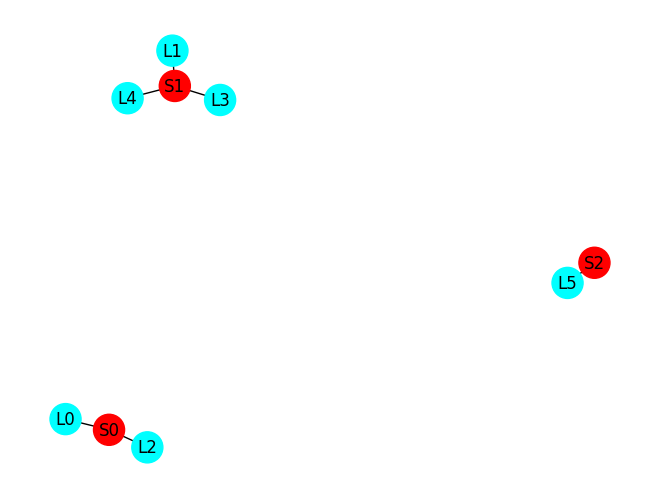

In [39]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(
    neuron_obj
)

In [ ]:
multi_soma_split_parameters = dict()

In [ ]:
_ = neuron_obj.calculate_multi_soma_split_suggestions(
    plot = True,
    store_in_obj = True,
    **multi_soma_split_parameters
)


In [ ]:
#neuron_obj.pipeline_products.multi_soma_split_suggestions.multi_soma_split_parameters = multi_soma_split_parameters

In [ ]:
#print(neuron_obj.pipeline_products.multi_soma_split_suggestions)

# Step 4B: Multi Soma Split Execution

In [ ]:
neuron_list = neuron_obj.multi_soma_split_execution(
    verbose = False,
)

In [ ]:
neuron_list

In [ ]:
n1 = neuron_list[0]
print(n1.pipeline_products)

# Step 5: Cell Typing

In [ ]:
from neurd import neuron_pipeline_utils as npu

In [ ]:
neuron_obj_axon = npu.cell_type_ax_dendr_stage(
    n1,
    mesh_decimated = mesh_decimated,
    plot_axon = False,
)

In [ ]:
nviz.plot_axon(
    neuron_obj_axon
)

In [ ]:
print(neuron_obj_axon.pipeline_products.cell_type_ax_dendr)

# Autoproofreading Stage

In [ ]:
neuron_obj_proof = npu.auto_proof_stage(
    neuron_obj_axon,
    mesh_decimated = mesh_decimated,
    calculate_after_proof_stats = False,
)

In [ ]:
_ = npu.after_auto_proof_stats(
    neuron_obj_proof,
    store_in_obj = True,
)

In [ ]:
G_proof = neuron_obj_proof.neuron_graph_after_proof
G_proof

In [ ]:
G_proof.nodes['S0']

In [ ]:
"""
Use max soma volume on the graph
"""

# Saving off the autoproofread neuron

In [ ]:
vdi.save_neuron_obj_auto_proof(
    neuron_obj_proof,
    compressed=True,
)

In [ ]:
n_obj_proofread_recovered = vdi.load_neuron_obj_auto_proof(segment_id)

# Plotting the final neuron

In [ ]:
from neurd import synapse_utils as syu

In [ ]:
neuron_obj_axon.mesh

In [ ]:
neuron_obj_proof.mesh

In [ ]:
from mesh_tools import skeleton_utils as sk

In [ ]:
neuron_obj_proof.axon_length

In [ ]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    neuron_obj_axon.mesh,
    meshes = [neuron_obj_proof.mesh],
    meshes_colors="red"
)

In [ ]:
syu.plot_synapses(neuron_obj_proof)

In [ ]:
syu.plot_synapses_error_from_neuron_obj(neuron_obj_proof)    

In [ ]:
syu.plot_synapses_valid_from_neuron_obj(neuron_obj_proof)  

In [ ]:
nviz.plot_compartments(neuron_obj_proof)

In [ ]:
%load_ext autoreload
%autoreload 2